In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import anndata
import umap.umap_ as umap
import leidenalg
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances
from scipy.stats import zscore
from matplotlib.colorbar import ColorbarBase
import matplotlib.colors as mcolors

%matplotlib inline

In [2]:
plt.style.use('dark_background')

### Load Xenium data

In [3]:
xenium_scdata = sc.read_h5ad(r"D:\SMI-0214_DonCleveland_UCSD\SMI-0214_DonCleveland_UCSD\MERGED_BEST_0004_XENIUM.h5ad")
xenium_scdata

AnnData object with n_obs × n_vars = 460757 × 248
    obs: 'AUCell scores - AUCell score', 'Cell type', 'Condition', 'Louvain clustering (resolution=1.0)', 'Louvain sub-clustering (resolution=1.0)', 'New condition', 'Number of genes', 'Number of mRNA transcripts', 'Predicted from gene sets', 'Sample ID', 'Transcripts retention rate', 'leiden', 'cluster_names', 'cluster_names_updated'
    uns: 'cluster_names_colors', 'cluster_names_updated_colors', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_harmony_(batches)', 'X_pca', 'X_pca_(no_batch_corrected)', 'X_tsne_(perplexity=15)_-_pca_(no_batch_corrected)', 'X_umap', 'X_umap_(n_neighbors=30)', 'X_umap_(n_neighbors=30)_-_harmony_(batches)'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

### Generate leiden umap

C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:371: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:381: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(
C:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


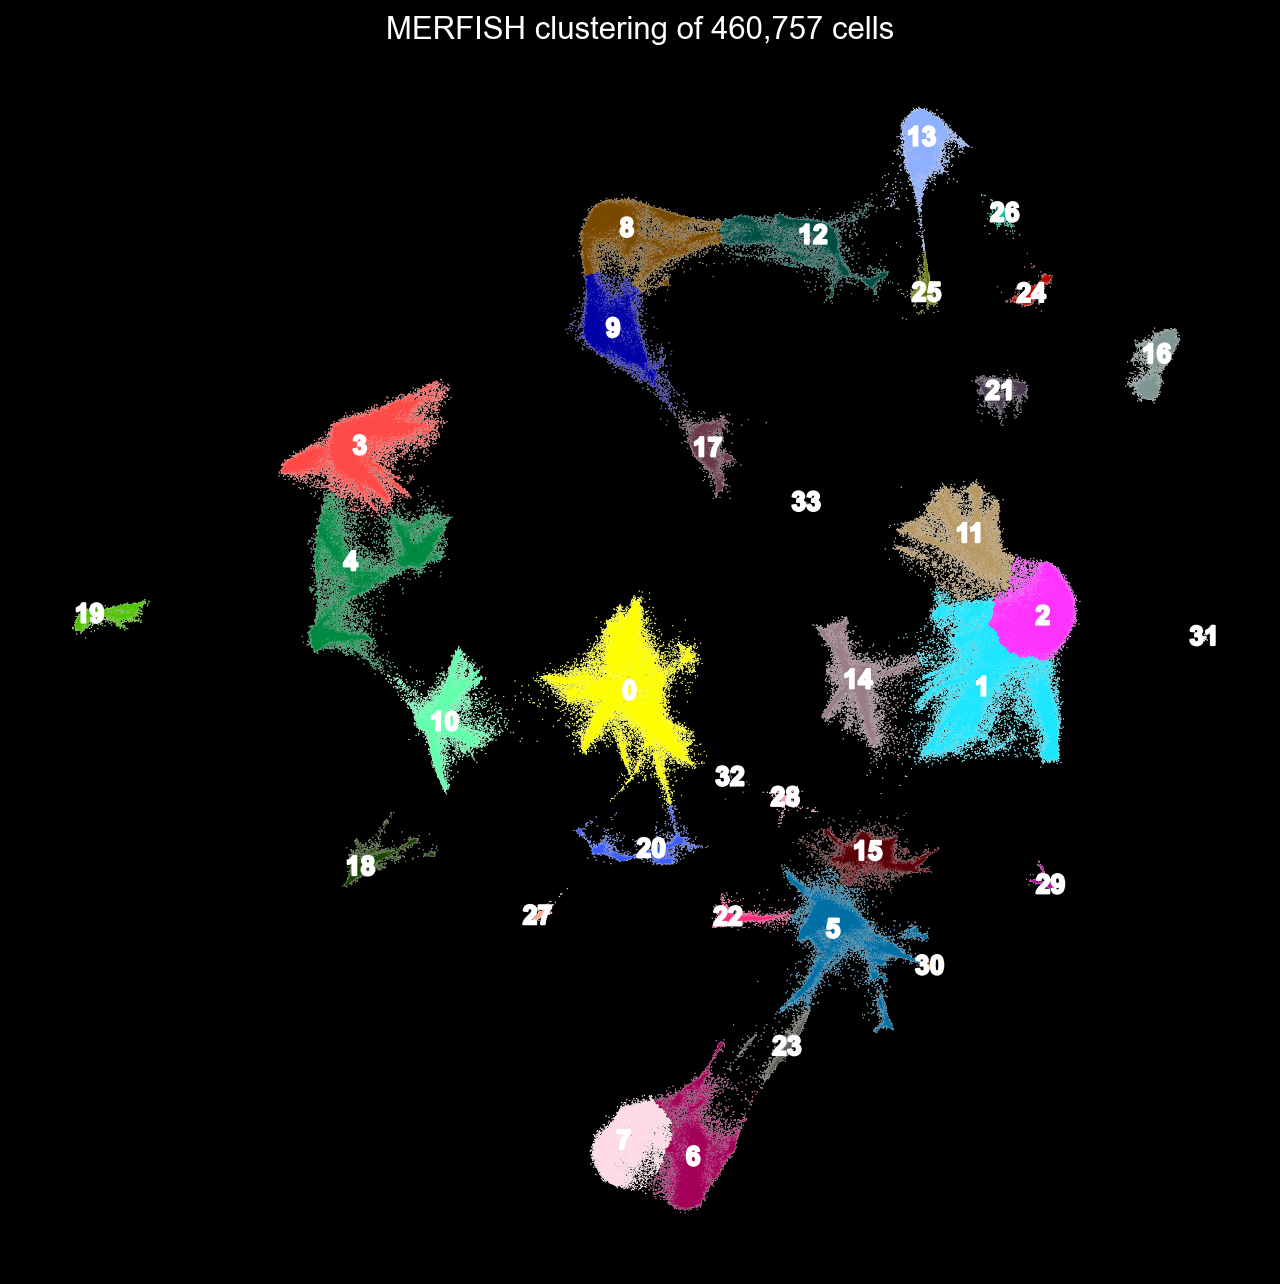

In [4]:
sc.set_figure_params(figsize=(10,10))
fig = sc.pl.umap(
    xenium_scdata,
    color="leiden",
    color_map = 'coolwarm',
    add_outline=True,
    legend_loc="on data",
    size=1,
    legend_fontsize=12,
    legend_fontoutline=1,
    frameon=False,
    title=f"MERFISH clustering of {len(xenium_scdata):,d} cells",
    vmax = 1
)

### Generate raw counts

In [5]:
raw_counts = xenium_scdata.X
raw_counts

<460757x248 sparse matrix of type '<class 'numpy.float32'>'
	with 32685958 stored elements in Compressed Sparse Column format>

In [6]:
raw_counts_dense = raw_counts.toarray()
#raw_counts_dense

In [7]:
xenium_raw_count_df_column_name = list(xenium_scdata.var.index)

In [8]:
leiden_clusters = xenium_scdata.obs['leiden']
leiden_clusters_list = list(leiden_clusters.index)

In [9]:
xenium_raw_count_df = pd.DataFrame(raw_counts_dense)
xenium_raw_count_df.columns = xenium_raw_count_df_column_name
xenium_raw_count_df = xenium_raw_count_df.T
xenium_raw_count_df.columns = leiden_clusters_list
xenium_raw_count_df = xenium_raw_count_df.T
xenium_raw_count_df = xenium_raw_count_df.assign(leiden_cluster = leiden_clusters)
xenium_raw_count_df = xenium_raw_count_df.groupby('leiden_cluster').sum()
xenium_raw_count_df.to_csv('xenium_raw_count_leiden.csv',index=True, mode='w')
xenium_raw_count_df

2010300C02RIK         ACSBG1         ACTA2         ACVRL1  \
leiden_cluster                                                              
0                85941.625000  281000.937500  19577.609375   14637.397461   
1                73578.679688  122393.945312  26792.527344   23944.746094   
2                16678.783203   56267.843750  15603.145508    5941.038086   
3                75940.593750  105033.554688  14531.447266  169222.937500   
4                31935.164062   66814.164062  69236.359375   78657.671875   
5                67740.296875   59237.445312  21726.453125    5341.314941   
6               136534.656250   46722.859375  29153.439453   27459.982422   
7               127824.687500   42047.242188  29213.210938   37838.183594   
8               105083.875000   50236.351562  13816.017578    4720.104492   
9               103539.945312   36227.207031  15748.383789    2968.946289   
10               38486.609375   50268.554688   7313.443848   16551.845703   
11               55577.644531   38829.617188  10974.829102    5023.786621   
12               81301.046875   29352.275391  15440.008789    2966.708252   
13               76656.820312   25662.066406  13727.567383    2678.592529   
14               33813.664062   39511.078125   8639.410156    5383.221191   
15               32316.296875   26652.904297  10198.382812    2775.513428   
16               19216.470703   15949.126953   6519.926758    1196.145996   
17               43792.910156   11870.229492   4952.888184    1000.309692   
18               29852.205078   15856.637695  27248.384766    3357.695557   
19               18097.324219    1978.367432   5315.083984   11680.459961   
20               10997.530273   16559.173828   5371.542480    3386.271973   
21               13833.775391    9499.623047   3252.003418     759.759888   
22               24323.234375   10111.175781   5963.645996    1354.492188   
23               19461.035156    6747.831543   2501.376221     562.347290   
24               17529.773438    6830.006348   4077.876465     905.248291   
25               10658.880859    3552.290527   2791.041260     320.438934   
26                6509.494629    4322.701172   1309.170532    2756.142334   
27                1549.748291    3939.302002   1022.437683     292.934906   
28                1575.797974    3006.041748   1168.885864     297.111481   
29                2483.930420    2298.967041    731.316223     199.607468   
30                 589.663940    2117.492188    822.631287     109.764793   
31                2696.900879    1185.881836    353.244568    1688.062134   
32                 336.519012     904.056641     81.397636      63.945740   
33                 421.190582     196.564804     39.264217       9.447239   

                     ADAMTS2       ADAMTSL1         ADGRL4       ALDH1A2  \
leiden_cluster                                                             
0                9780.715820   10162.621094   24086.291016  11223.767578   
1               58903.753906  140778.093750   32404.552734   6711.458984   
2               56821.402344  152733.671875   13158.618164   3953.138184   
3                5137.238281    7401.735352  209081.359375   5110.585449   
4               27972.515625   10150.341797   80360.710938  77992.148438   
5               10327.472656   12558.715820    8103.451660   5647.049805   
6                5755.259277    4938.721680   10274.619141   3922.387939   
7               12148.460938    3406.384766   11959.700195   3422.632568   
8                1795.415894    6134.113281    8984.575195   2315.738525   
9                9886.370117    2815.772461    6299.770996   3456.899170   
10               3047.922852    4247.890137   13087.514648   2867.095459   
11              23207.236328   54483.996094    9230.077148   1871.986816   
12              10919.599609    7483.950684    5169.007324   2472.194336   
13               5842.299316   19376.515625    4738.132812   2926.974121   
14               7521.75000

### Plot gene expression bar graph per cluster based on raw counts

In [11]:
xenium_leiden_array = np.array(xenium_scdata.obs['leiden'].unique())
xenium_leiden_array

array(['4', '0', '21', '3', '10', '9', '2', '14', '16', '15', '5', '11',
       '8', '32', '12', '24', '1', '17', '26', '6', '7', '13', '25', '23',
       '18', '30', '22', '28', '33', '19', '31', '29', '20', '27'],
      dtype=object)

In [14]:
color_palette = sns.color_palette("Set2")
color_palette

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [12]:
raw_gene_array = np.empty((0,20))
for cluster in xenium_leiden_array:
    raw_gene_array_by_cluster = []
    for gene in xenium_scdata.uns['rank_genes_groups']['names'][cluster][:20]:
        raw_gene_array_by_cluster = np.append(raw_gene_array_by_cluster, xenium_raw_count_df.at[cluster, gene])
    raw_gene_array = np.vstack((raw_gene_array, raw_gene_array_by_cluster))
raw_gene_array

array([[1.51609344e+05, 1.32079828e+05, 1.11291328e+05, 1.27683484e+05,
        1.02376578e+05, 7.79921484e+04, 8.07060391e+04, 1.05837758e+05,
        7.91985625e+04, 7.39160078e+04, 7.58705391e+04, 7.12345547e+04,
        8.58125859e+04, 7.86576719e+04, 1.01595102e+05, 5.66749297e+04,
        8.03607109e+04, 7.58821016e+04, 5.85128242e+04, 5.95240664e+04],
       [2.97471656e+05, 2.76388188e+05, 2.81000938e+05, 2.65821375e+05,
        2.00698297e+05, 2.57895078e+05, 2.29989766e+05, 2.14648906e+05,
        1.61705984e+05, 1.52062453e+05, 2.20096000e+05, 1.94108938e+05,
        1.76287422e+05, 2.18684859e+05, 1.60656406e+05, 2.28628406e+05,
        1.74034688e+05, 7.07085859e+04, 1.13354812e+05, 1.96599297e+05],
       [2.37772715e+04, 3.41838359e+04, 3.40502734e+04, 3.11646816e+04,
        2.71977207e+04, 1.93415703e+04, 2.59590293e+04, 2.05343652e+04,
        2.37055781e+04, 2.17094434e+04, 1.55504580e+04, 2.46870879e+04,
        1.98215176e+04, 2.20930332e+04, 1.69390723e+04, 1.7220

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


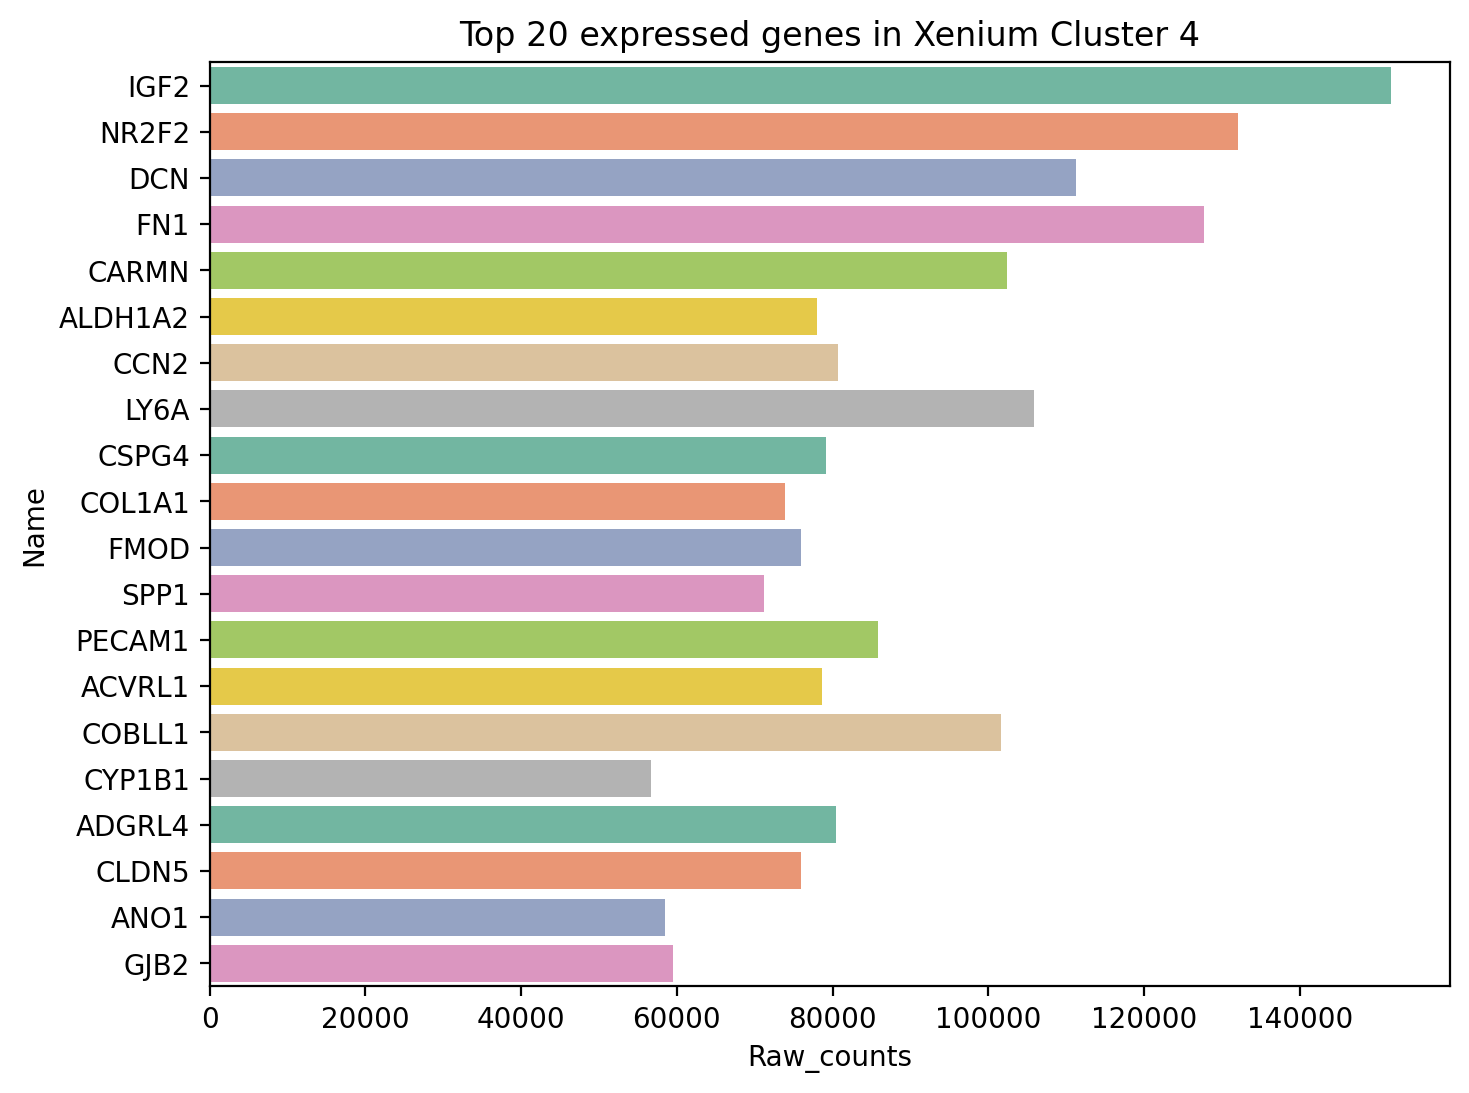

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


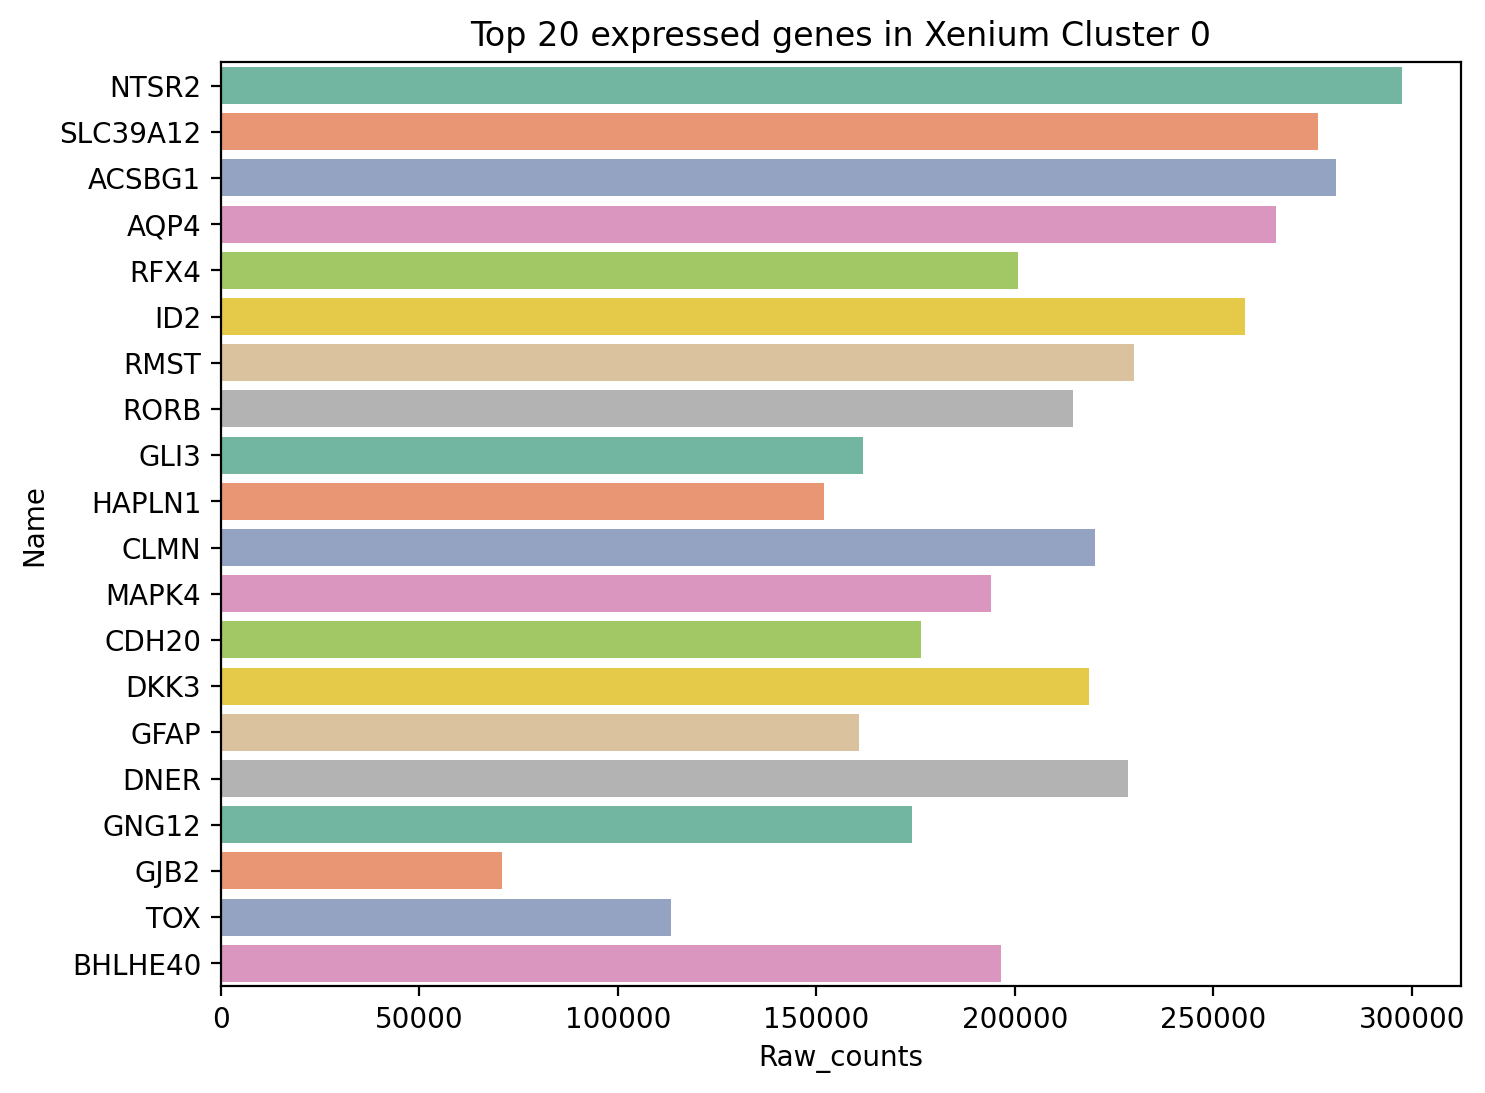

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


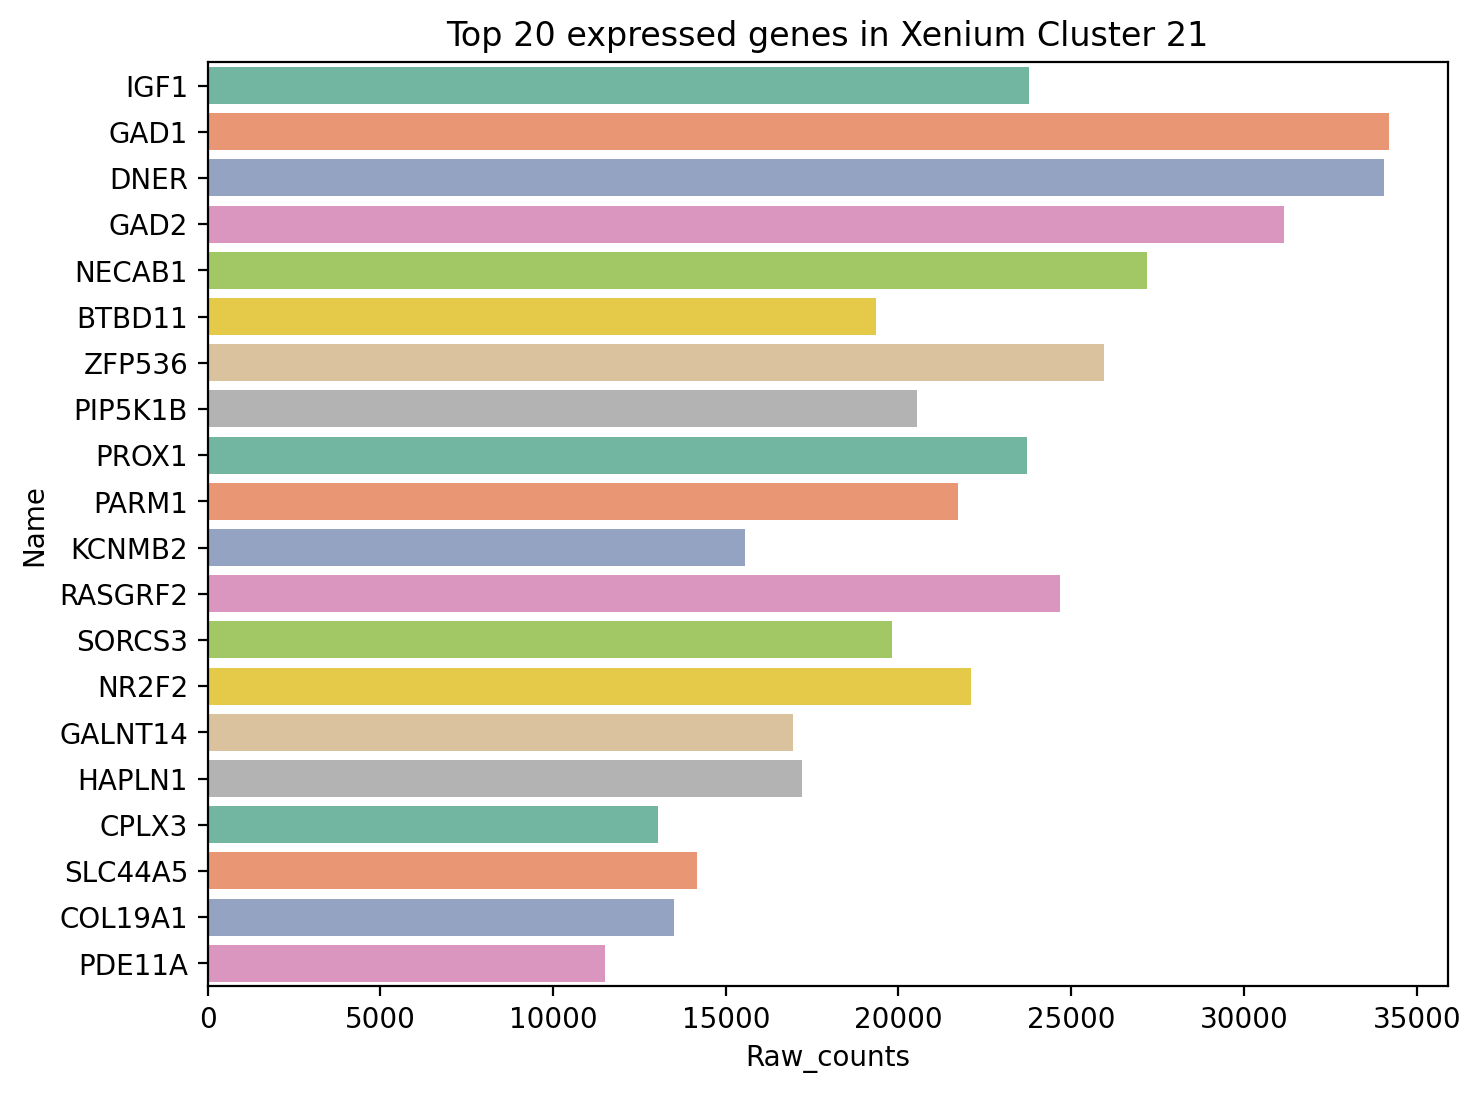

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


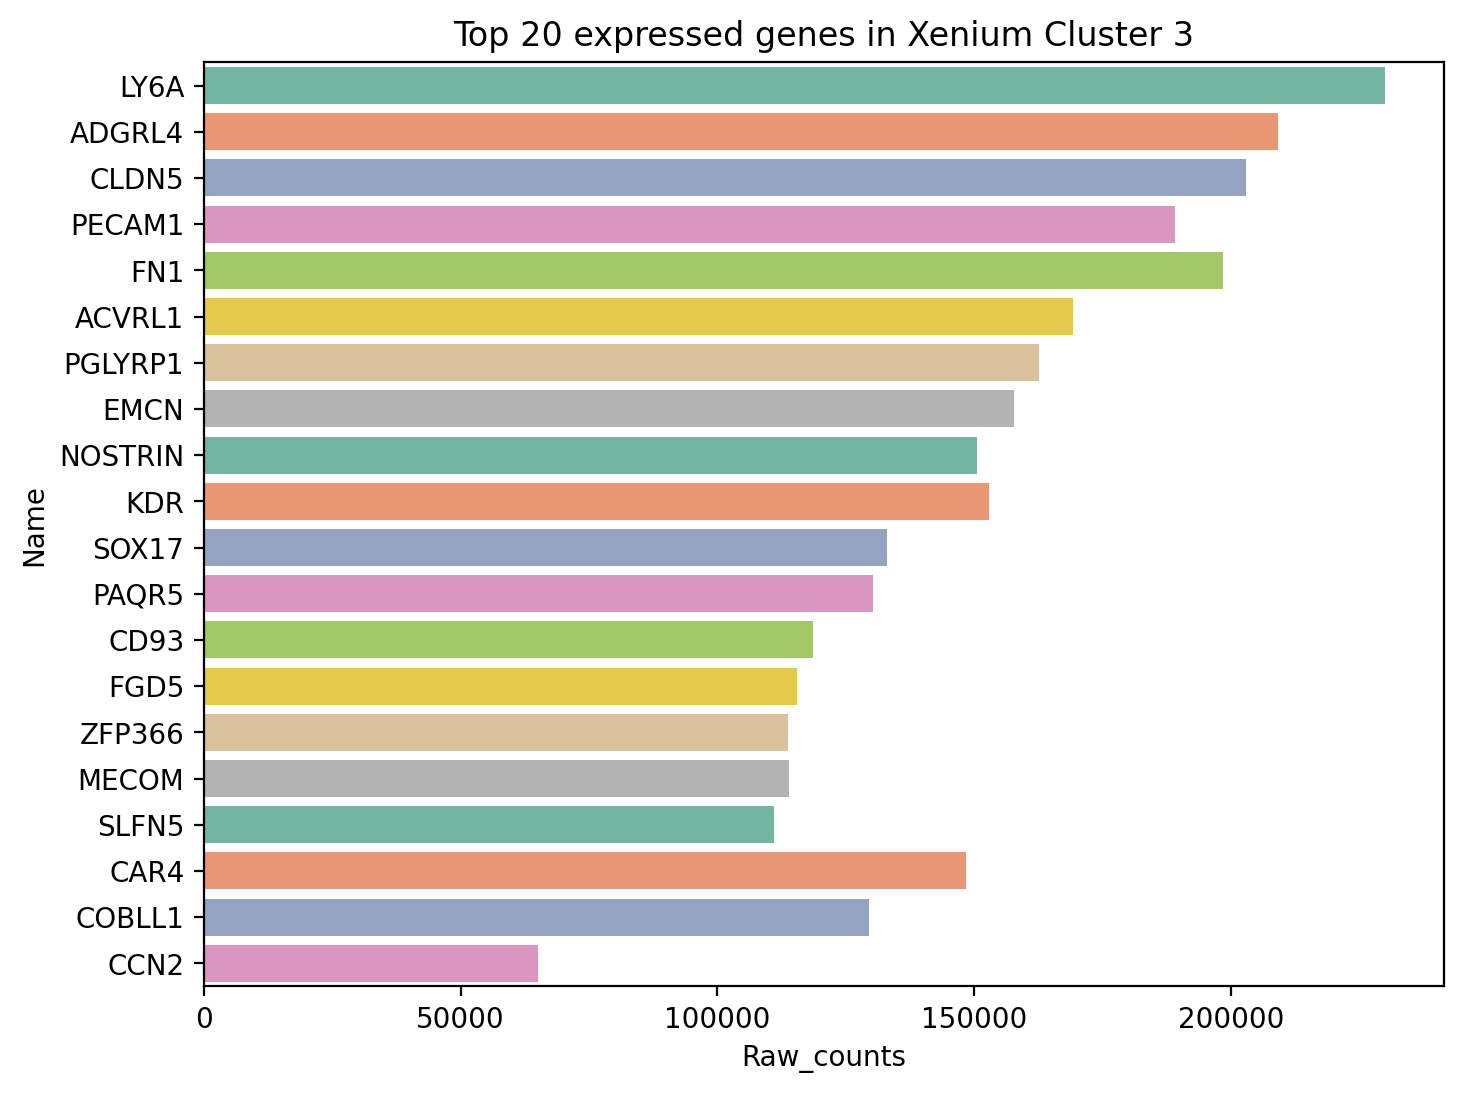

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


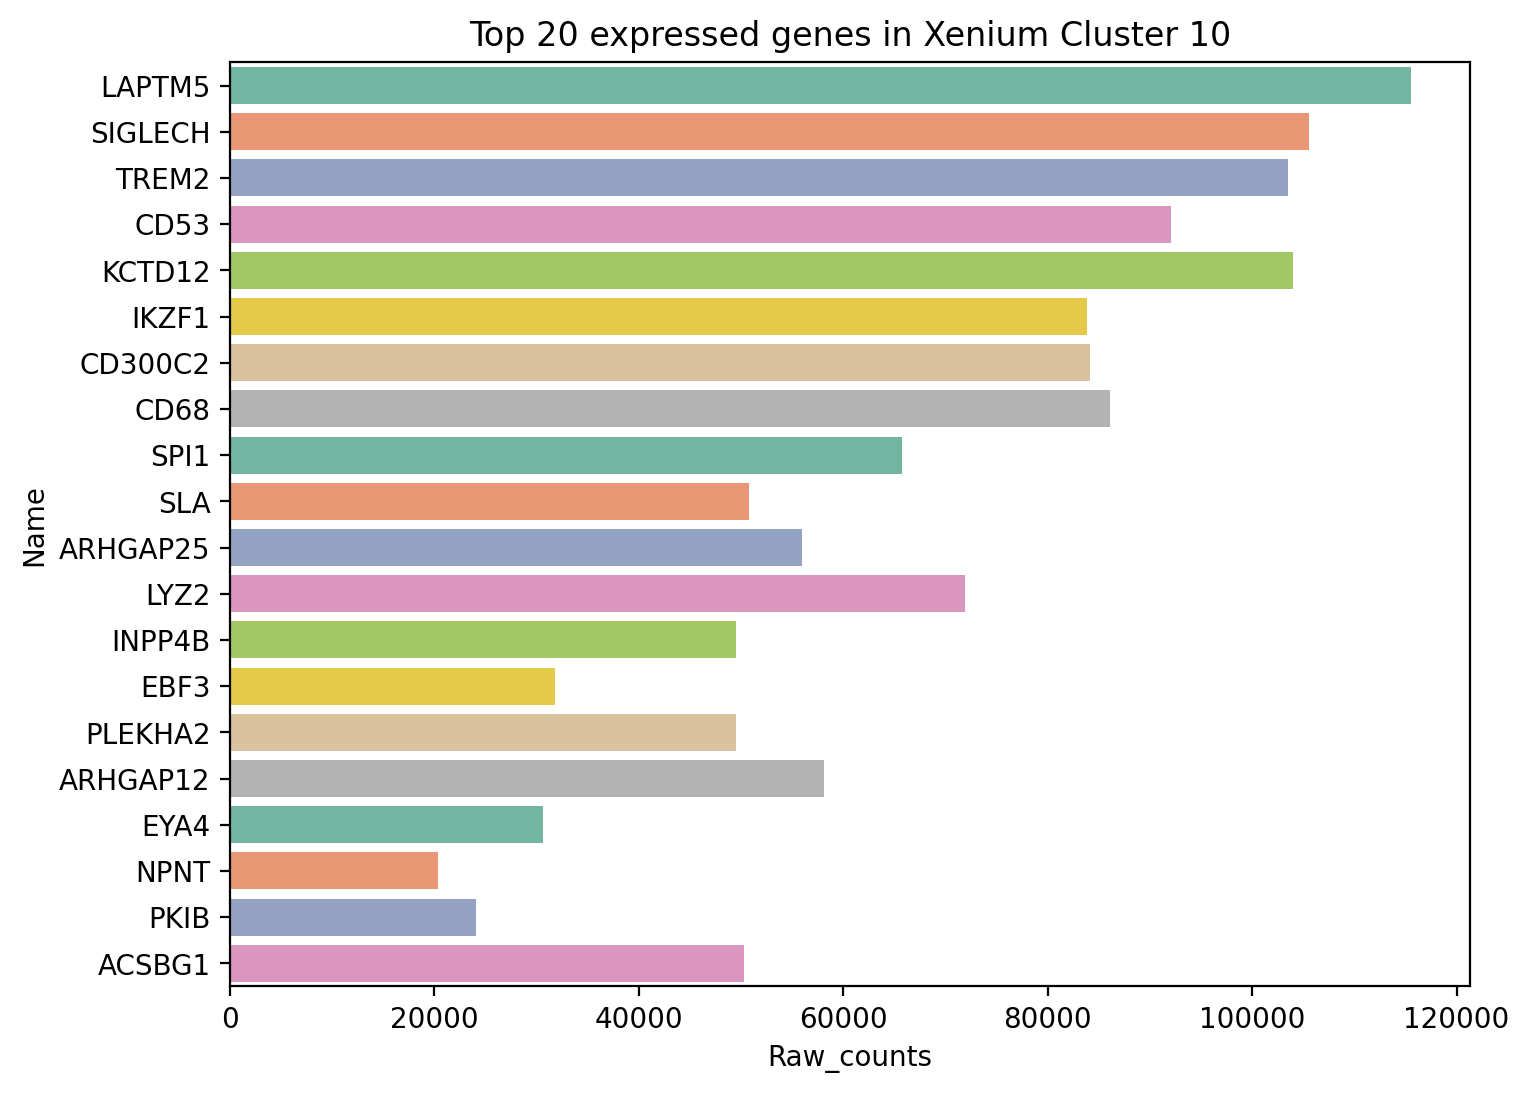

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


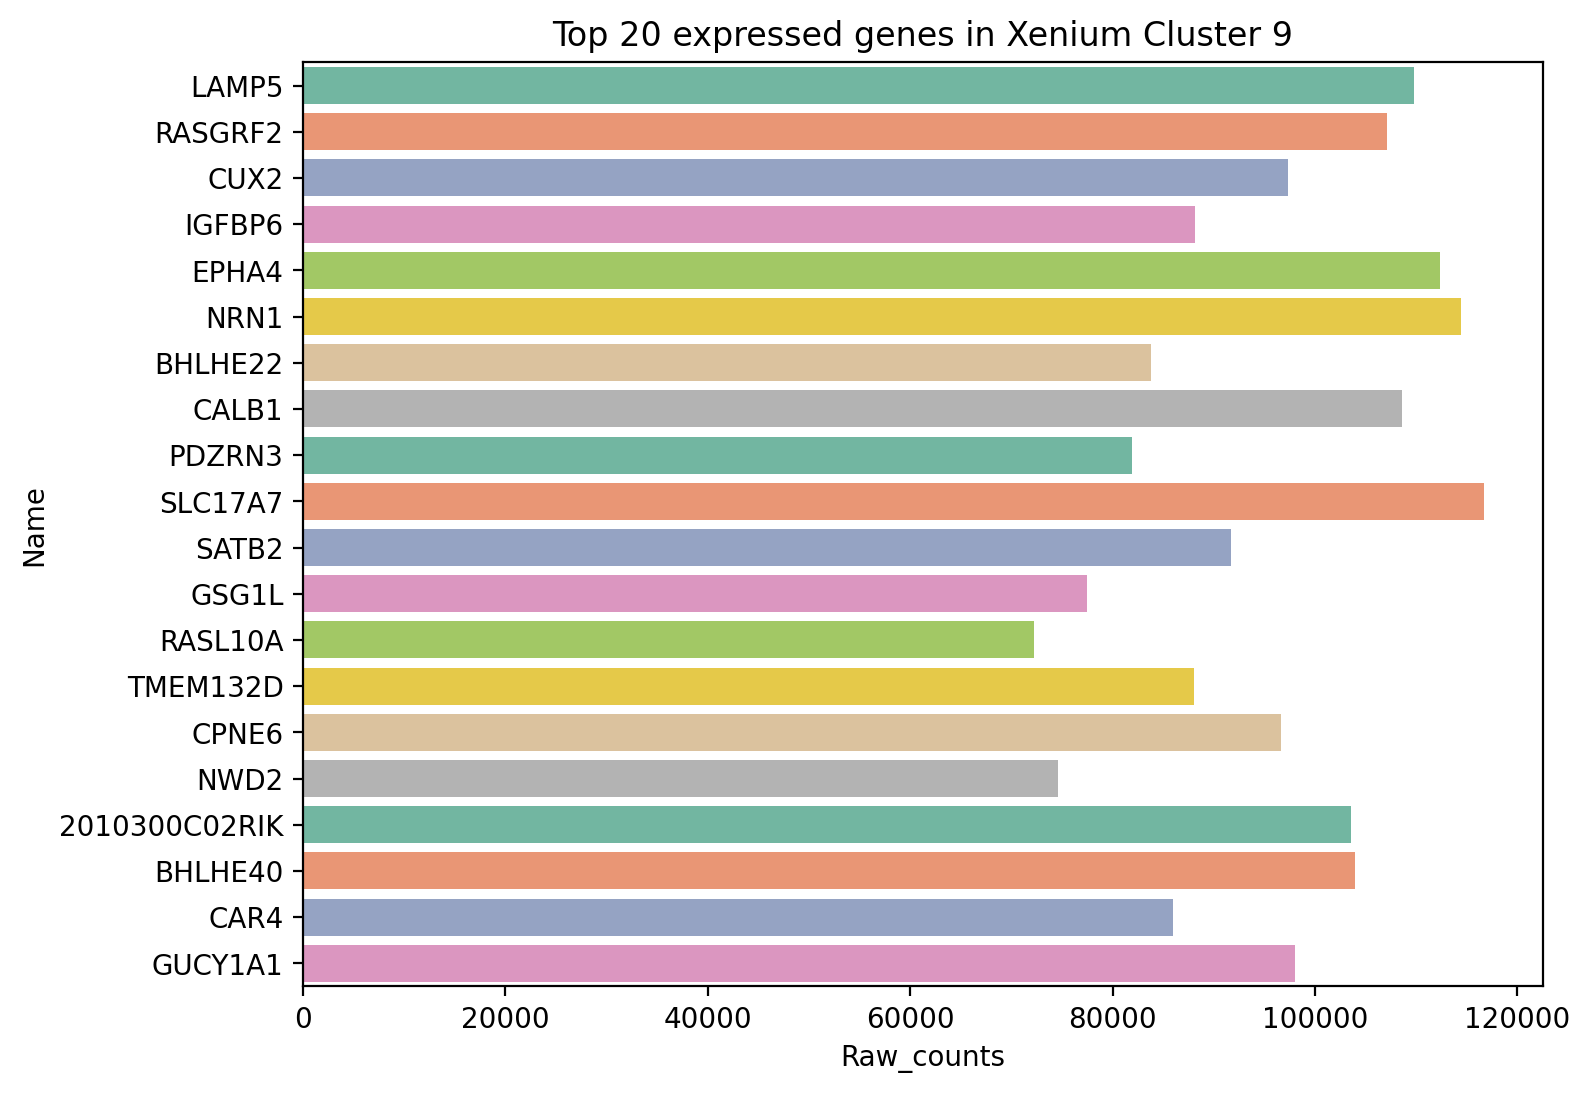

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


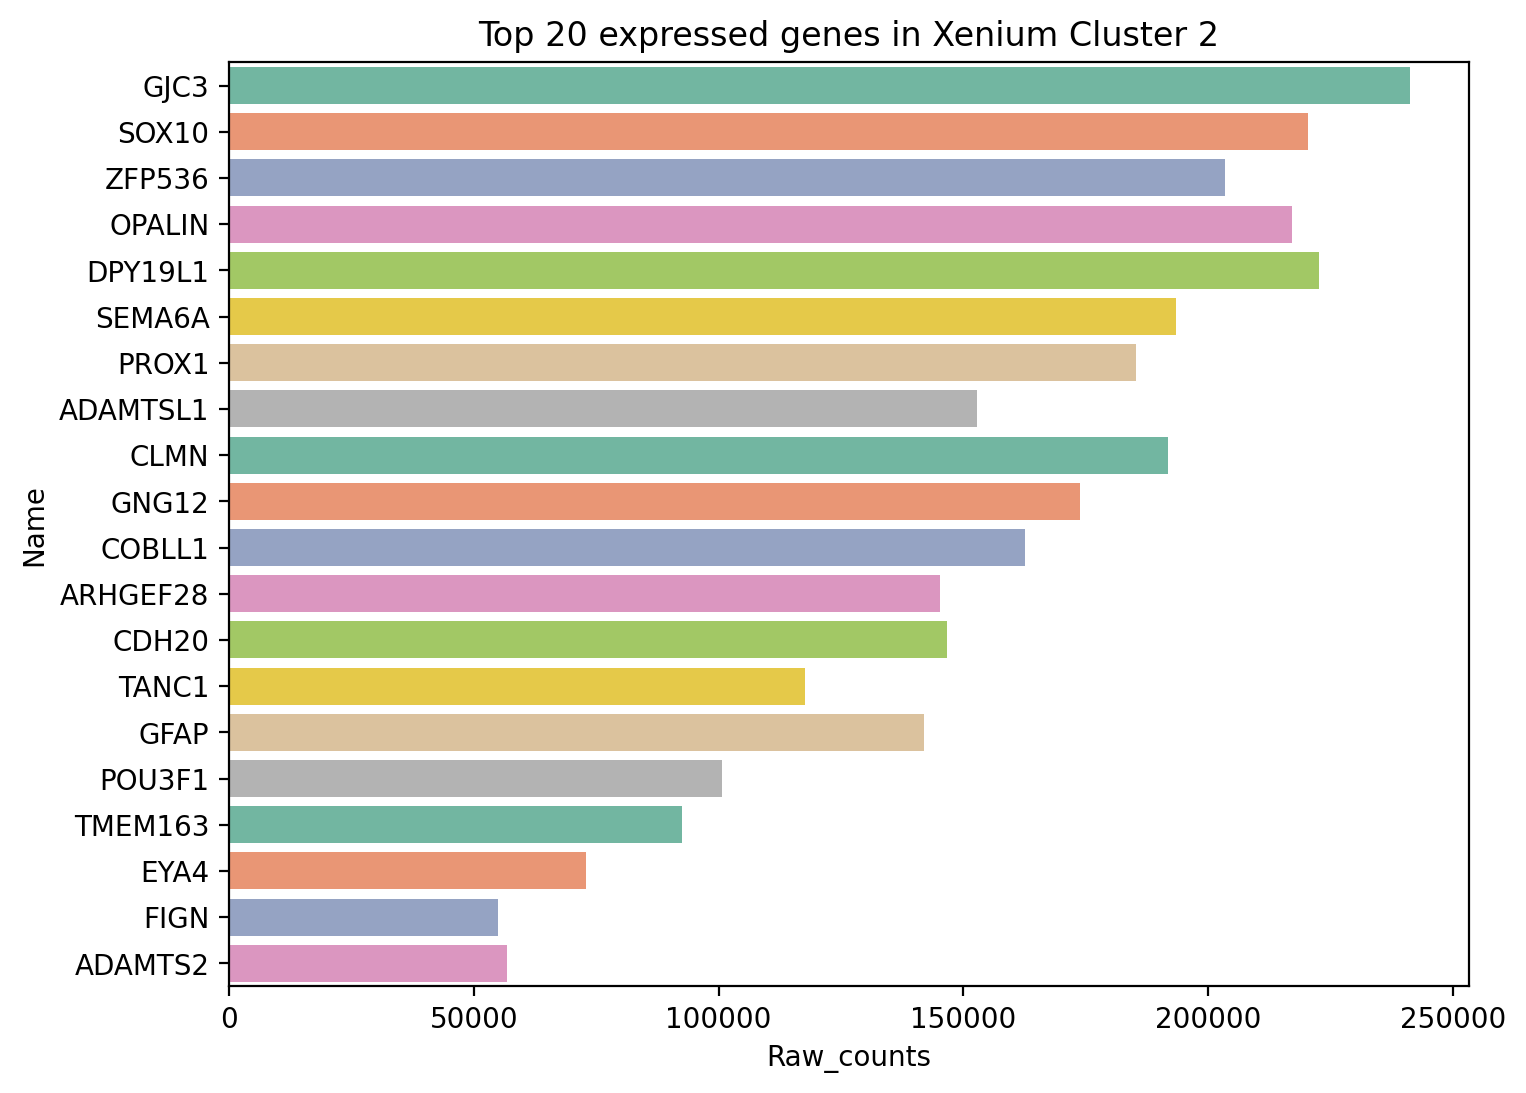

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


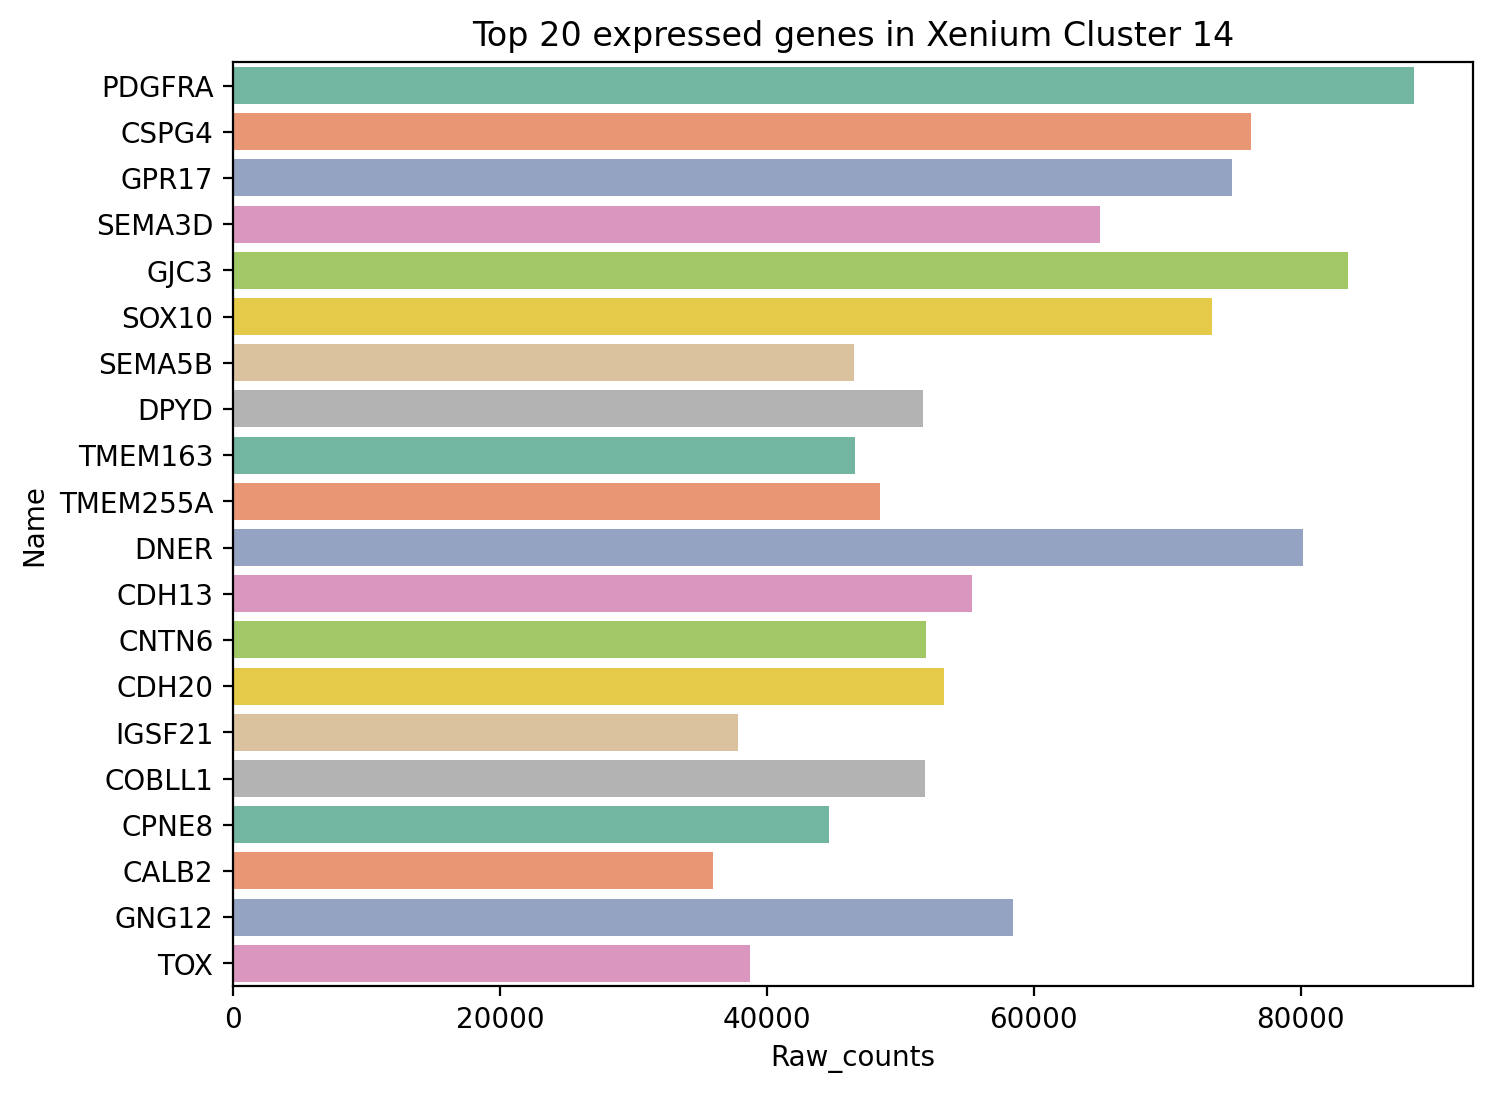

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


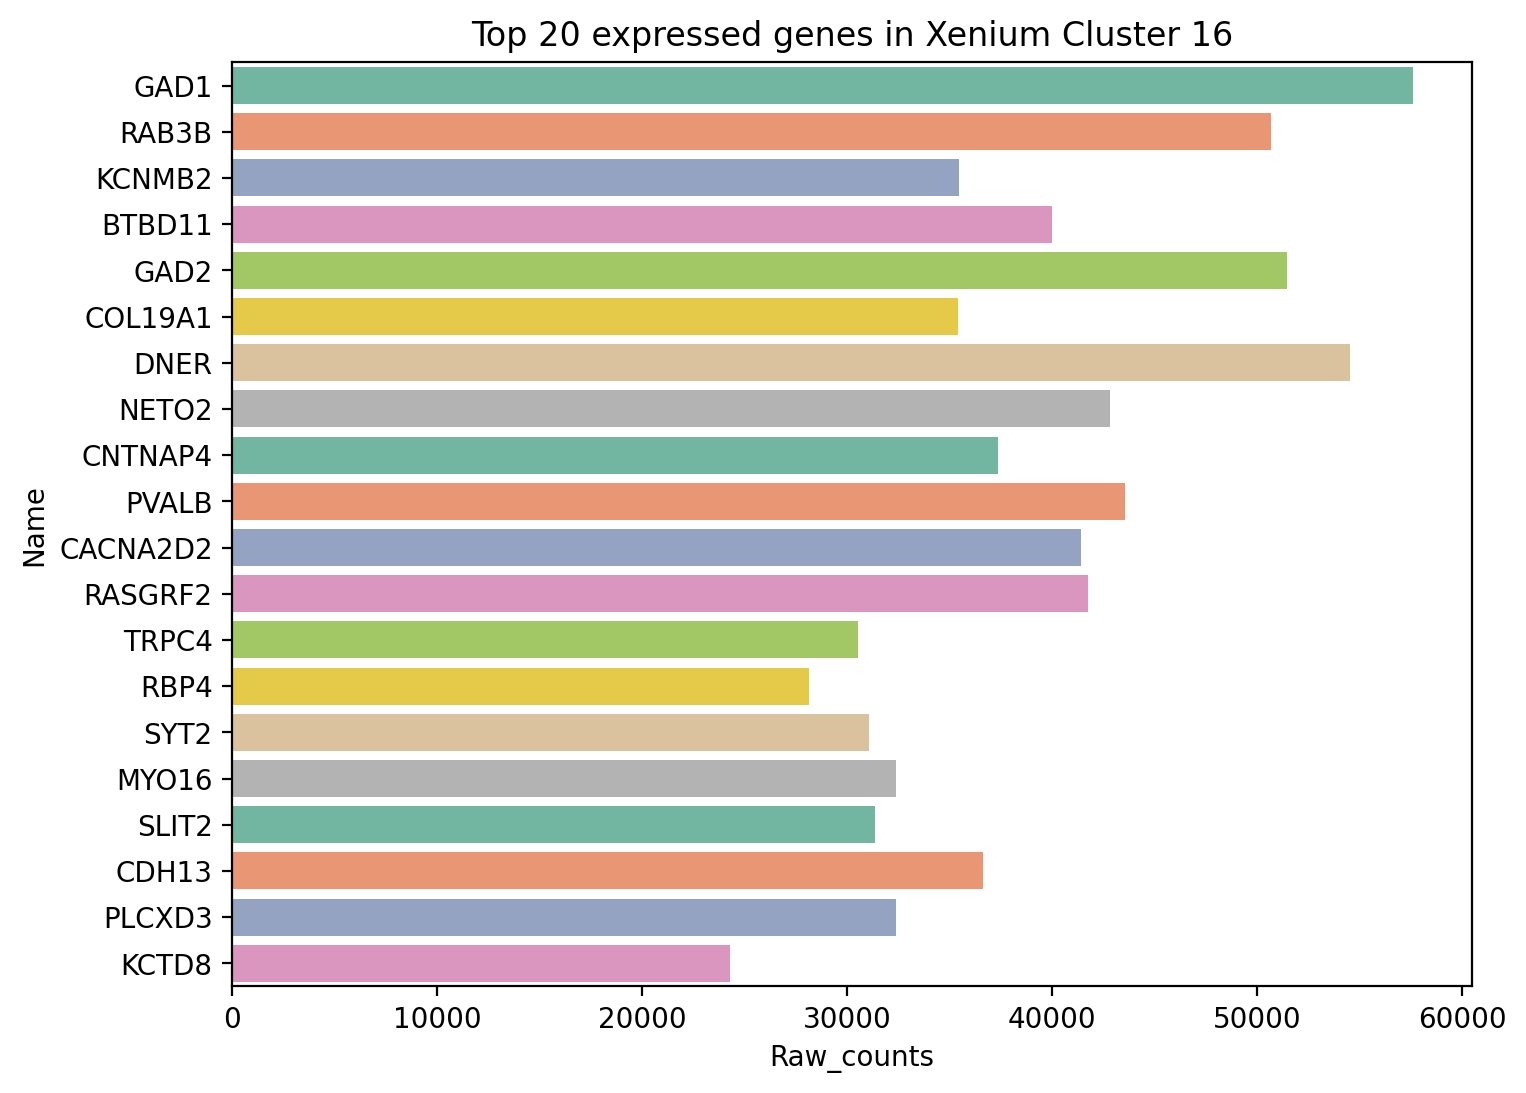

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


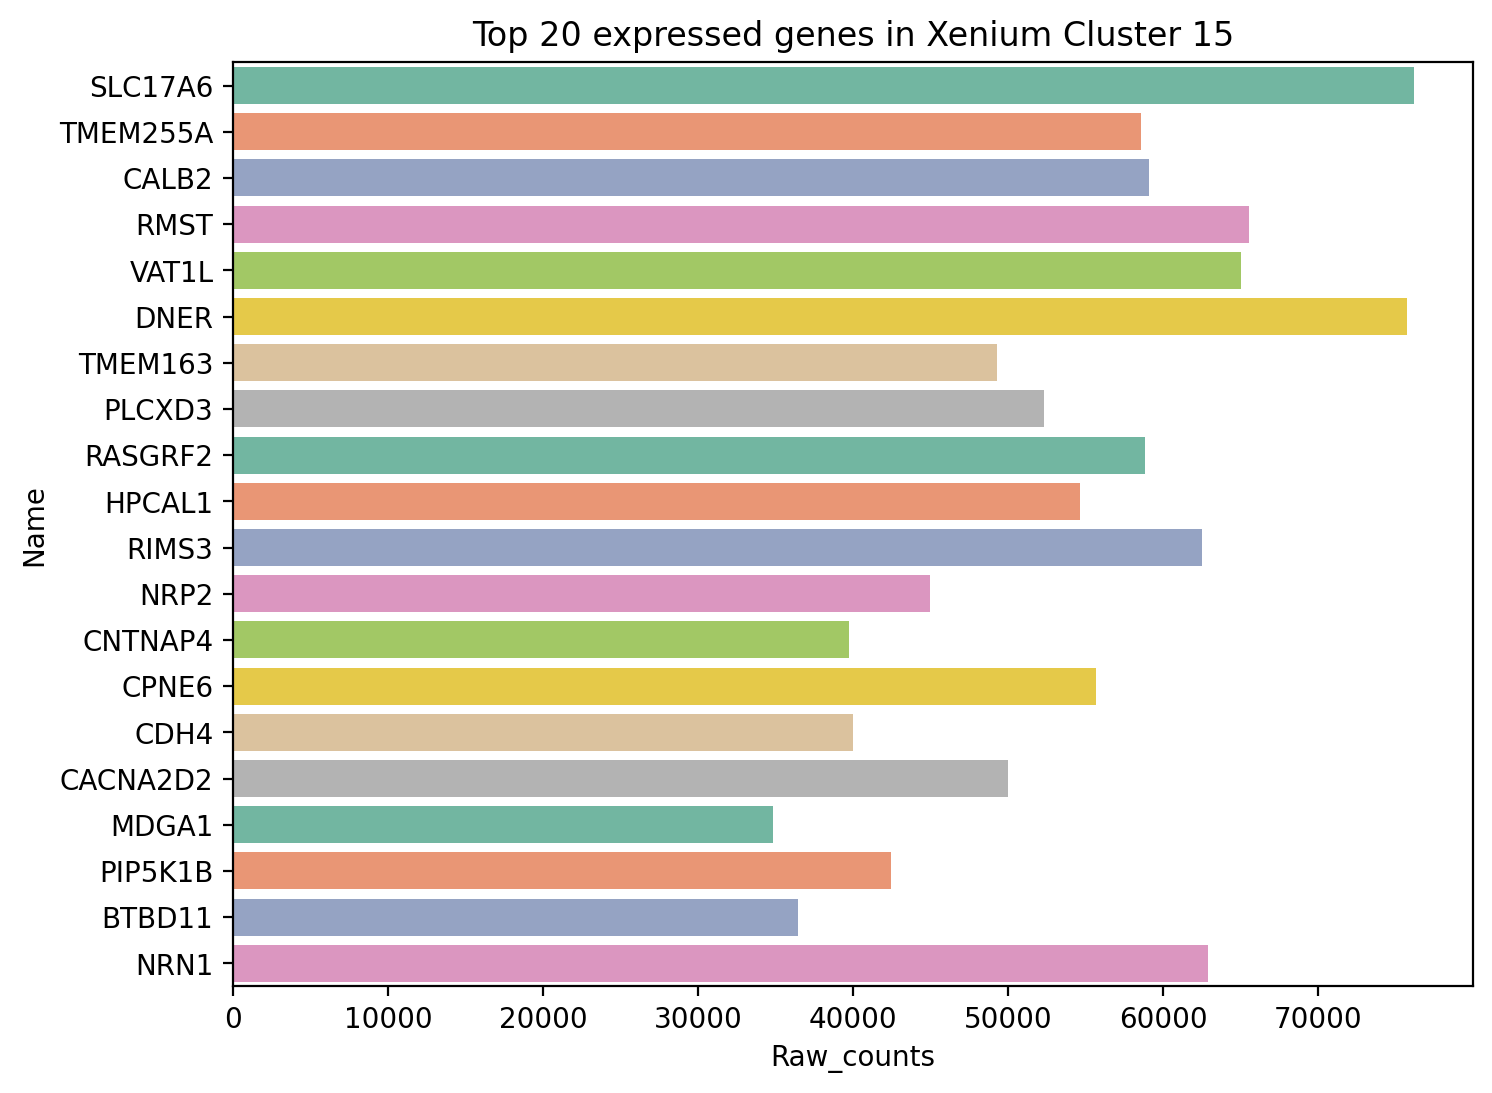

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


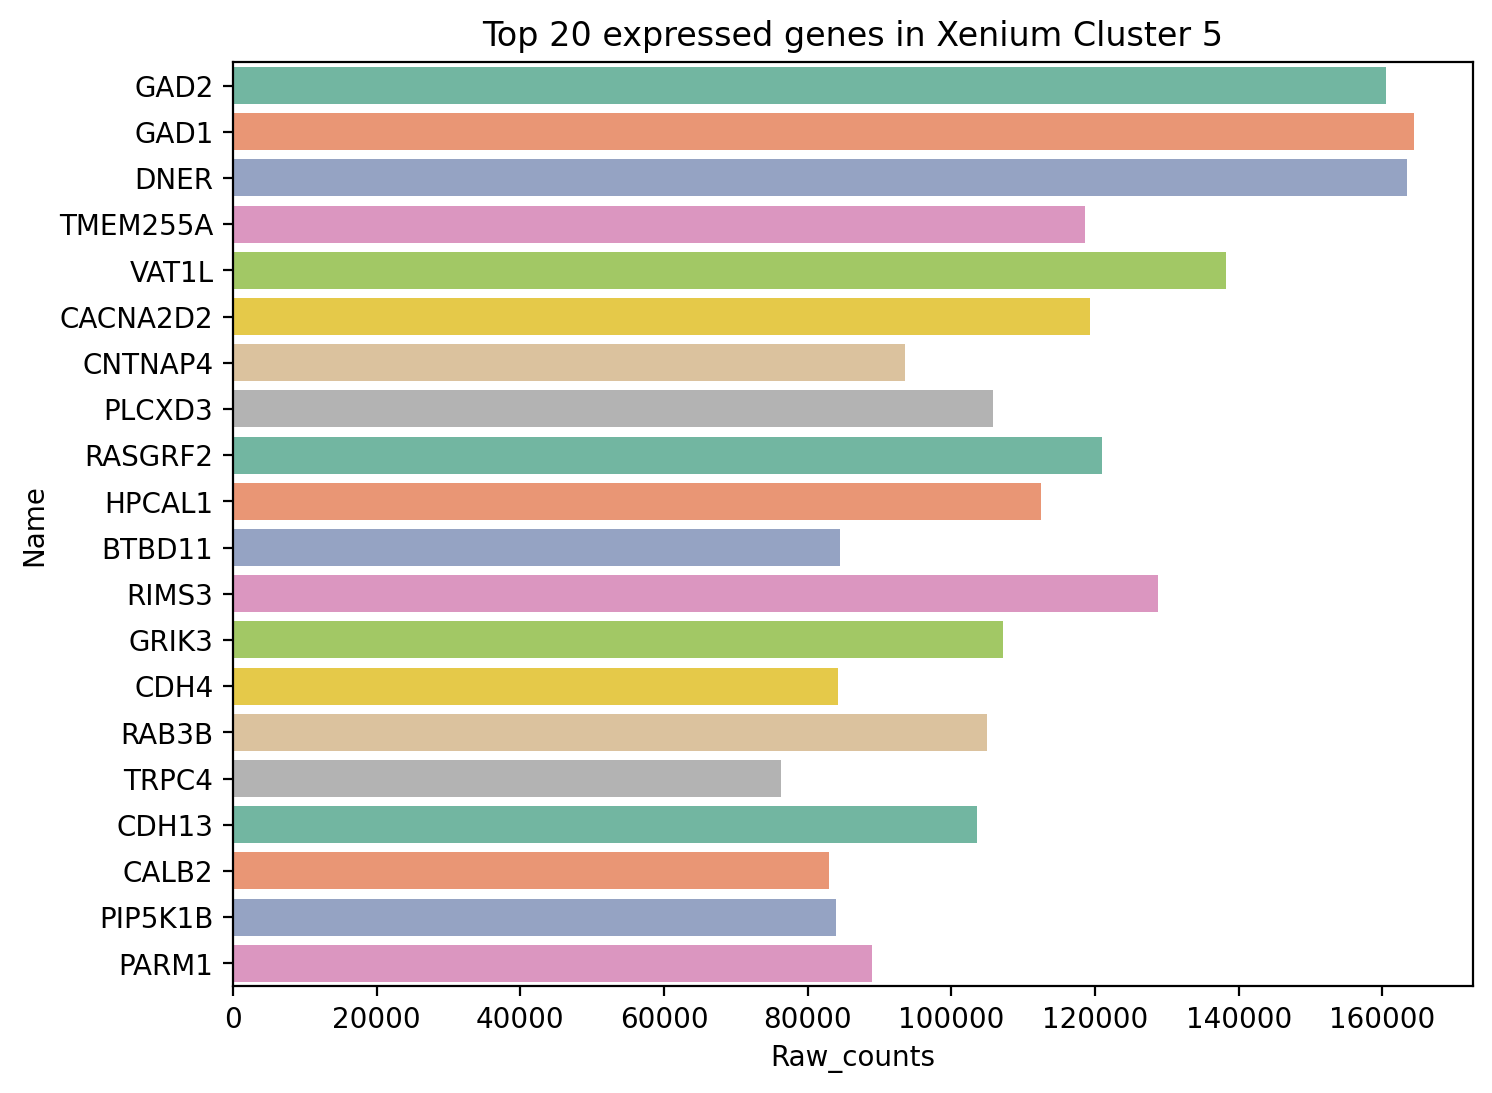

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


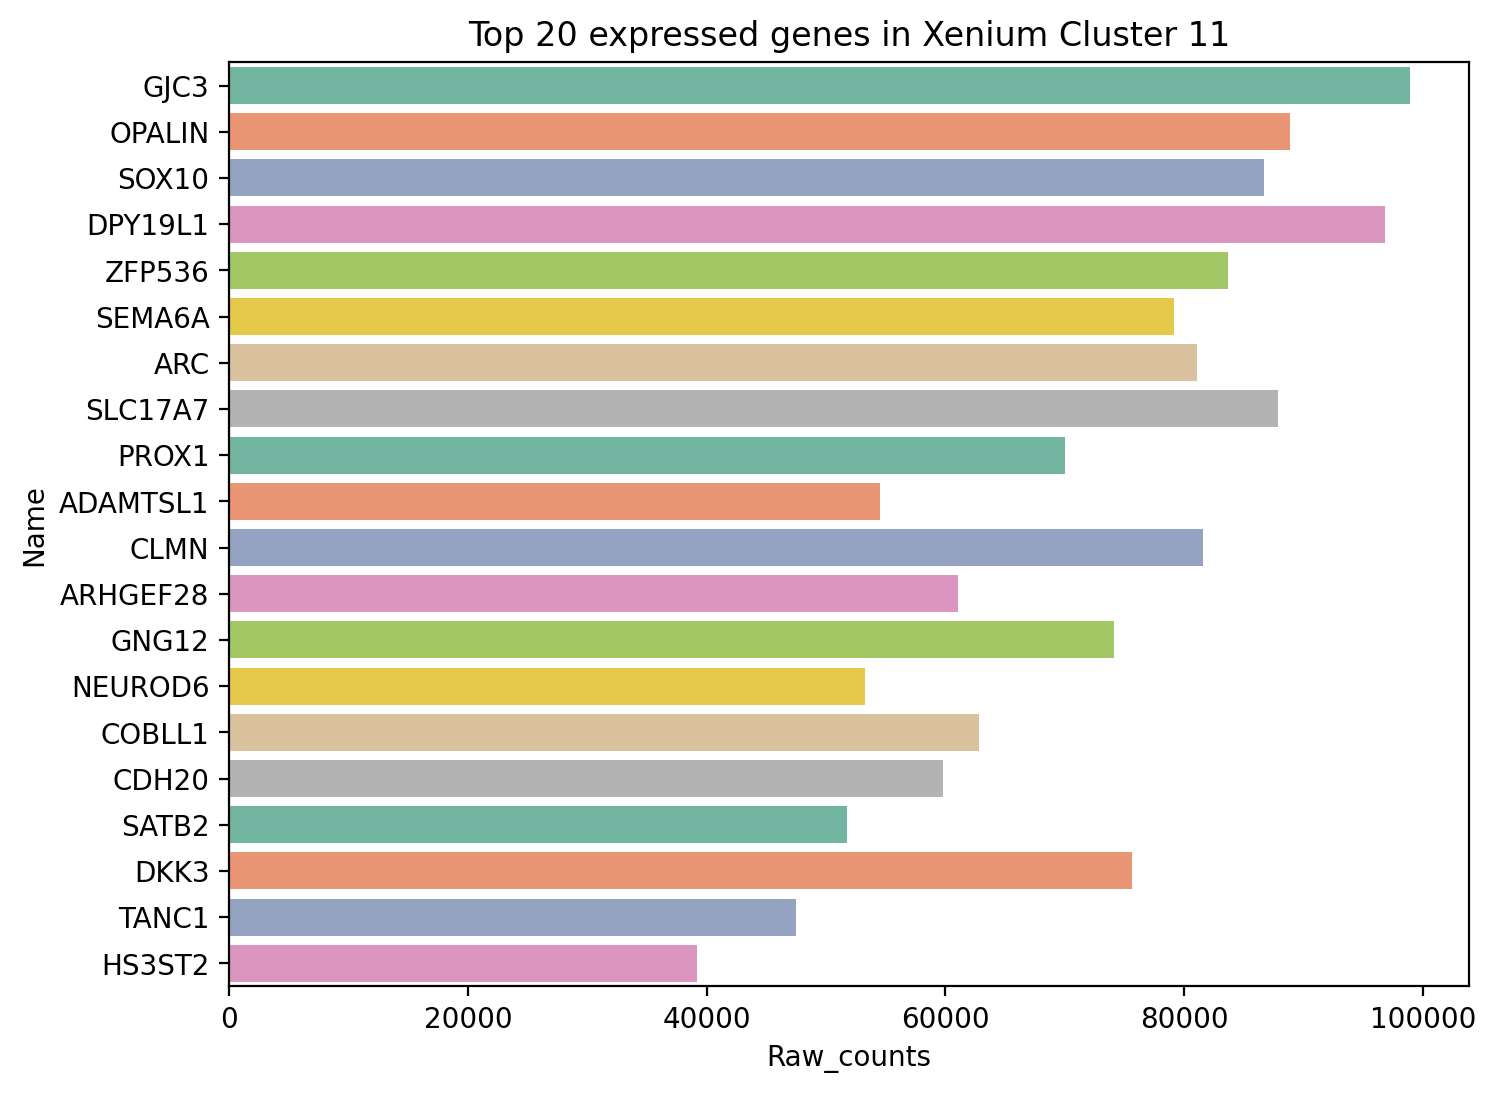

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


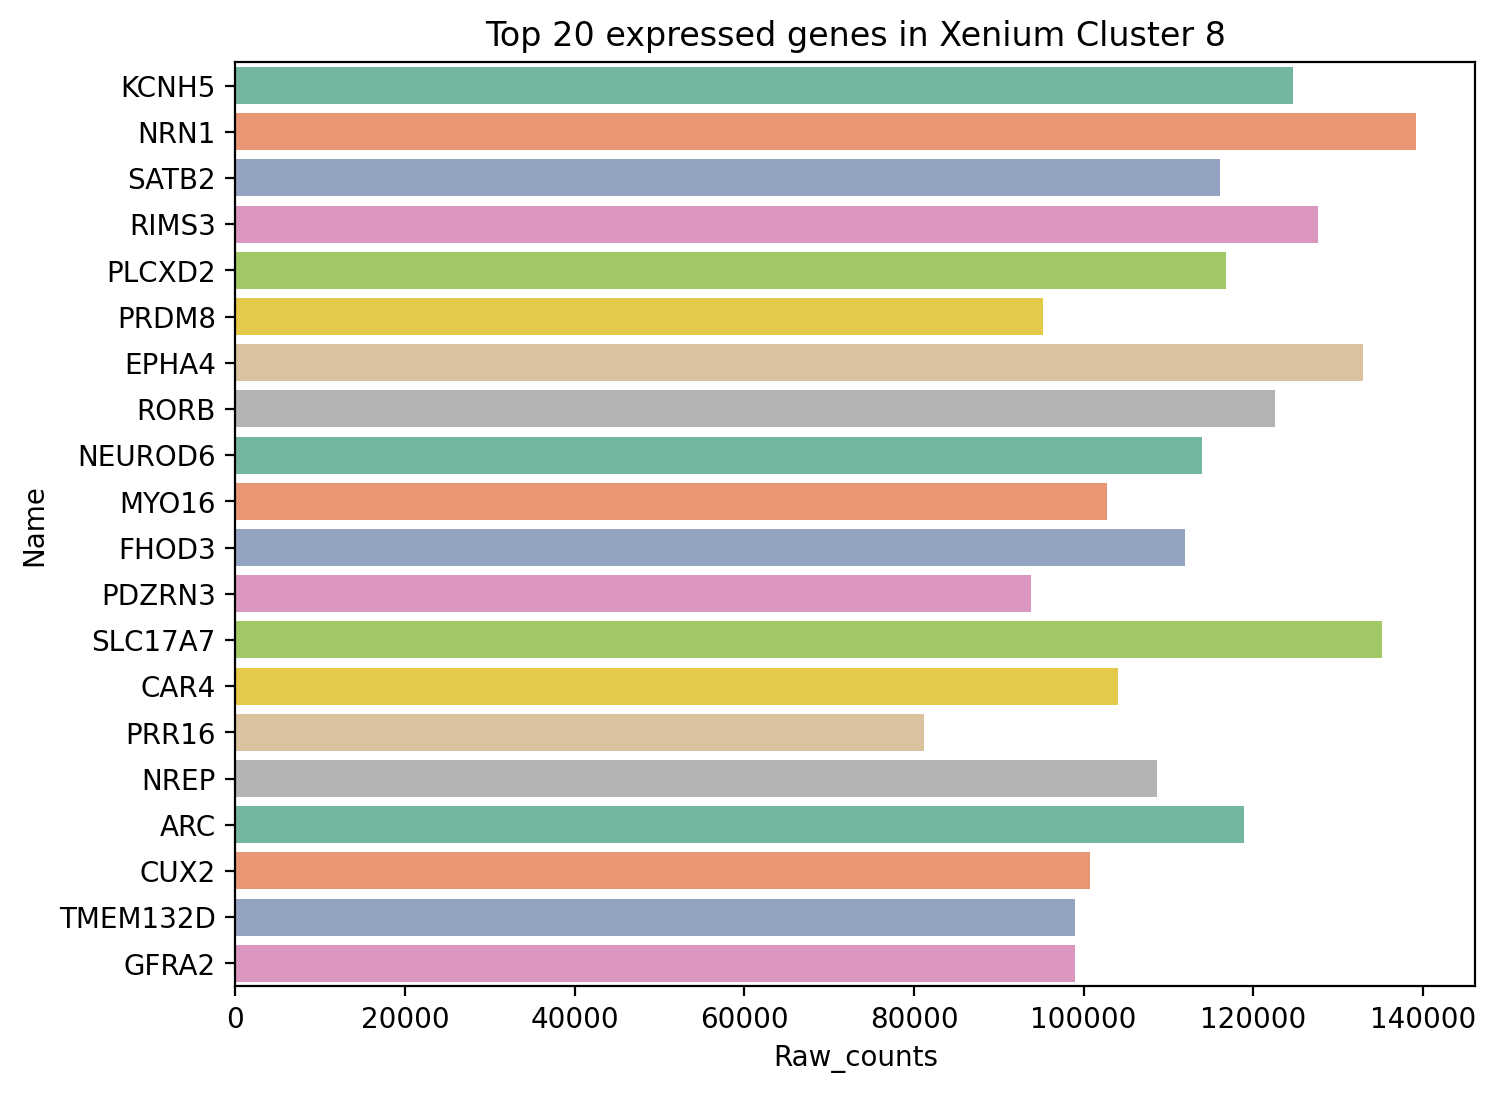

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


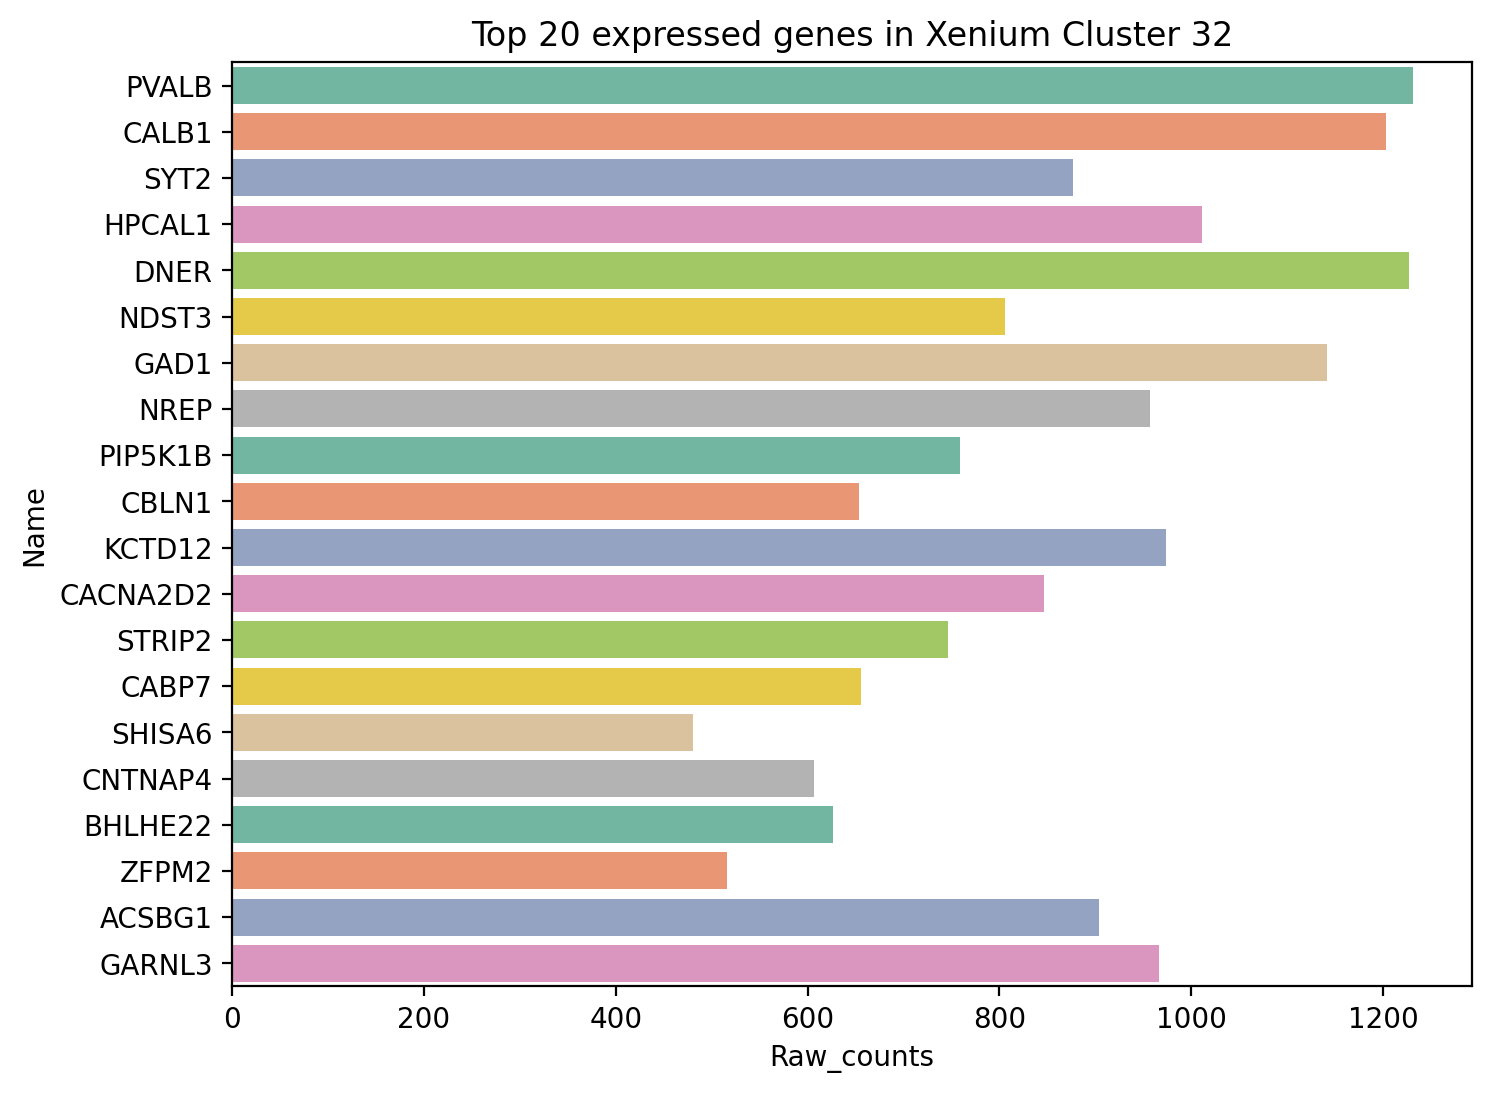

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


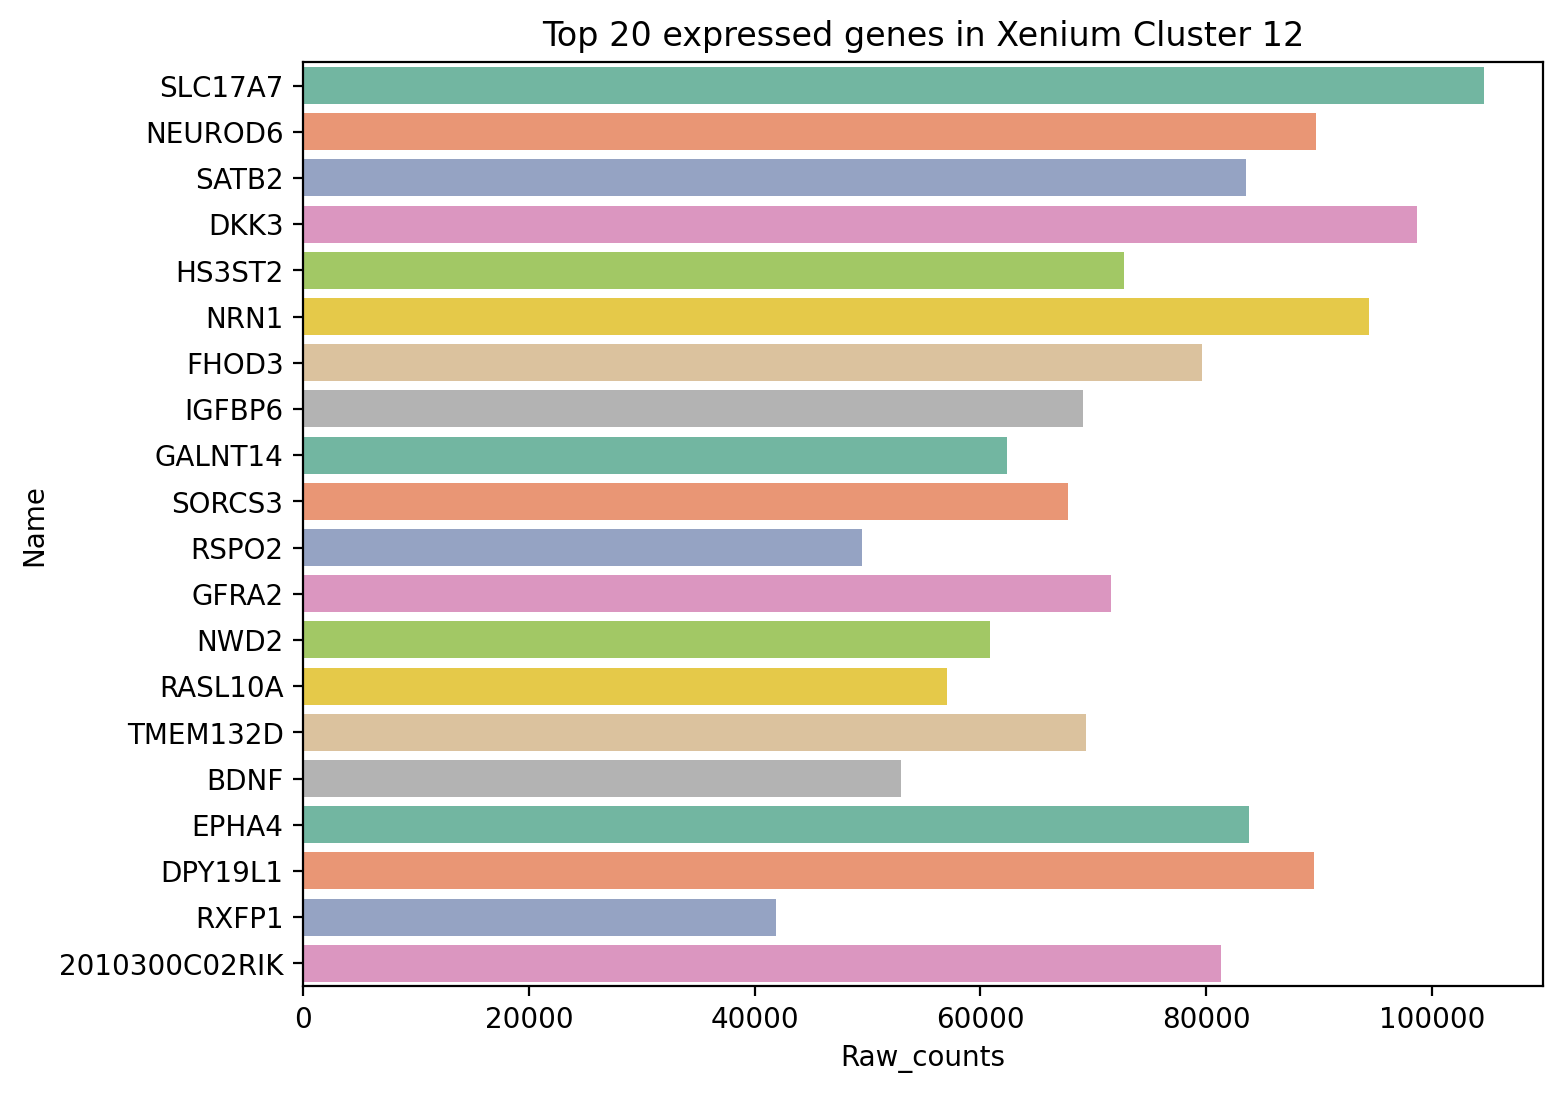

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


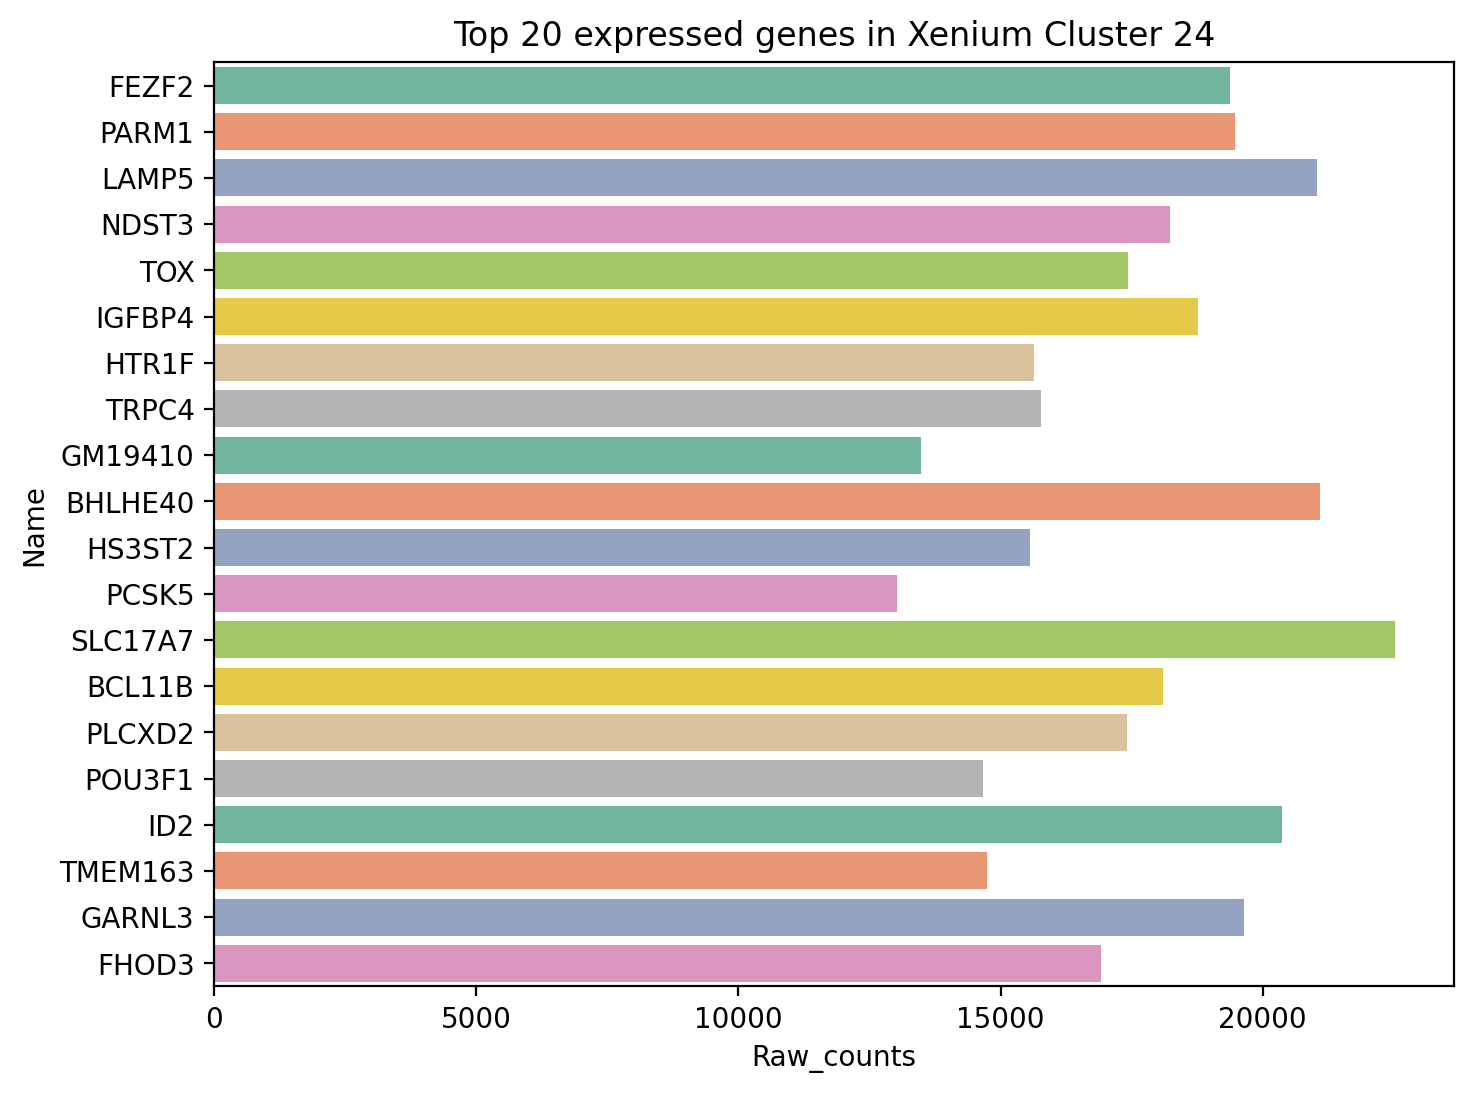

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


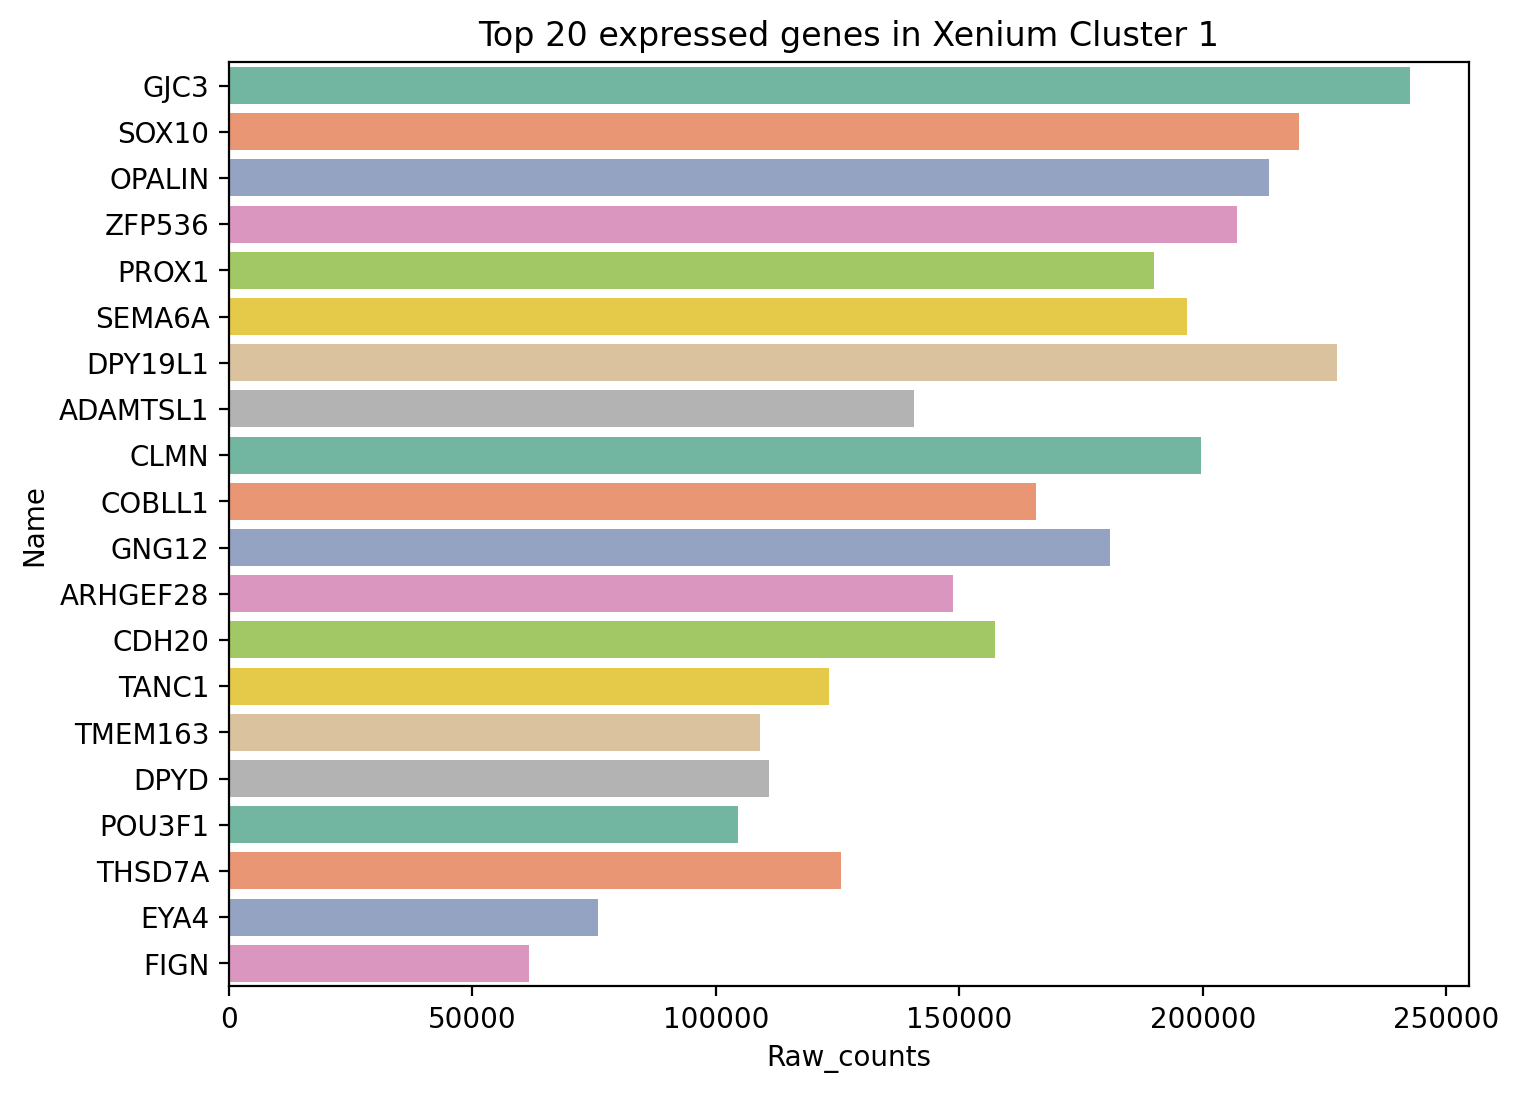

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


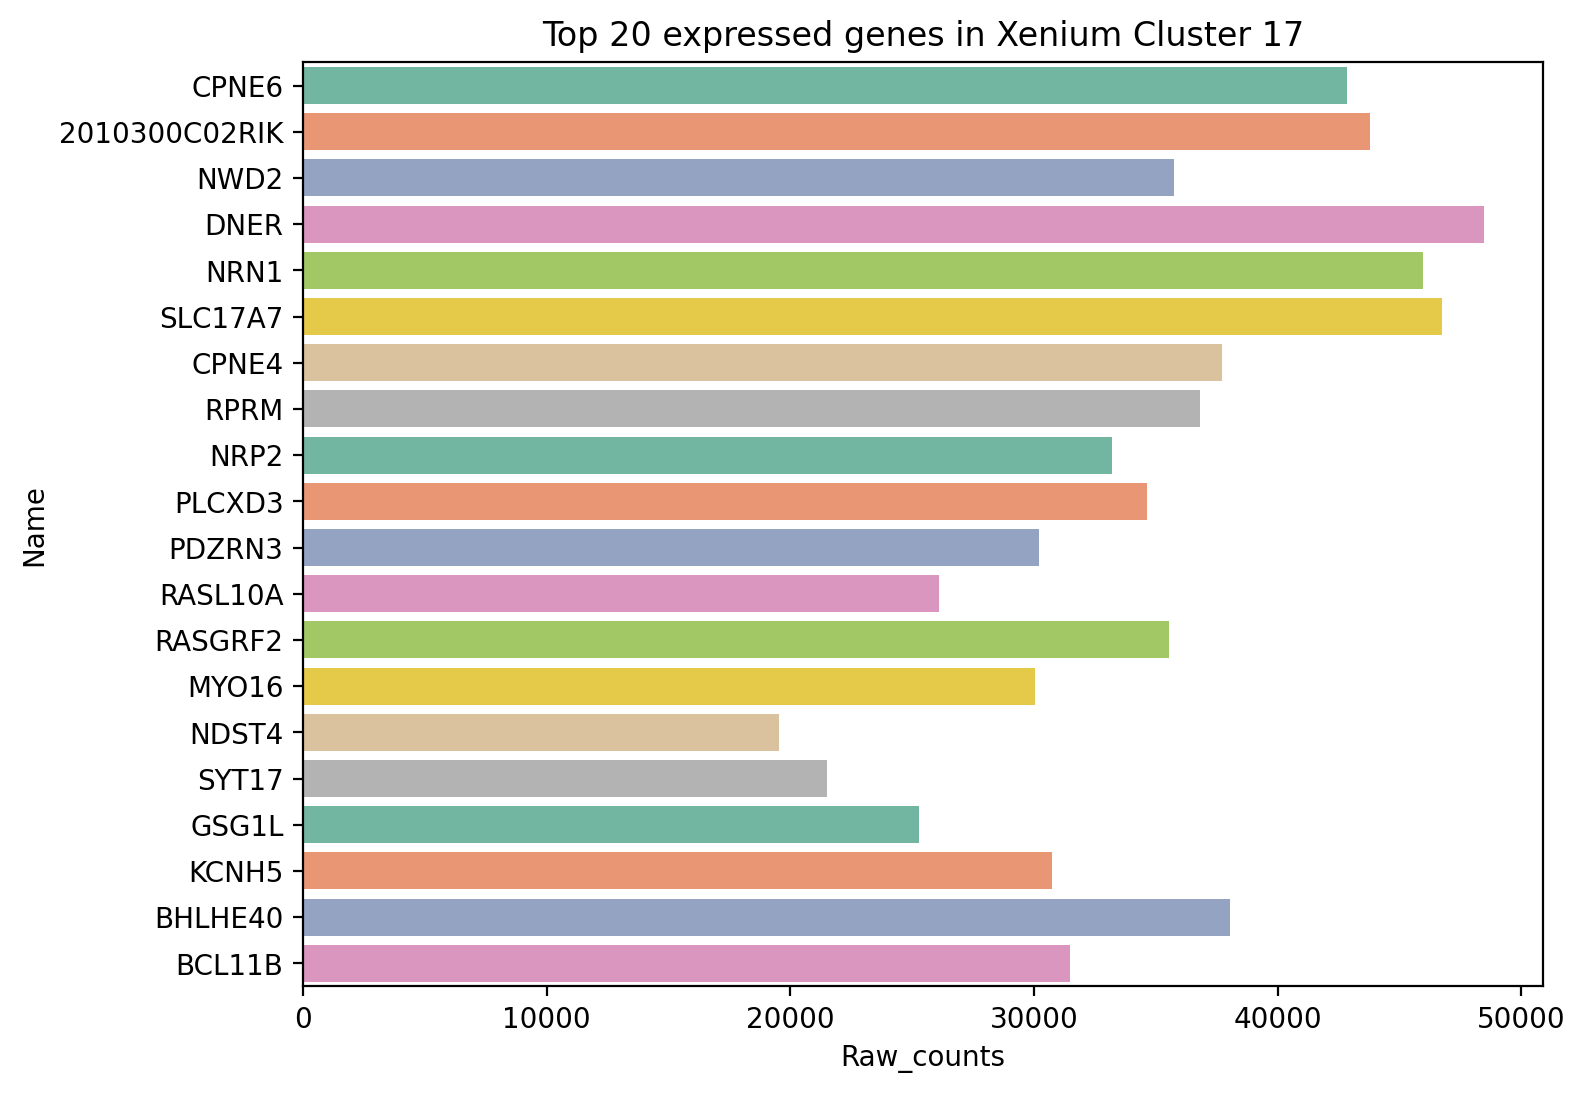

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


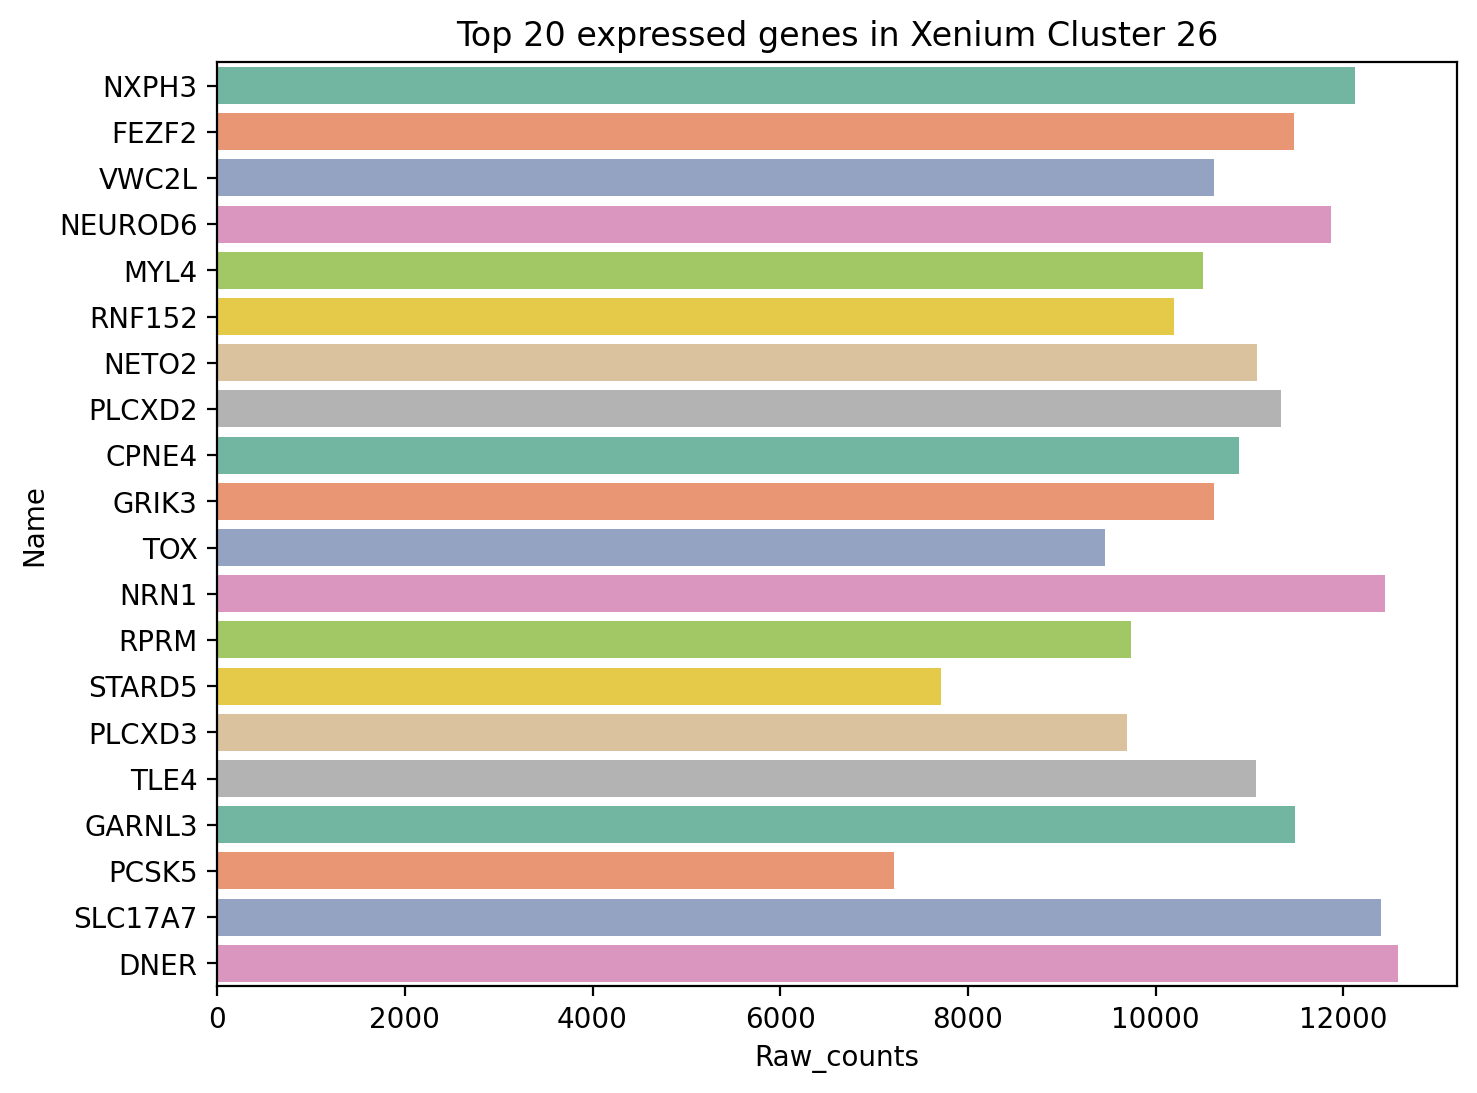

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


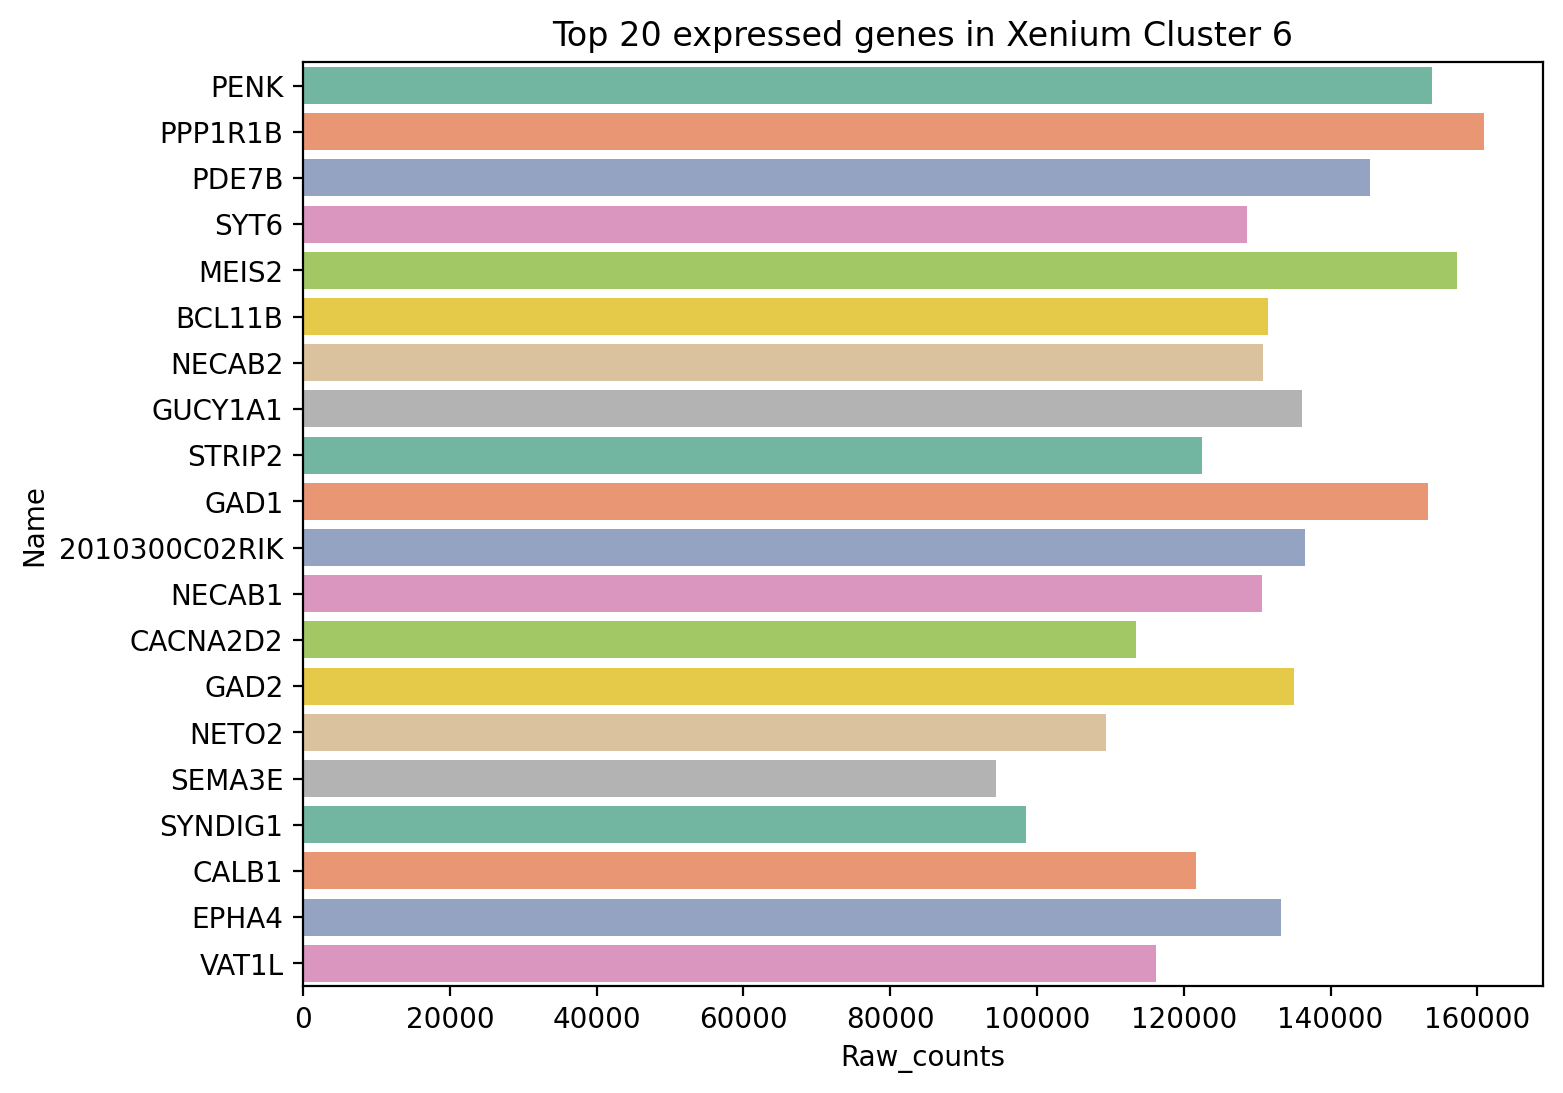

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


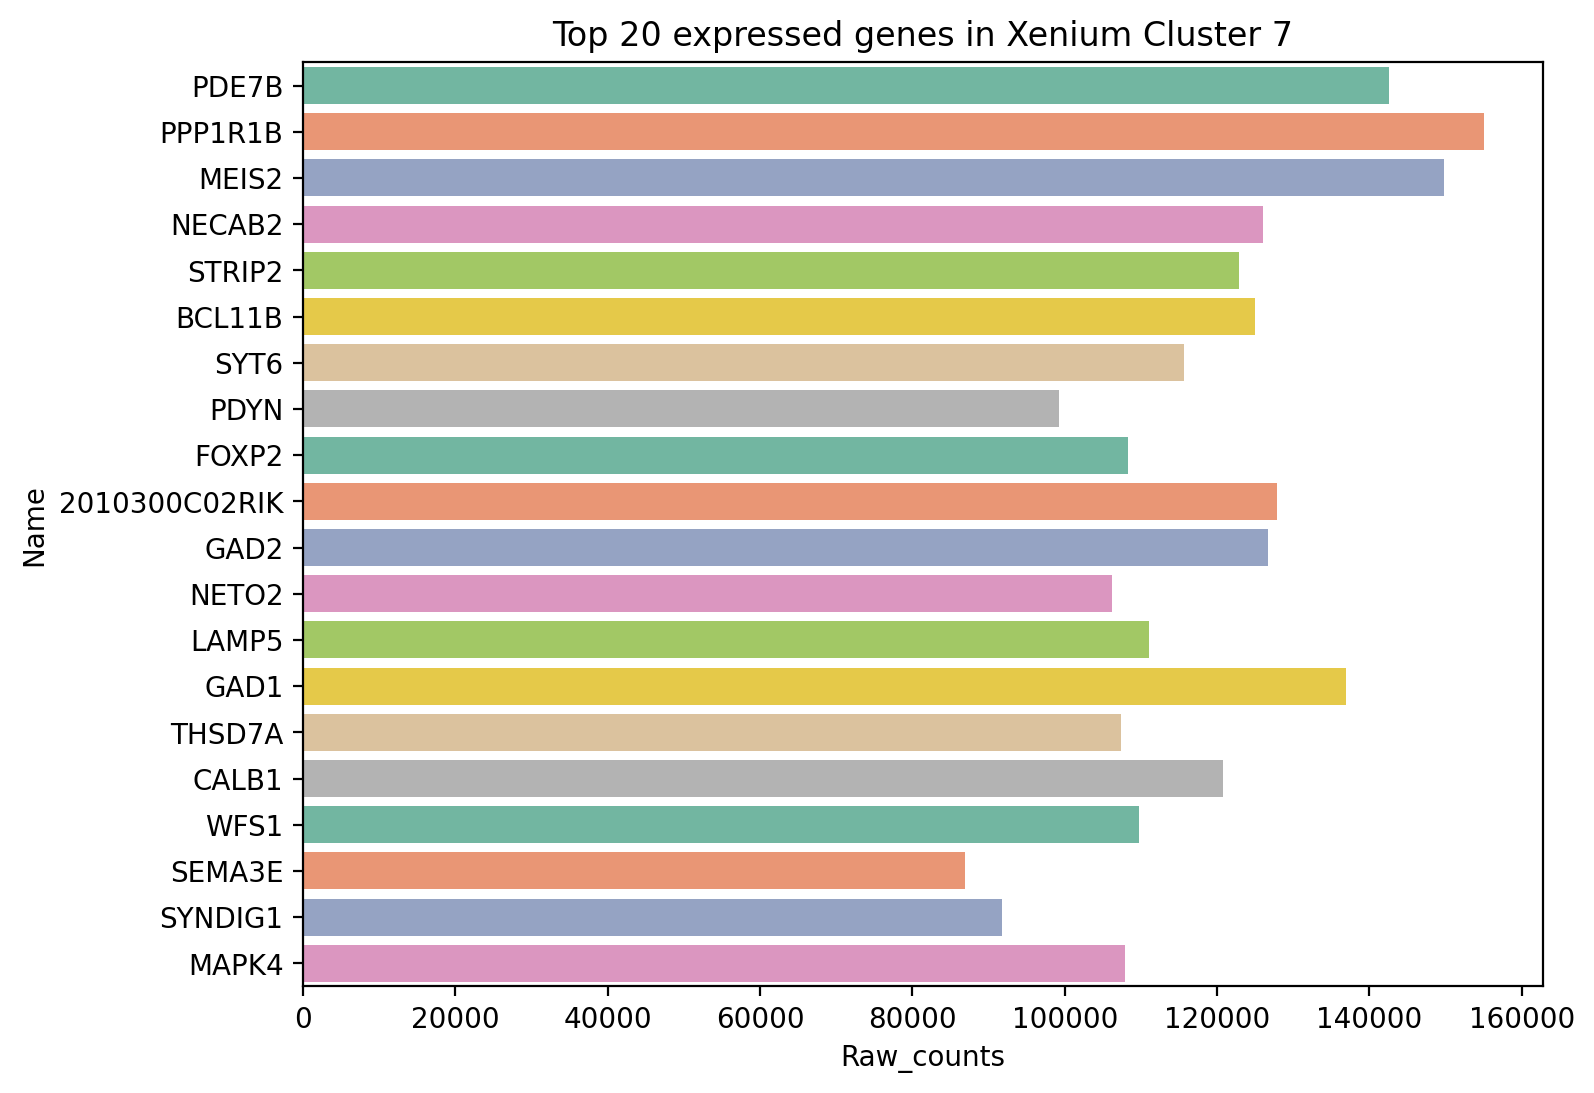

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


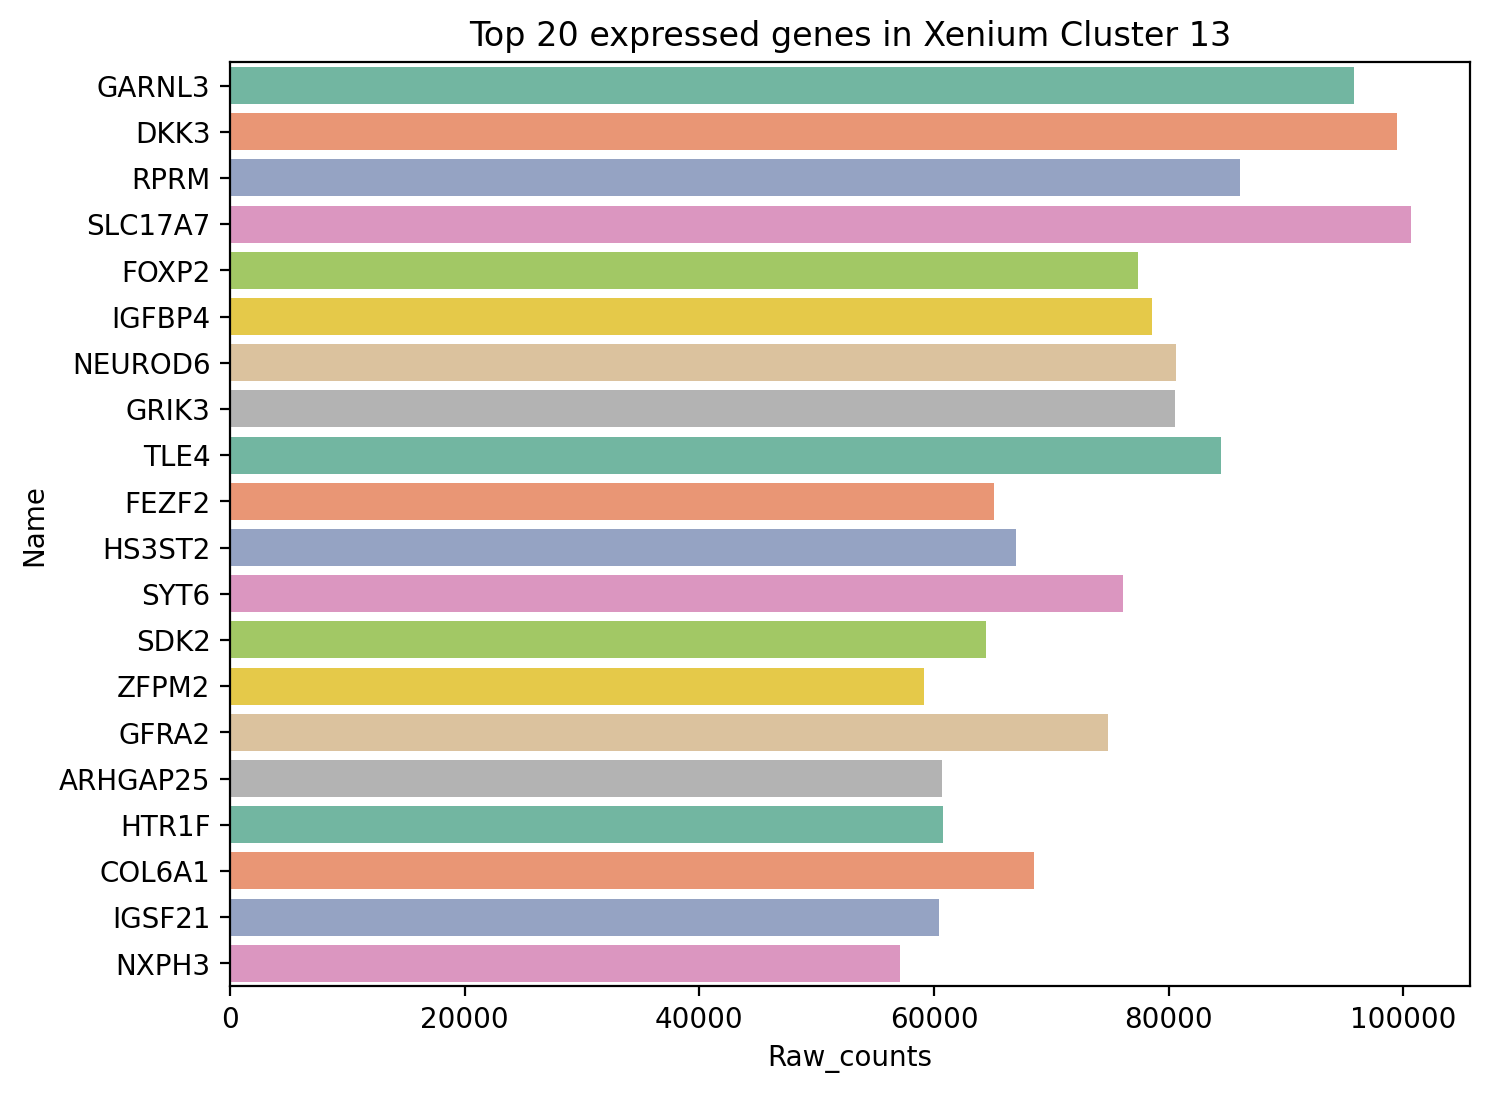

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


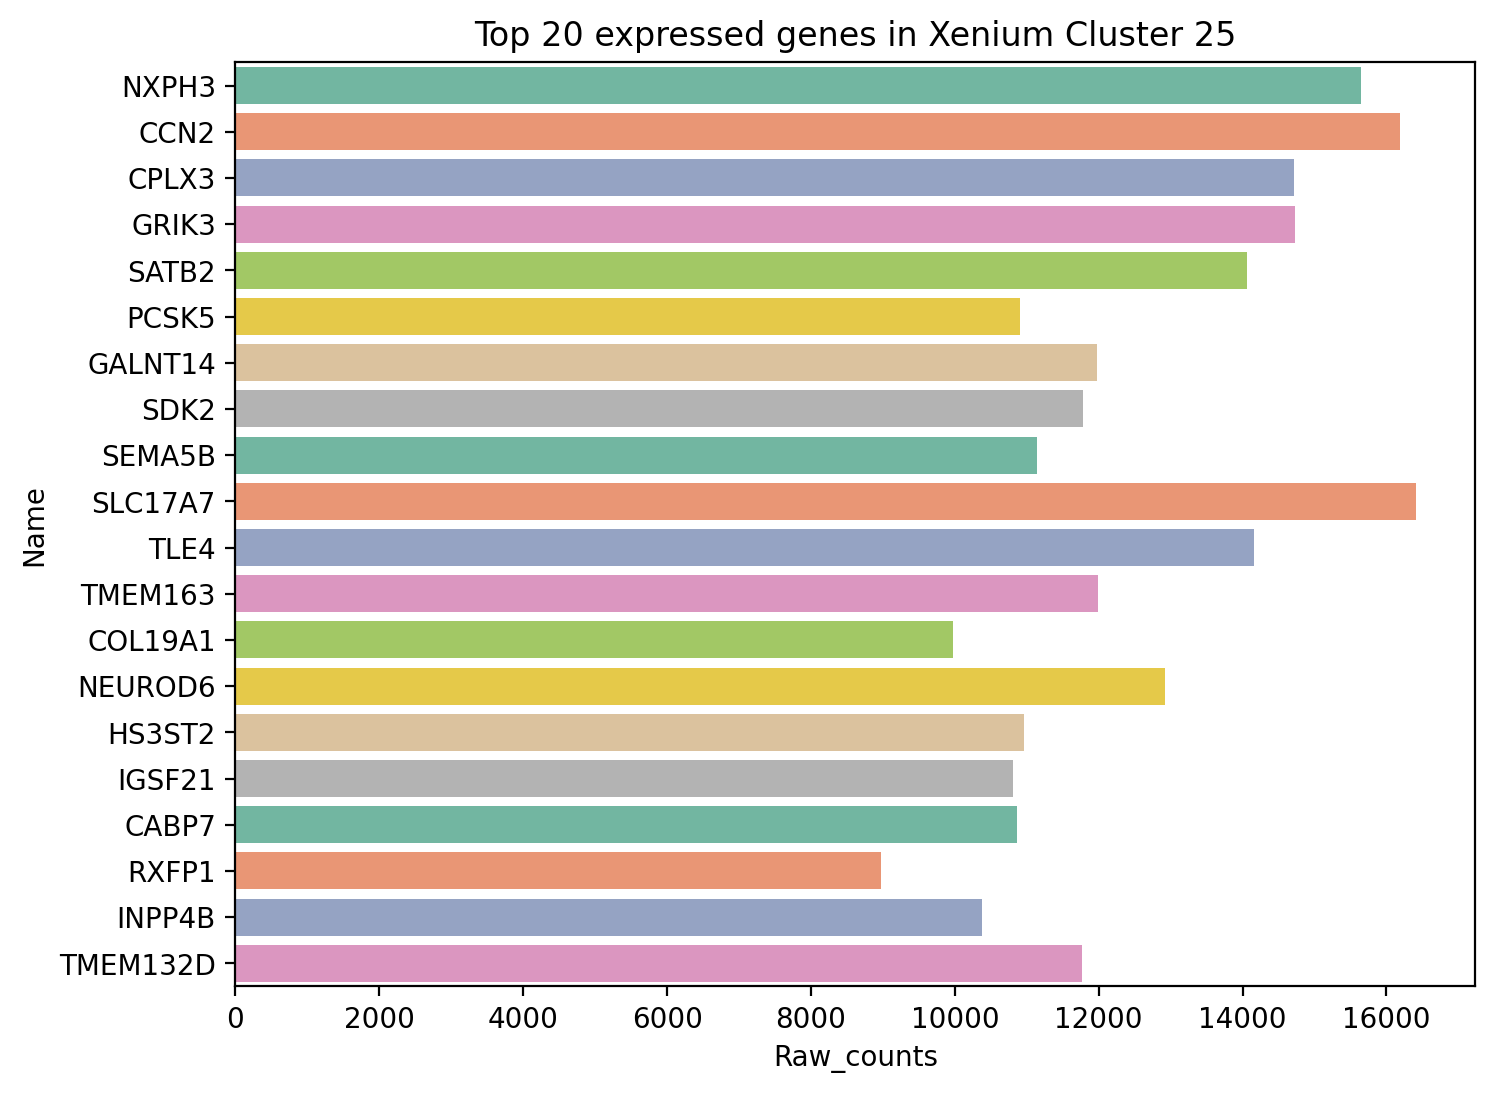

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


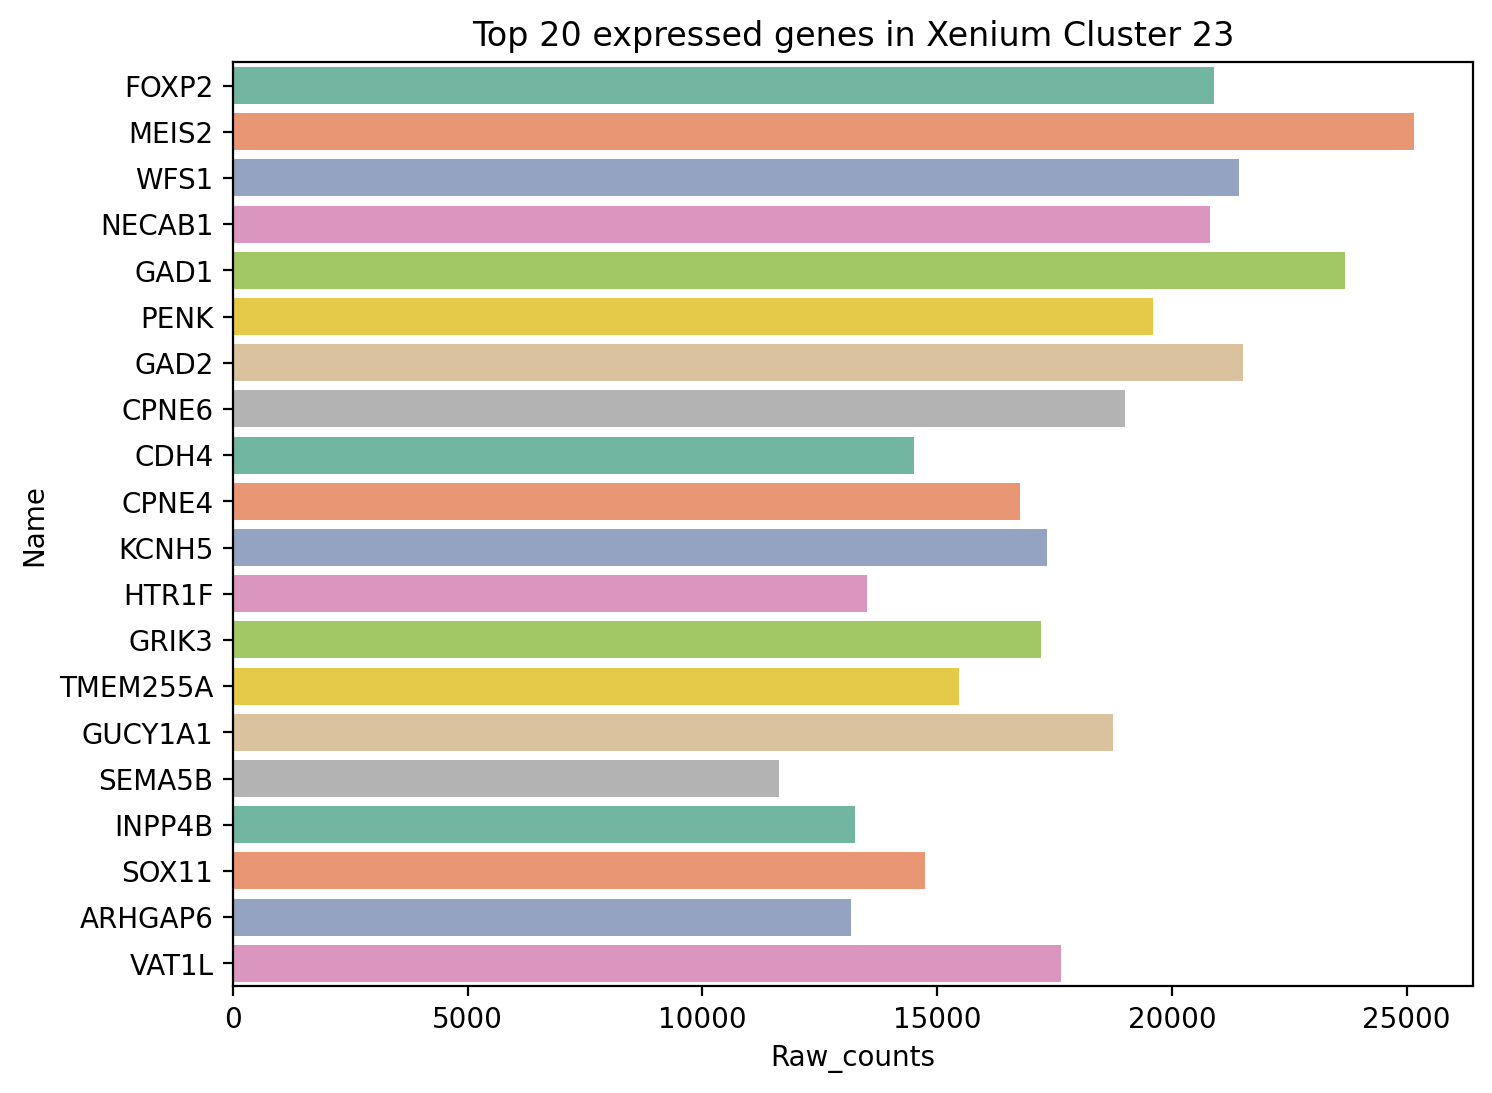

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


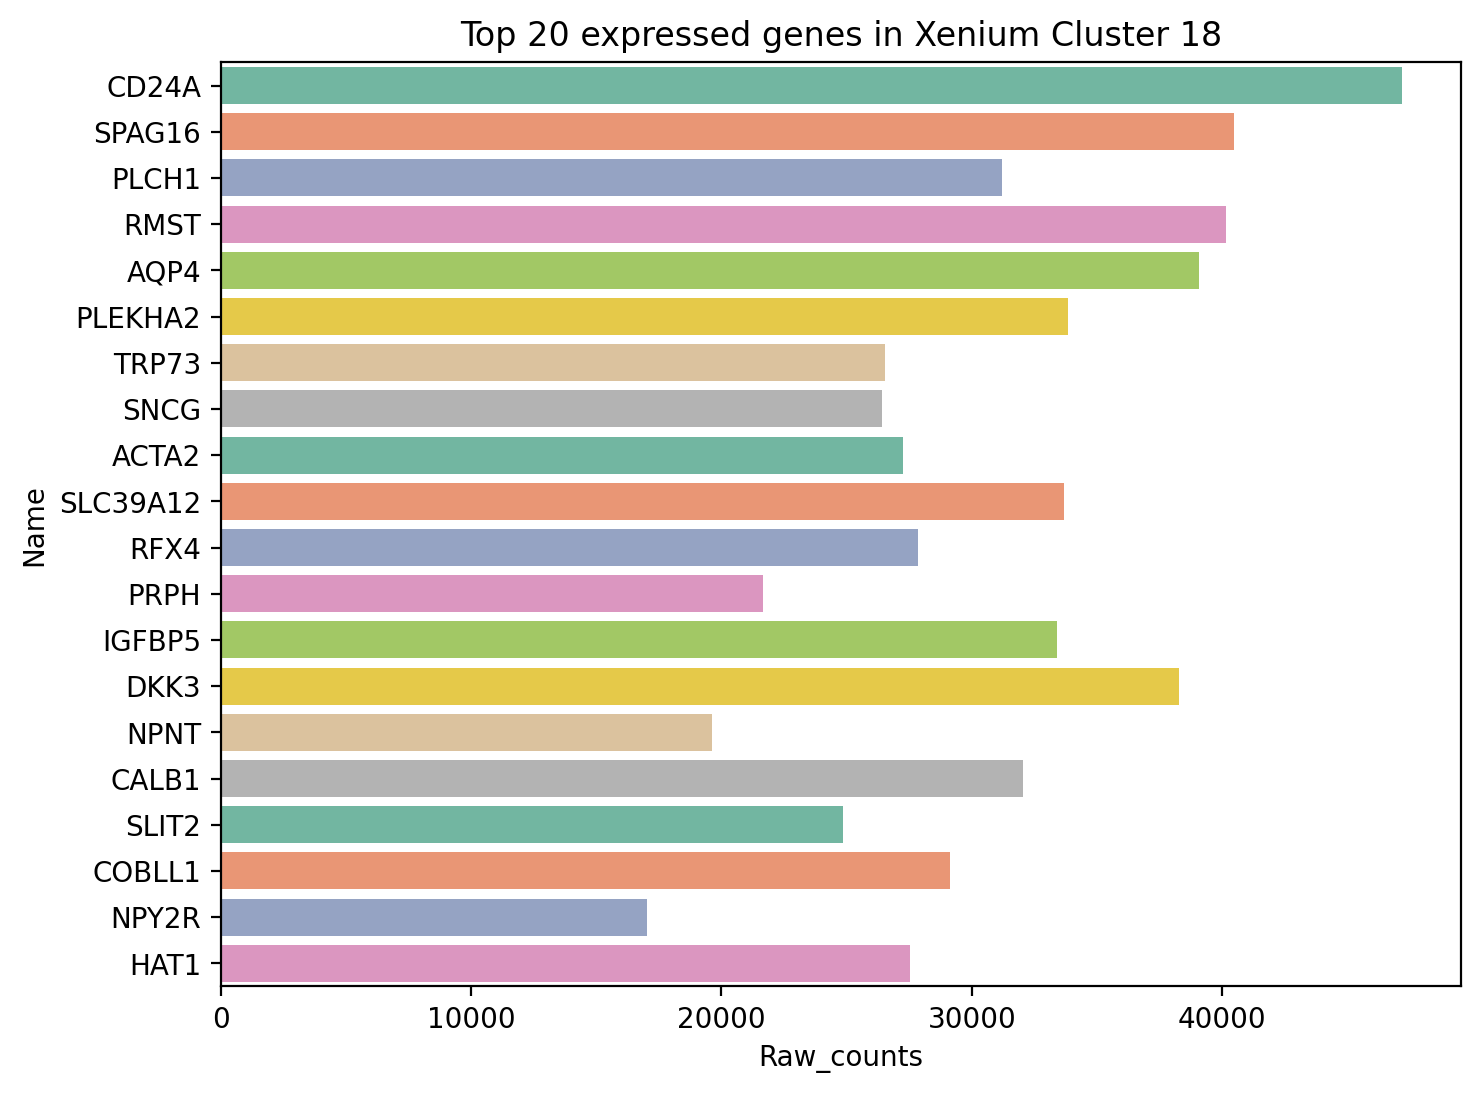

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


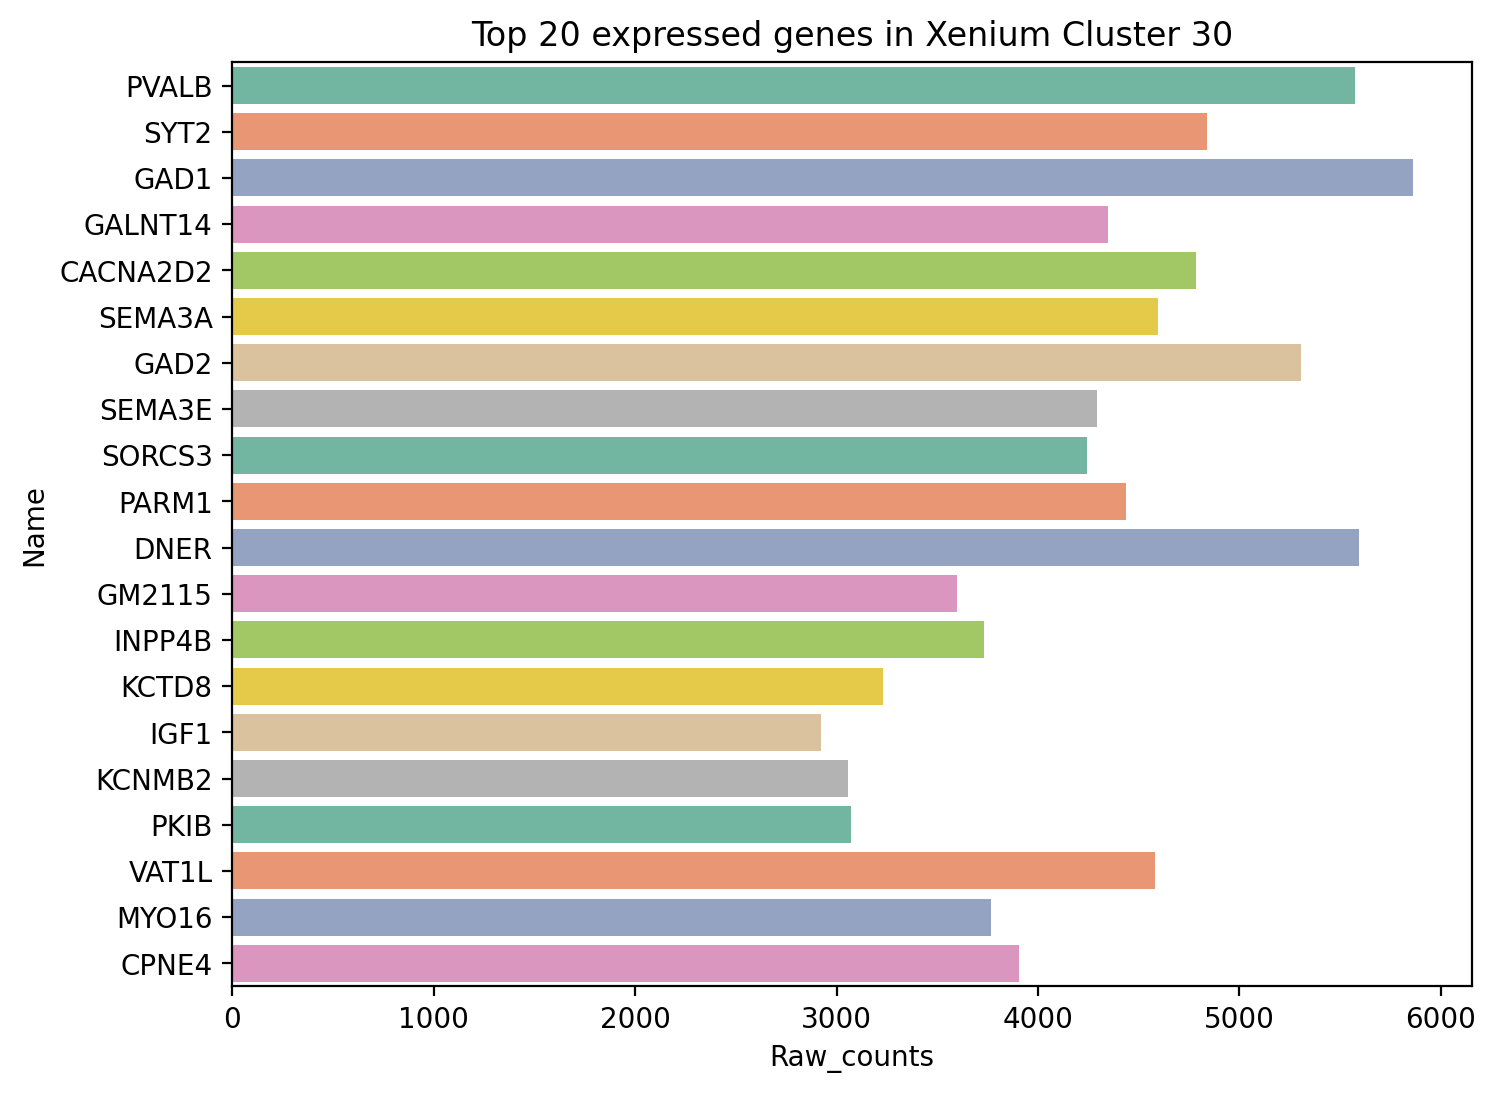

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


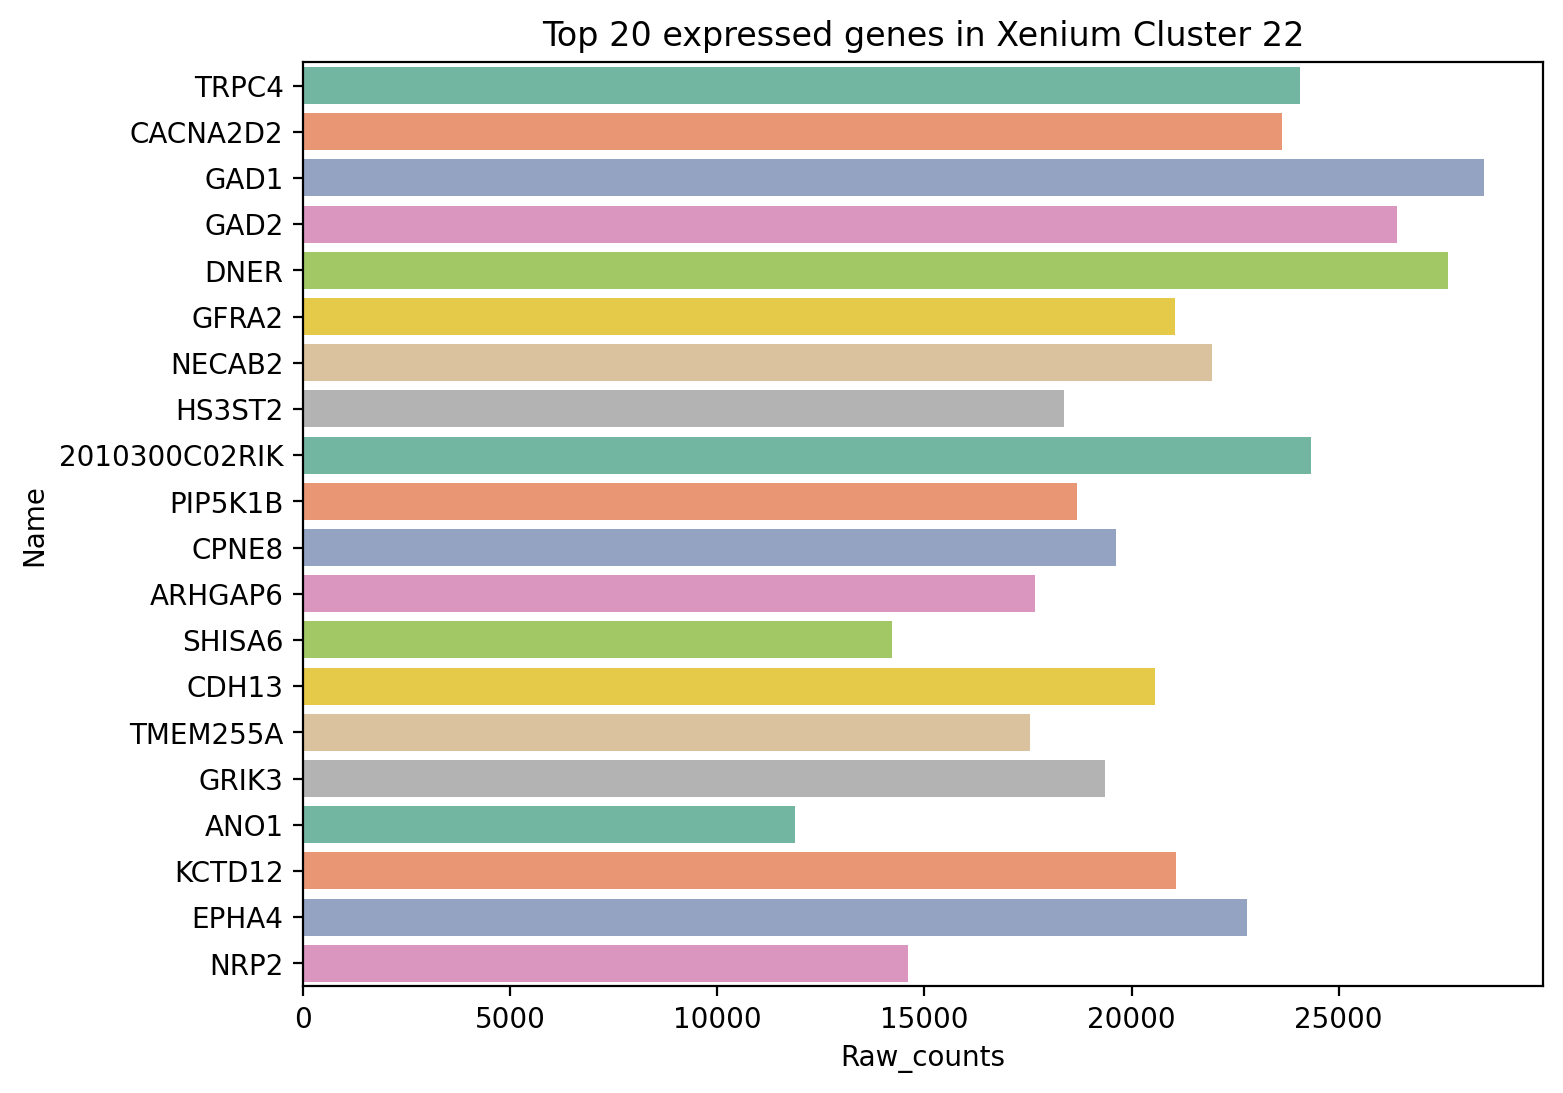

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


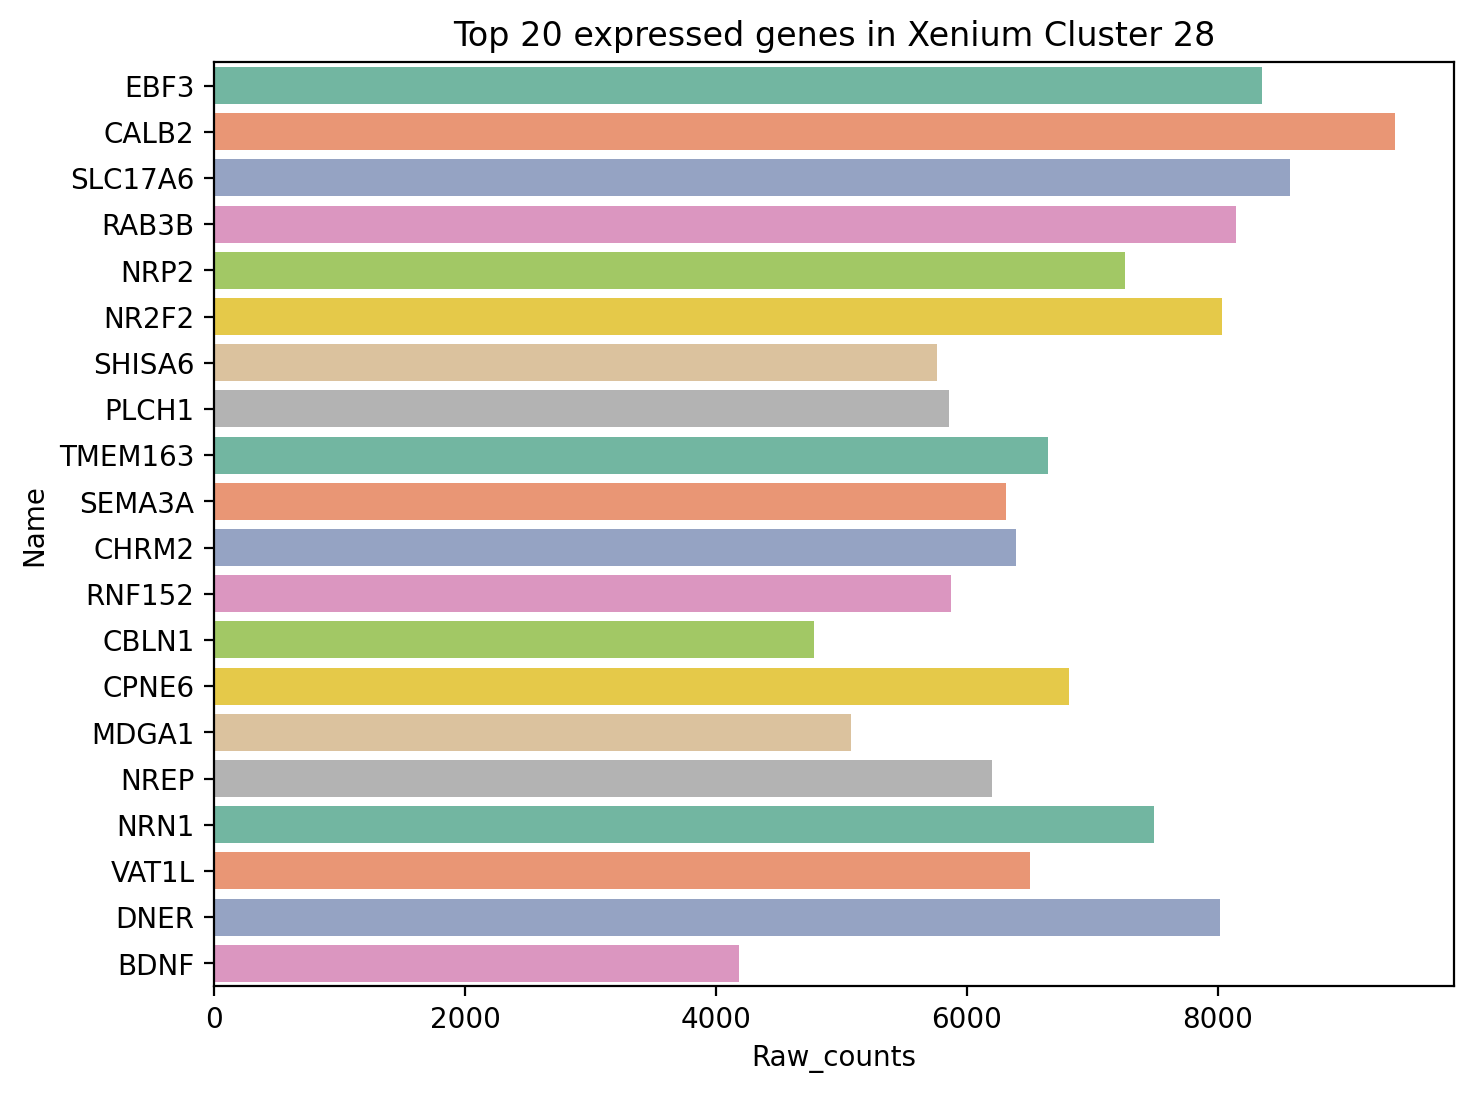

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


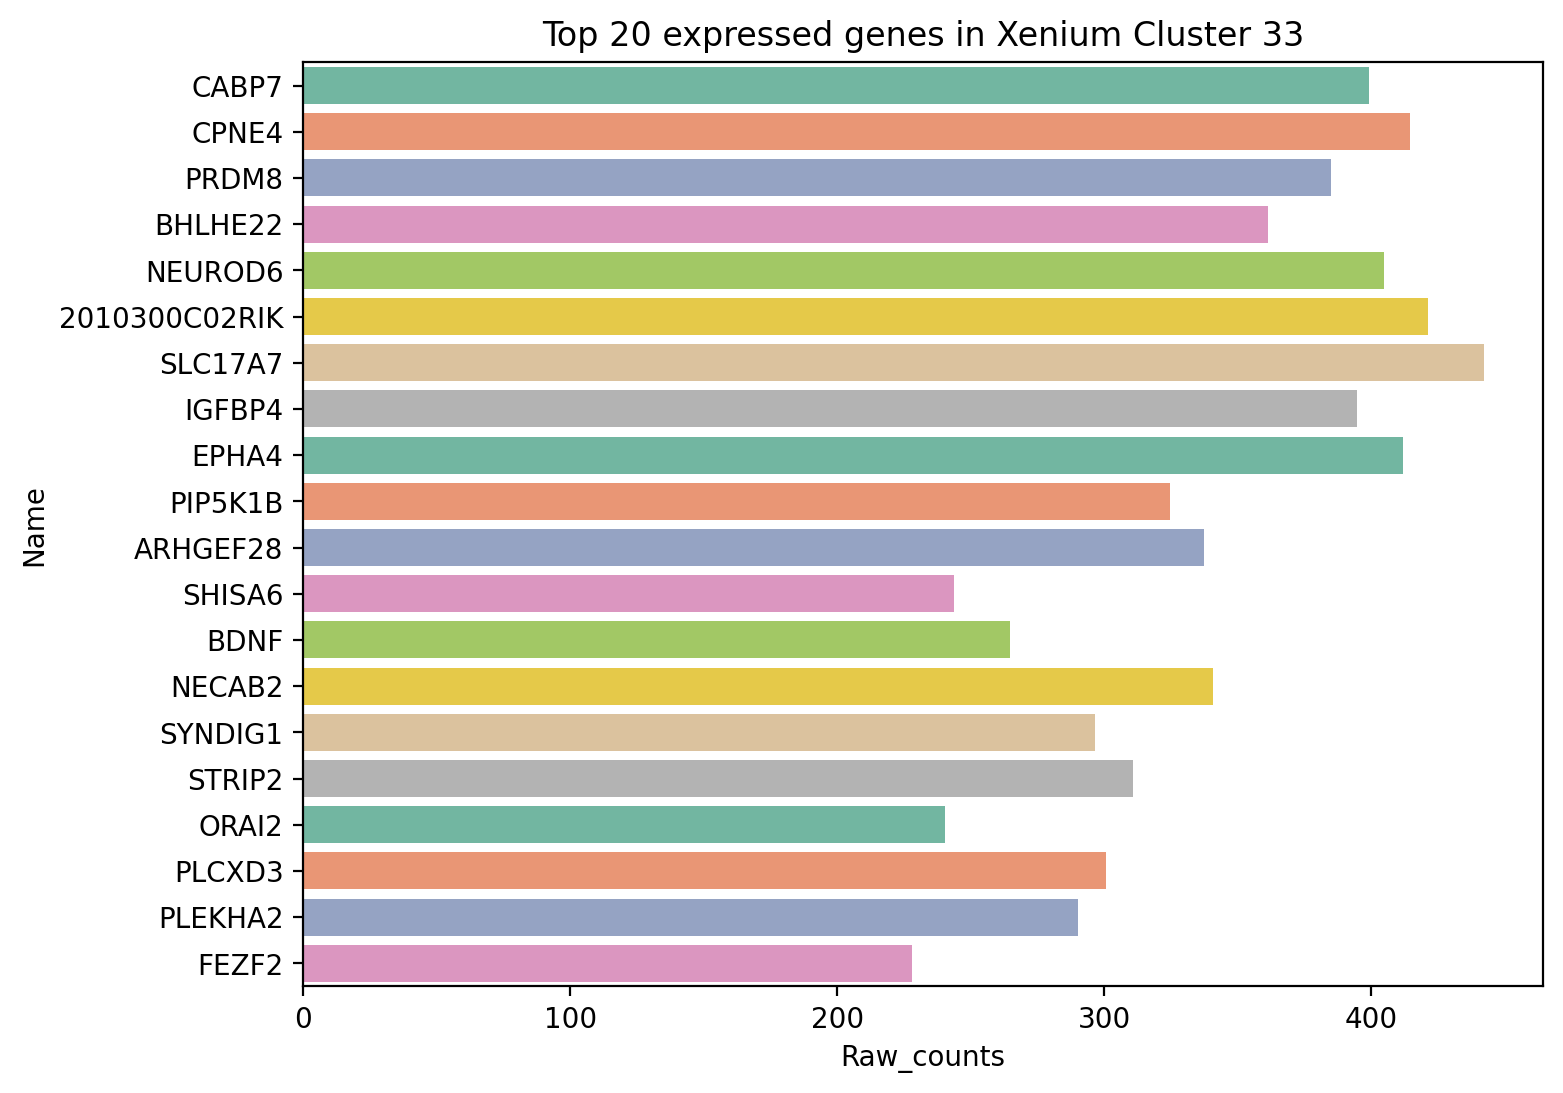

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


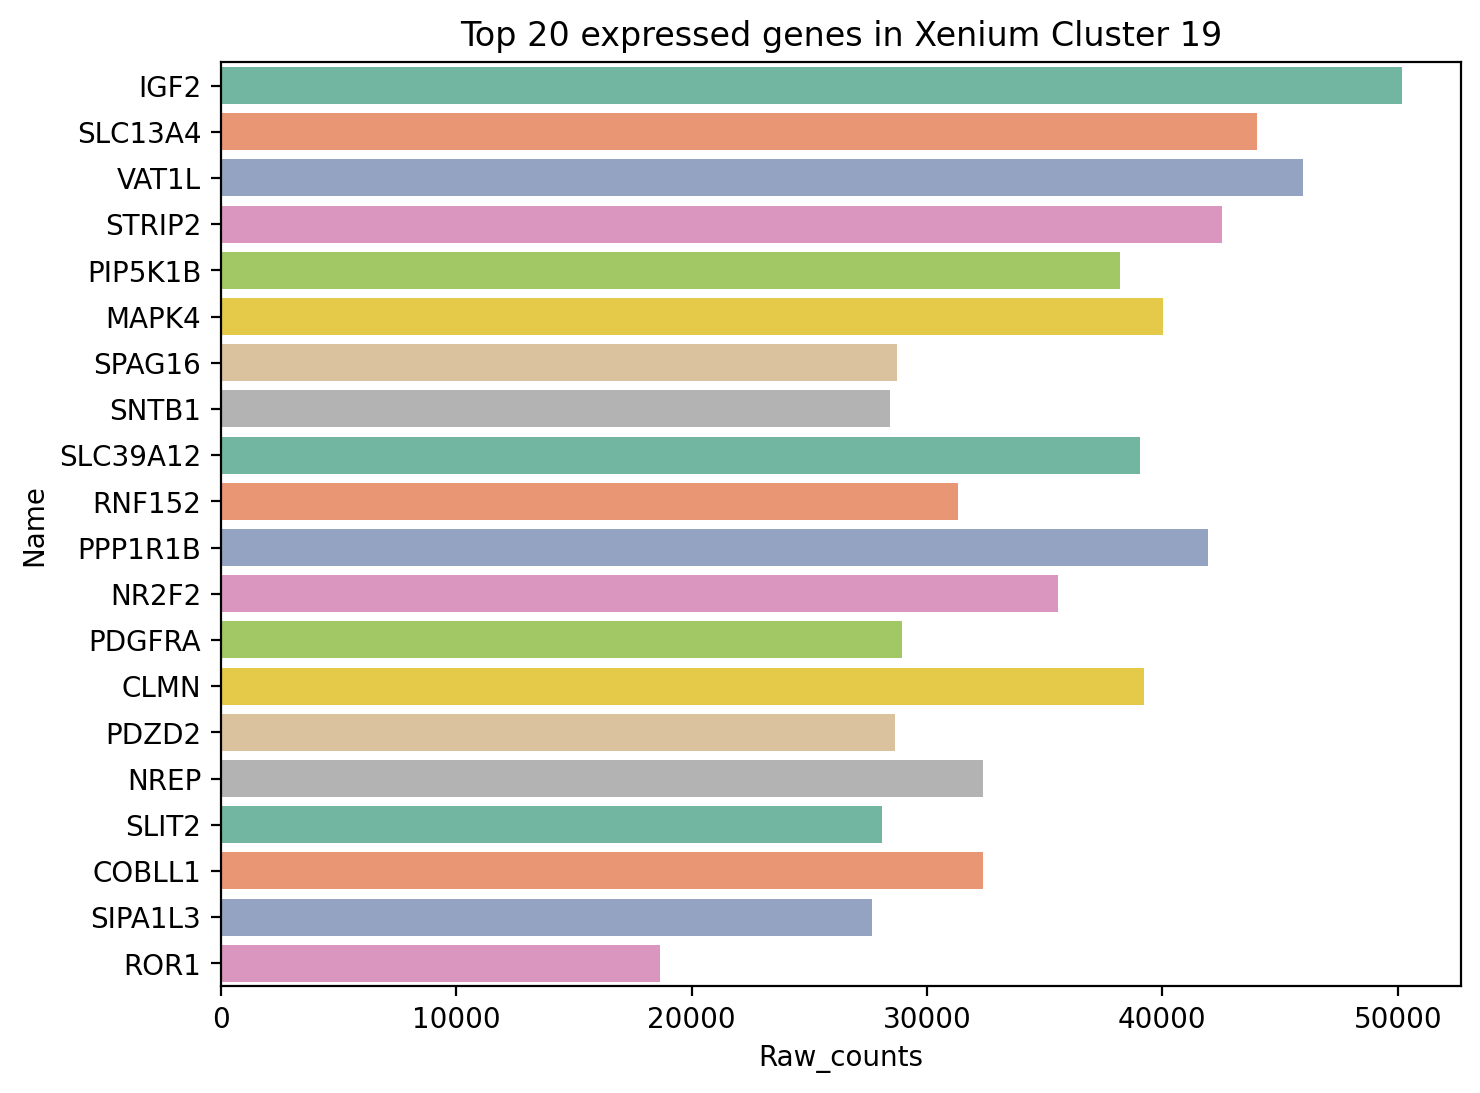

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


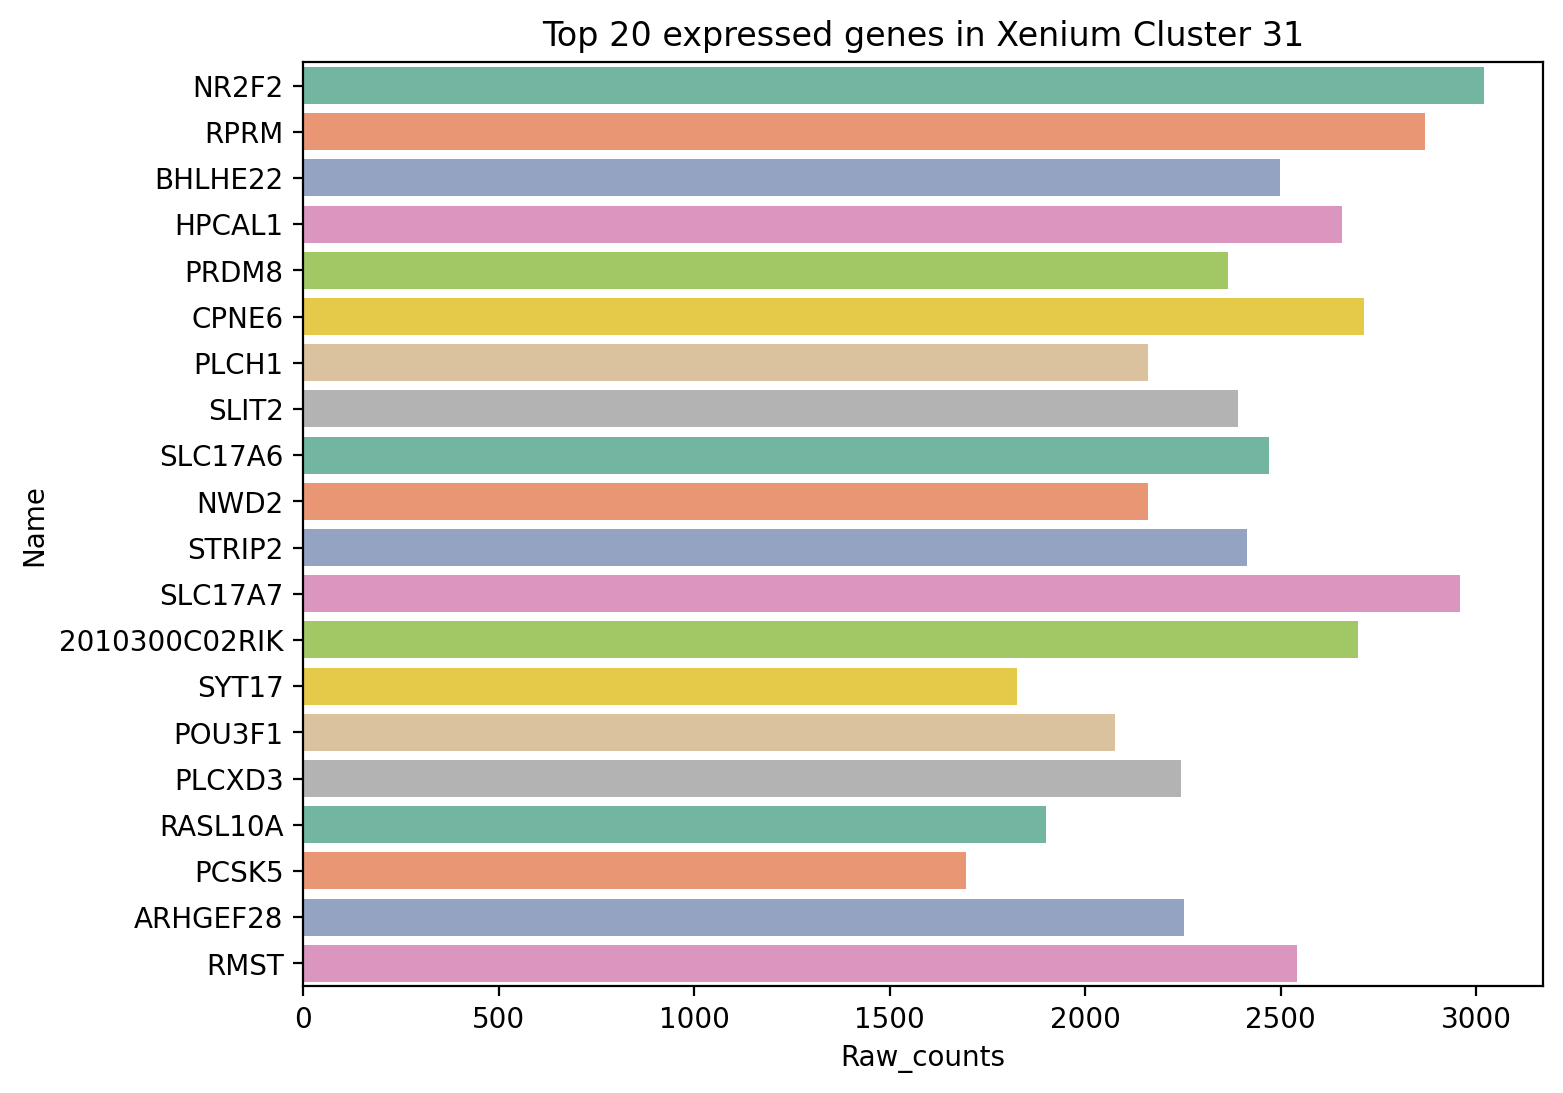

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


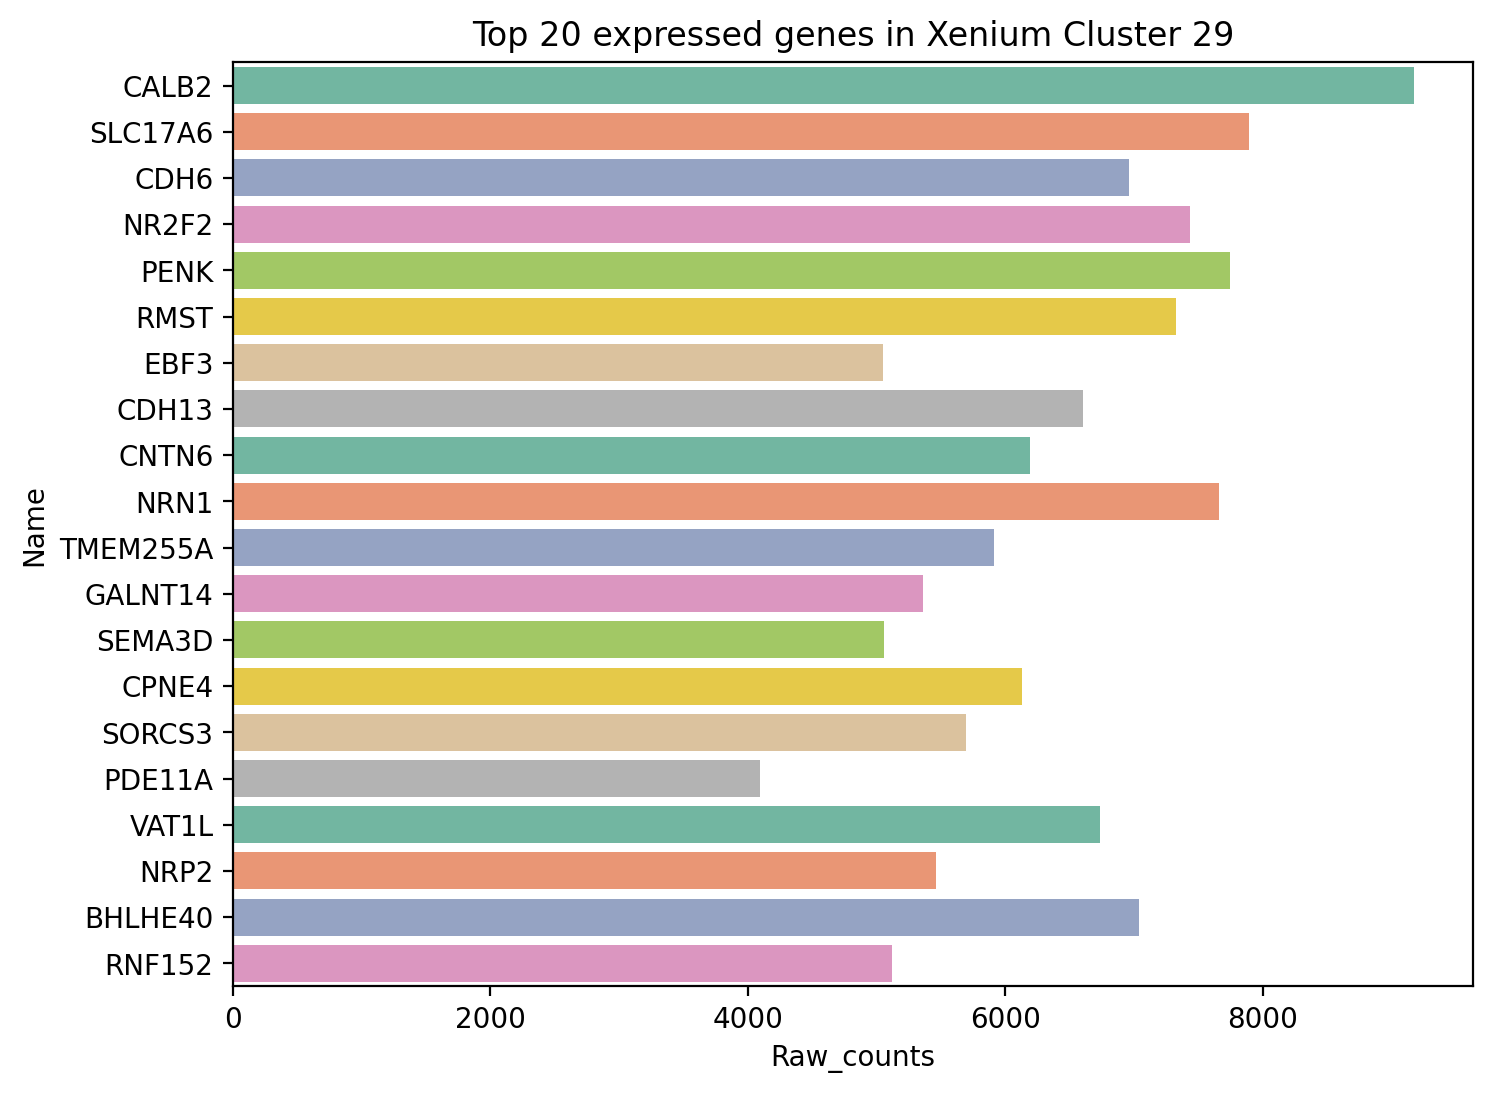

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


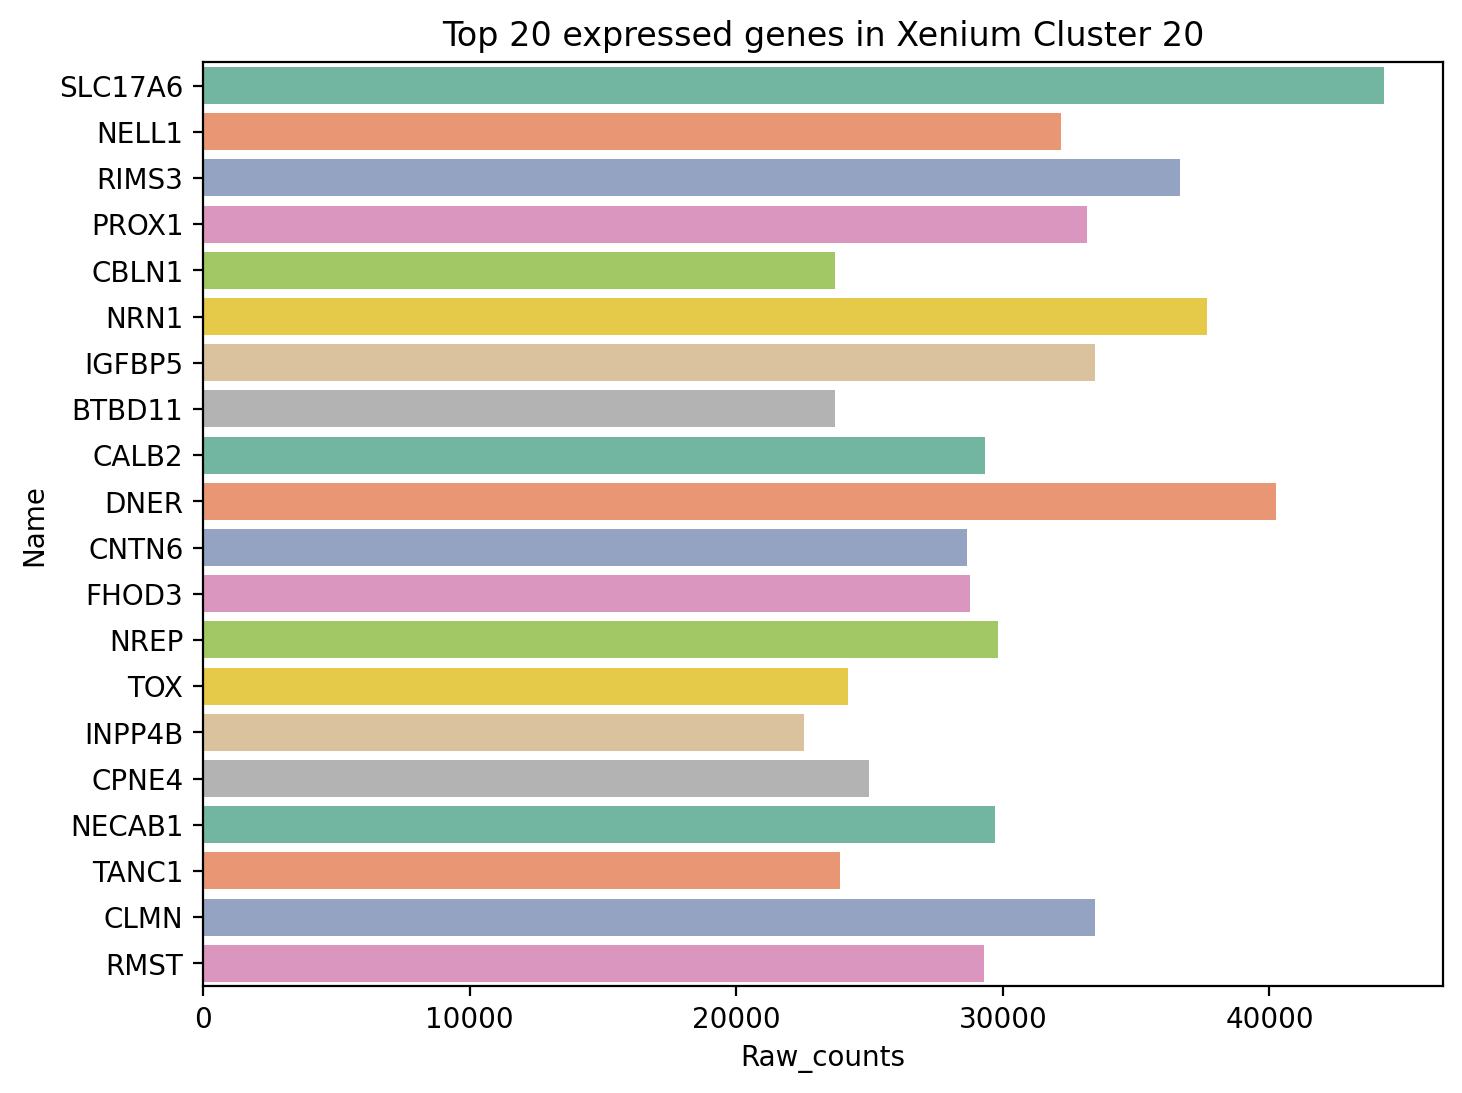

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3328645609.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


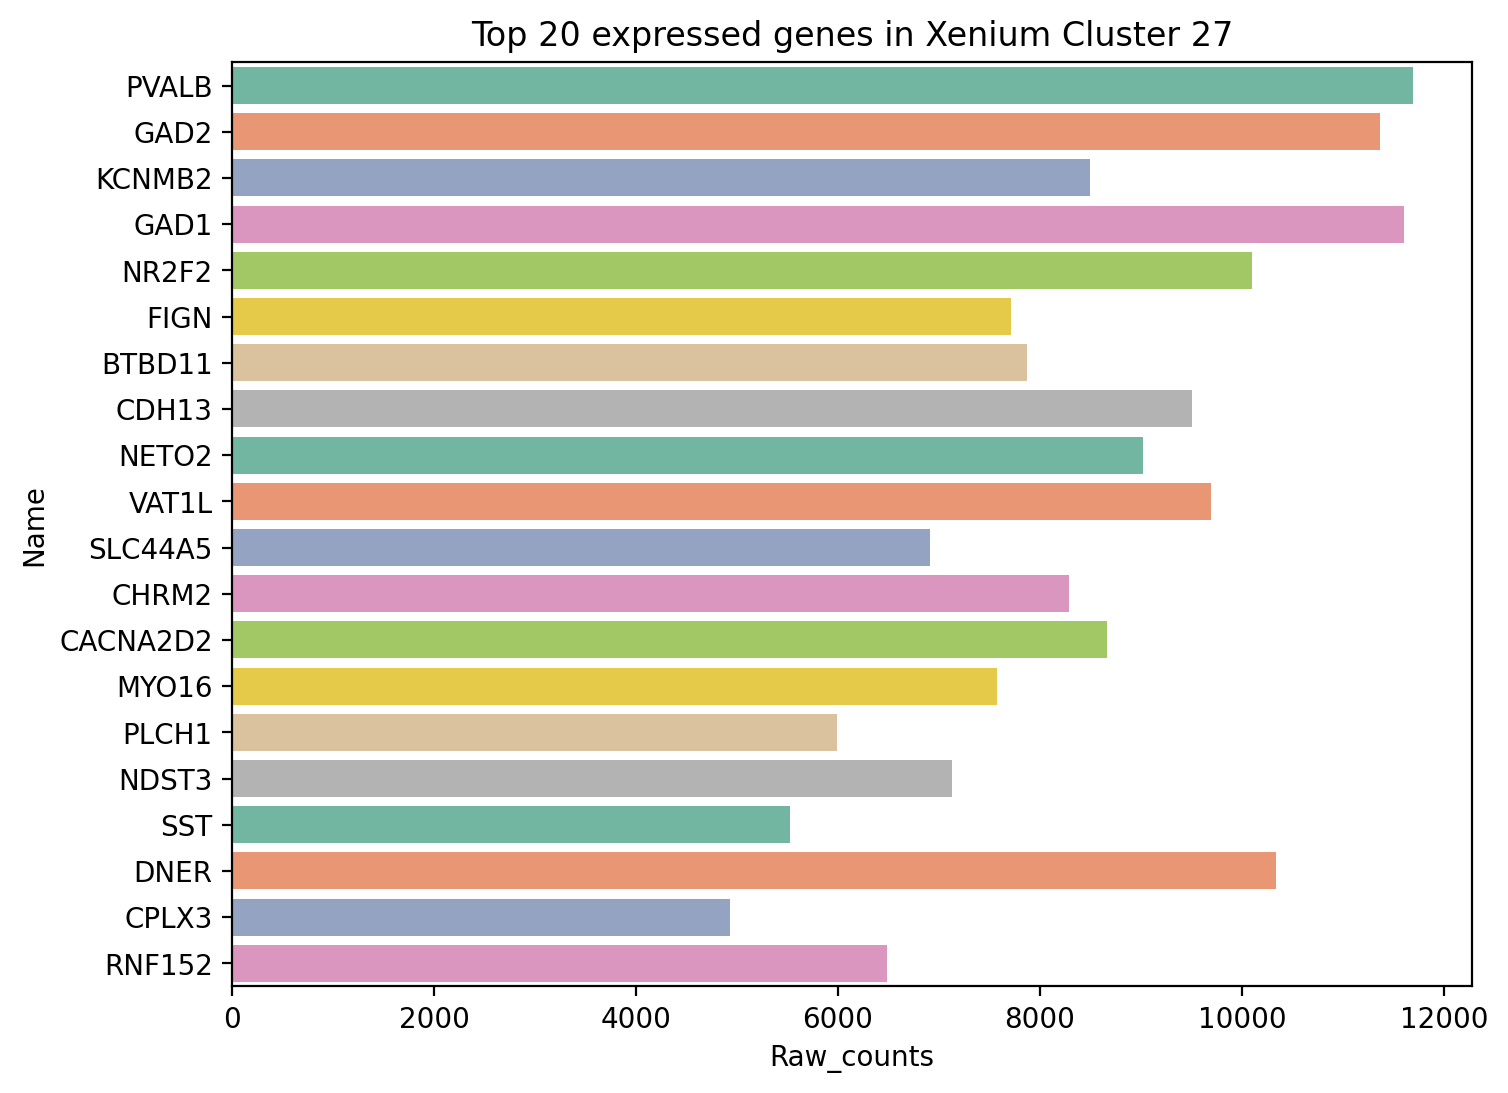

In [15]:
for cluster, i in zip(xenium_leiden_array, range(len(raw_gene_array))):
    x_label = raw_gene_array[i]
    y_label = xenium_scdata.uns['rank_genes_groups']['names'][cluster][:20]
    graph_df = pd.DataFrame().assign(Name = y_label).assign(Raw_counts = x_label)
    #graph_df
    plt.style.use('default')
    plt.figure(figsize = (8, 6))
    sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
    plt.title(f'Top 20 expressed genes in Xenium Cluster {cluster}')
    #plt.savefig(f'Xenium Cluster {cluster} top 20 gene expression bar chart')
    plt.show()

### Normalize the raw counts

#### Create df containing leiden clusters and number of mRNA transcripts

In [16]:
leiden_transcript_df = pd.DataFrame().assign(leiden = leiden_clusters).assign(transcripts = xenium_scdata.obs['Number of mRNA transcripts'].astype(float))
leiden_transcript_df = leiden_transcript_df.groupby('leiden').sum()
leiden_transcript_df

transcripts
leiden             
0         6637339.0
1         7964600.0
2         3734415.0
3         5629686.0
4         5167151.0
5         8752846.0
6         7504777.0
7         7192136.0
8         6714911.0
9         7160836.0
10        2998878.0
11        3725316.0
12        6108198.0
13        5018413.0
14        3445643.0
15        4343916.0
16        3305503.0
17        2644984.0
18        1186328.0
19        1756658.0
20        2160097.0
21        1776617.0
22        1420325.0
23        1023920.0
24        1814171.0
25         993362.0
26         642322.0
27         634674.0
28         347412.0
29         310431.0
30         383457.0
31         222417.0
32          52973.0
33          25076.0

In [17]:
xenium_raw_count_df_normalized = pd.DataFrame()
for i in range(xenium_raw_count_df.shape[0]):
    xenium_raw_count_df_normalized = xenium_raw_count_df_normalized.append(xenium_raw_count_df.iloc[i] / leiden_transcript_df.get('transcripts').iloc[i])
#xenium_raw_count_df_normalized.to_csv('xenium_raw_count_df_normalized_leiden.csv',index=True, mode='w')
xenium_raw_count_df_normalized

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3349643343.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xenium_raw_count_df_normalized = xenium_raw_count_df_normalized.append(xenium_raw_count_df.iloc[i] / leiden_transcript_df.get('transcripts').iloc[i])
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3349643343.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xenium_raw_count_df_normalized = xenium_raw_count_df_normalized.append(xenium_raw_count_df.iloc[i] / leiden_transcript_df.get('transcripts').iloc[i])
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\3349643343.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  xenium_raw_count_df_normalized = xenium_raw_count_df_normalized.append(xenium_raw_count_df.ilo

2010300C02RIK    ACSBG1     ACTA2    ACVRL1   ADAMTS2  ADAMTSL1    ADGRL4  \
0        0.012948  0.042336  0.002950  0.002205  0.001474  0.001531  0.003629   
1        0.009238  0.015367  0.003364  0.003006  0.007396  0.017675  0.004069   
2        0.004466  0.015067  0.004178  0.001591  0.015216  0.040899  0.003524   
3        0.013489  0.018657  0.002581  0.030059  0.000913  0.001315  0.037139   
4        0.006180  0.012931  0.013399  0.015223  0.005414  0.001964  0.015552   
5        0.007739  0.006768  0.002482  0.000610  0.001180  0.001435  0.000926   
6        0.018193  0.006226  0.003885  0.003659  0.000767  0.000658  0.001369   
7        0.017773  0.005846  0.004062  0.005261  0.001689  0.000474  0.001663   
8        0.015649  0.007481  0.002058  0.000703  0.000267  0.000914  0.001338   
9        0.014459  0.005059  0.002199  0.000415  0.001381  0.000393  0.000880   
10       0.012834  0.016762  0.002439  0.005519  0.001016  0.001416  0.004364   
11       0.014919  0.010423  0.002946  0.001349  0.006230  0.014625  0.002478   
12       0.013310  0.004805  0.002528  0.000486  0.001788  0.001225  0.000846   
13       0.015275  0.005114  0.002735  0.000534  0.001164  0.003861  0.000944   
14       0.009813  0.011467  0.002507  0.001562  0.002183  0.003023  0.002463   
15       0.007439  0.006136  0.002348  0.000639  0.004950  0.001443  0.000966   
16       0.005813  0.004825  0.001972  0.000362  0.000446  0.000643  0.000774   
17       0.016557  0.004488  0.001873  0.000378  0.001066  0.000713  0.000646   
18       0.025164  0.013366  0.022969  0.002830  0.002103  0.003082  0.001940   
19       0.010302  0.001126  0.003026  0.006649  0.000429  0.007273  0.004700   
20       0.005091  0.007666  0.002487  0.001568  0.004393  0.002107  0.001240   
21       0.007787  0.005347  0.001830  0.000428  0.000547  0.002609  0.000738   
22       0.017125  0.007119  0.004199  0.000954  0.000597  0.007801  0.001069   
23       0.019006  0.006590  0.002443  0.000549  0.000300  0.007622  0.001321   
24       0.009663  0.003765  0.002248  0.000499  0.003099  0.000358  0.000660   
25       0.010730  0.003576  0.002810  0.000323  0.000866  0.001054  0.000684   
26       0.010134  0.006730  0.002038  0.004291  0.000625  0.000717  0.001418   
27       0.002442  0.006207  0.001611  0.000462  0.002813  0.000832  0.001563   
28       0.004536  0.008653  0.003365  0.000855  0.006441  0.000918  0.002492   
29       0.008002  0.007406  0.002356  0.000643  0.001153  0.002966  0.001358   
30       0.001538  0.005522  0.002145  0.000286  0.000339  0.000334  0.000540   
31       0.012125  0.005332  0.001588  0.007590  0.000605  0.000614  0.001051   
32       0.006353  0.017066  0.001537  0.001207  0.004468  0.000977  0.002509   
33       0.016797  0.007839  0.001566  0.000377  0.000800  0.001035  0.000941   

     ALDH1A2    ANGPT1      ANO1  ...     TRP73     TRPC4    UNC13C     VAT1L  \
0   0.001691  0.008687  0.001574  ...  0.000490  0.002408  0.014765  0.010351   
1   0.000843  0.003497  0.002096  ...  0.000538  0.002831  0.011785  0.013272   
2   0.001059  0.006984  0.005280  ...  0.000717  0.001003  0.013979  0.005441   
3   0.000908  0.002644  0.001644  ...  0.000438  0.002579  0.009122  0.007611   
4   0.015094  0.006716  0.011324  ...  0.000289  0.006919  0.005902  0.004208   
5   0.000645  0.002235  0.000655  ...  0.000224  0.008720  0.004488  0.015786   
6   0.000523  0.001150  0.000255  ...  0.000415  0.003826  0.007317  0.015478   
7   0.000476  0.001194  0.000253  ...  0.000349  0.001185  0.010244  0.010425   
8   0.000345  0.001000  0.000205  ...  0.000255  0.006671  0.001628  0.003241   
9   0.000483  0.001778  0.000158  ...  0.000422  0.004445  0.000898  0.004714   
10  0.000956  0.002915  0.000901  ...  0.000470  0.002788  0.010628  0.008986   
11  0.000503  0.001969  0.001152  ...  0.000287  0.003633  0.003269  0.004745   
12  0.000405  0.002730  0.000171  ...  0.000291  0.004959  0.001024  0.004944   
13  0.000583  0.001425  0.000200  

In [18]:
raw_gene_array_normalized = np.empty((0,20))
for cluster in xenium_leiden_array:
    raw_gene_array_by_cluster = []
    for gene in xenium_scdata.uns['rank_genes_groups']['names'][cluster][:20]:
        raw_gene_array_by_cluster = np.append(raw_gene_array_by_cluster, xenium_raw_count_df_normalized.at[cluster, gene])
    raw_gene_array_normalized = np.vstack((raw_gene_array_normalized, raw_gene_array_by_cluster))
raw_gene_array_normalized

array([[0.02934099, 0.02556144, 0.02153824, 0.02471062, 0.01981296,
        0.01509384, 0.01561906, 0.02048281, 0.01532732, 0.01430498,
        0.01468324, 0.01378604, 0.01660733, 0.01522264, 0.01966172,
        0.01096831, 0.01555223, 0.01468548, 0.011324  , 0.01151971],
       [0.04481791, 0.04164141, 0.04233639, 0.04004939, 0.03023776,
        0.03885519, 0.0346509 , 0.0323396 , 0.02436307, 0.02291015,
        0.03316028, 0.02924499, 0.02655995, 0.03294767, 0.02420494,
        0.03444579, 0.02622055, 0.01065315, 0.01707835, 0.0296202 ],
       [0.01338345, 0.01924097, 0.01916579, 0.01754159, 0.01530871,
        0.01088674, 0.01461149, 0.01155813, 0.0133431 , 0.01221954,
        0.00875285, 0.01389556, 0.01115689, 0.01243545, 0.00953445,
        0.00969271, 0.00733223, 0.00797896, 0.00759875, 0.00647384],
       [0.04083999, 0.03713908, 0.03603859, 0.03358748, 0.03525627,
        0.03005904, 0.02888293, 0.02802915, 0.02675077, 0.02714874,
        0.02363094, 0.02314563, 0.02106456, 0

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


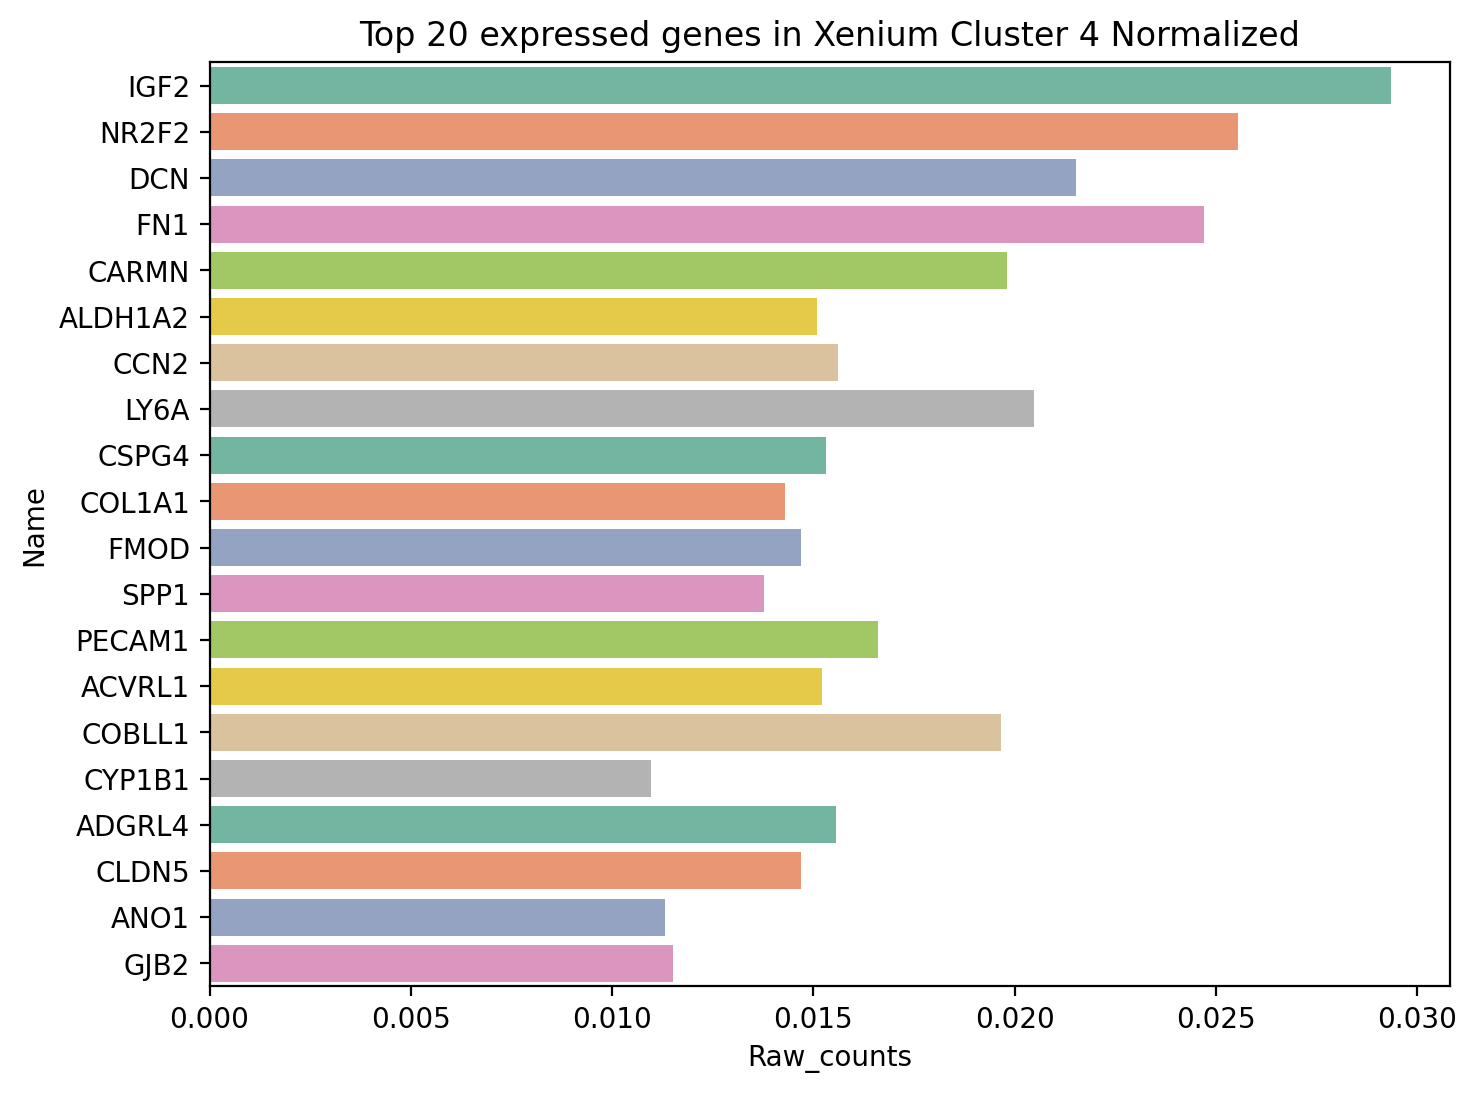

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


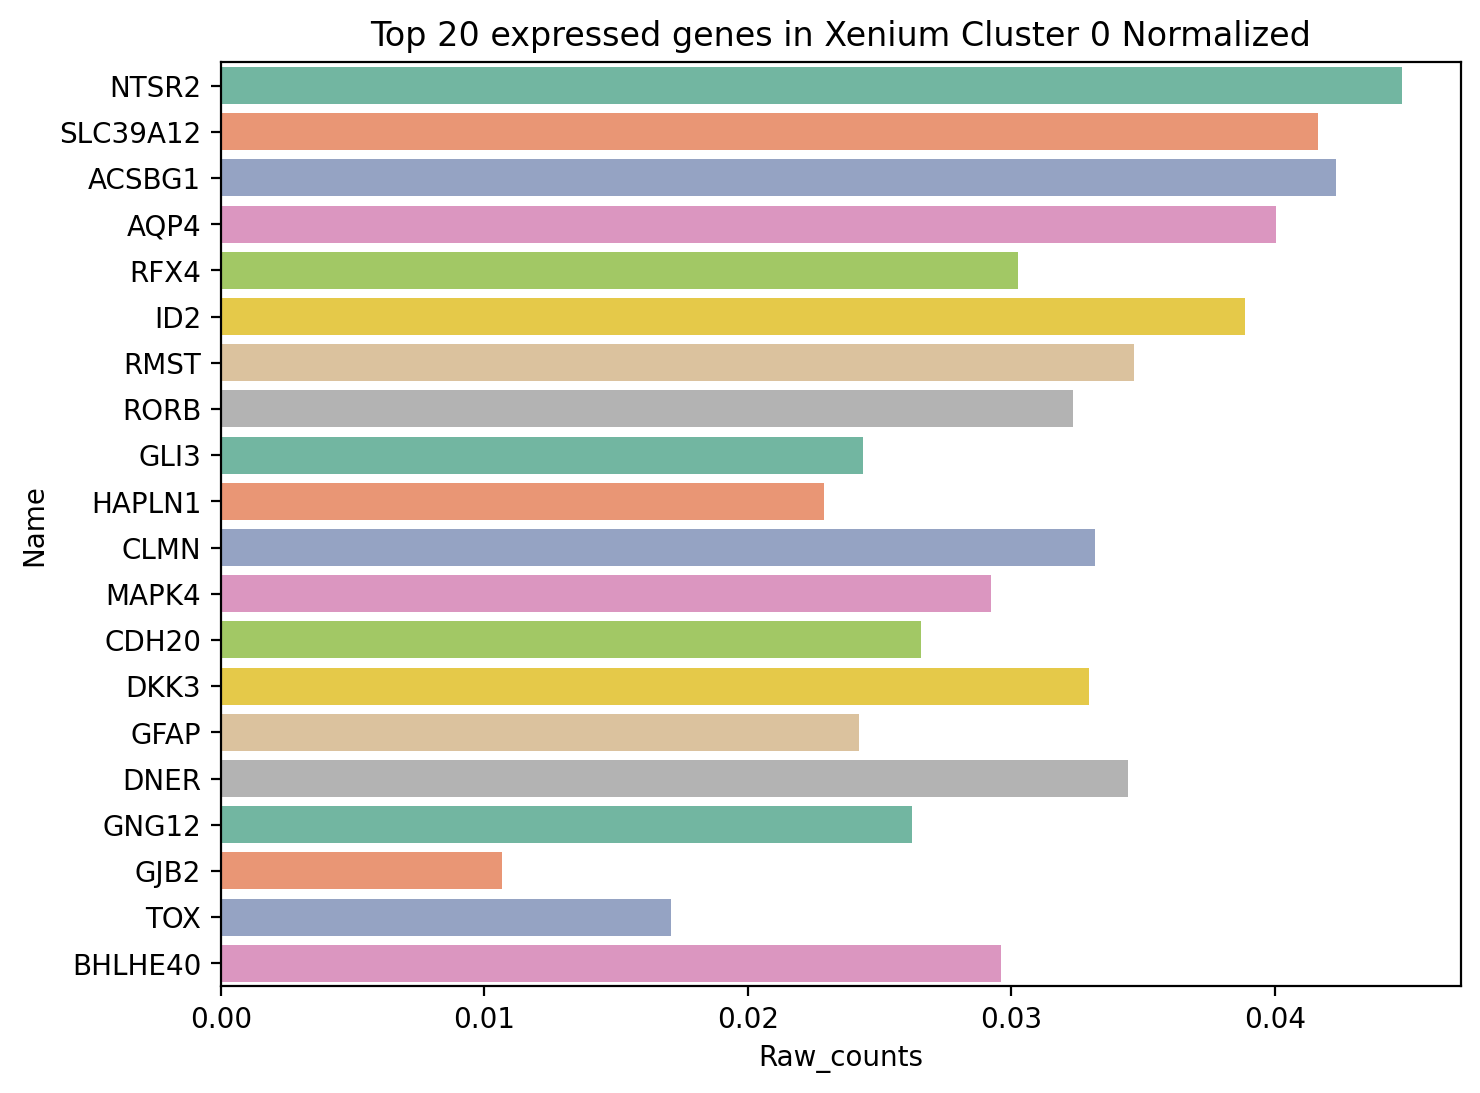

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


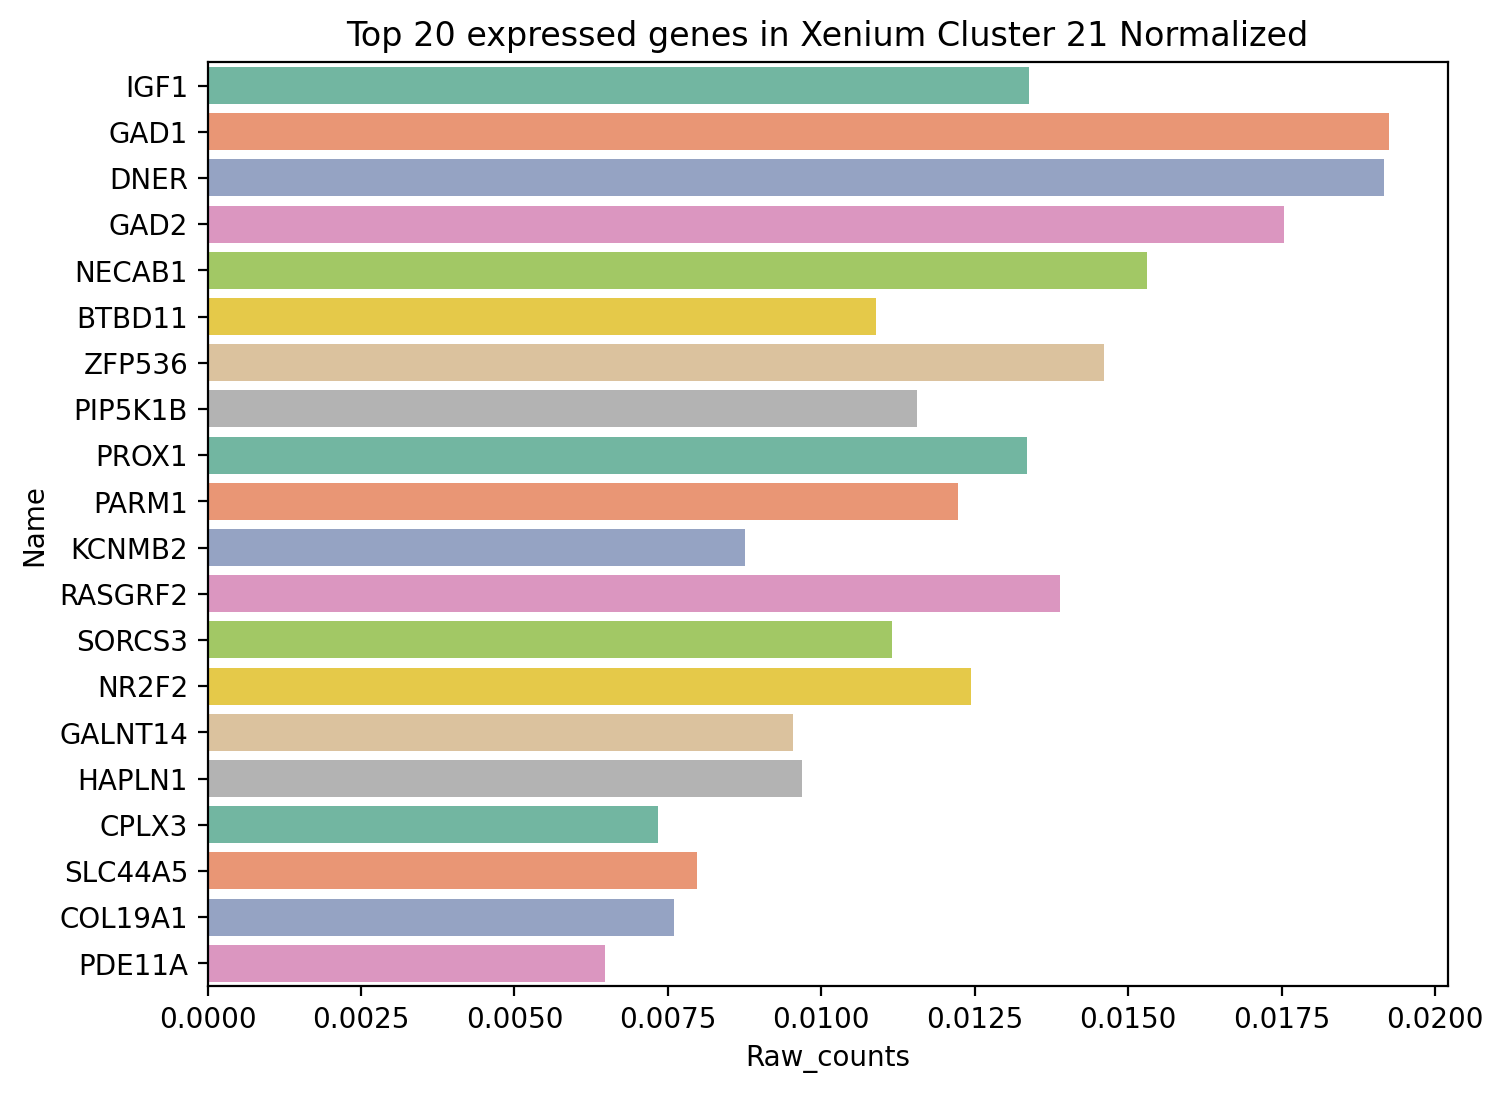

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


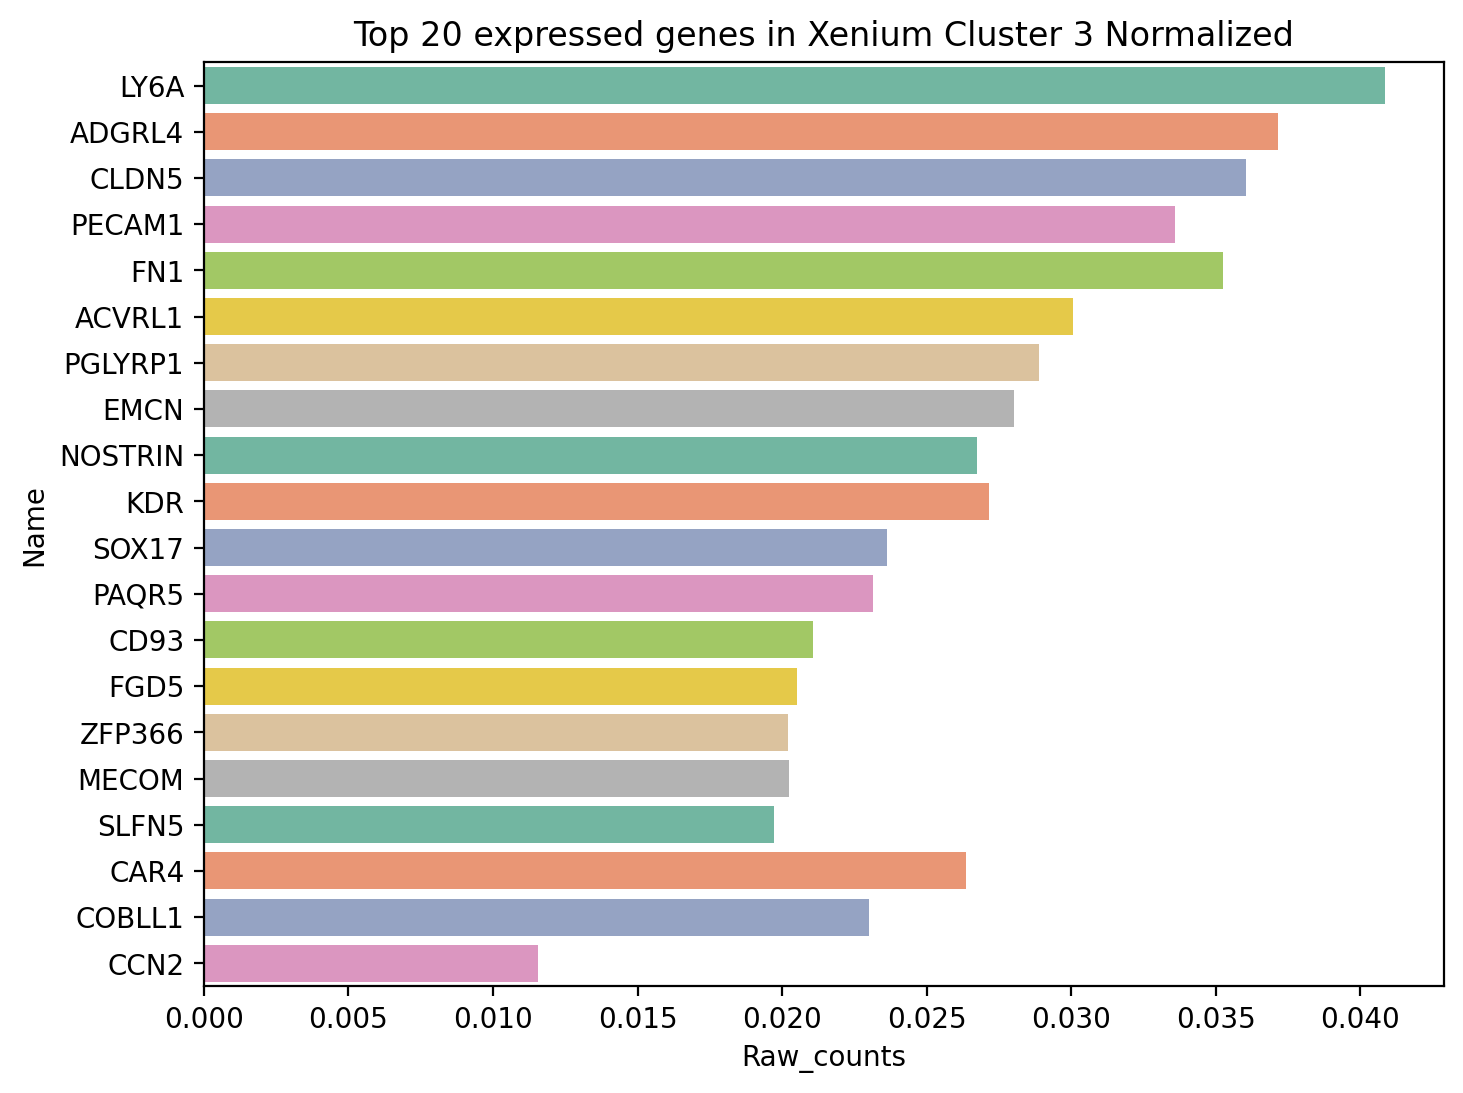

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


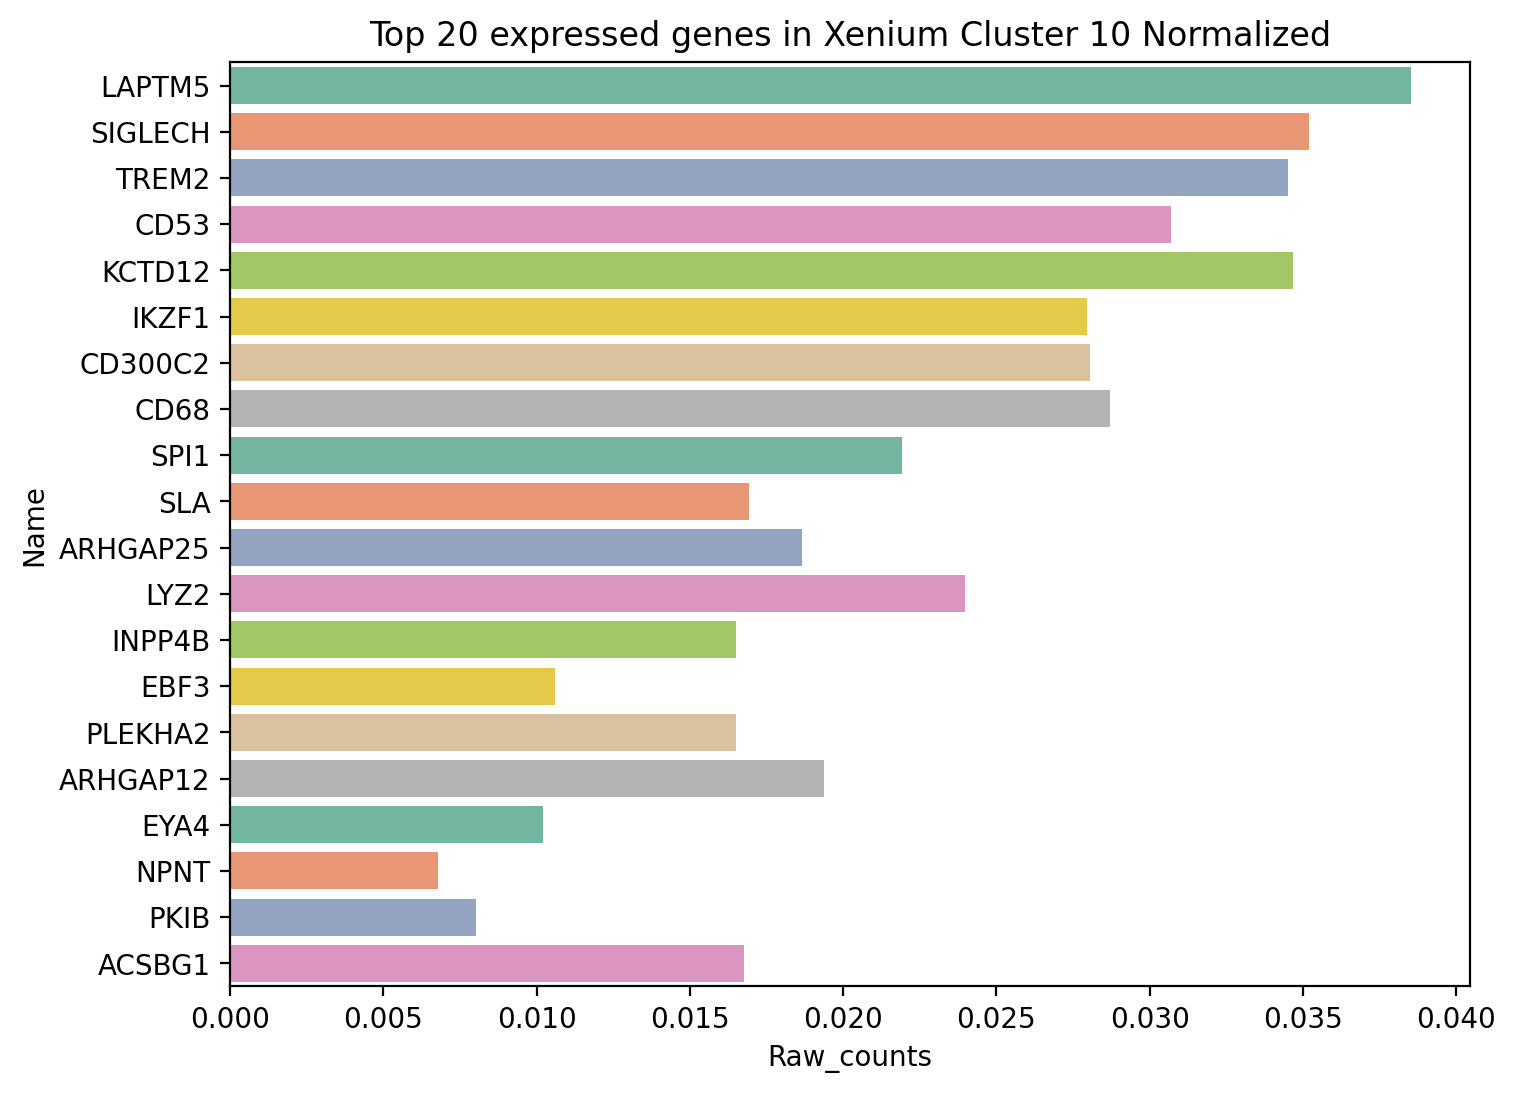

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


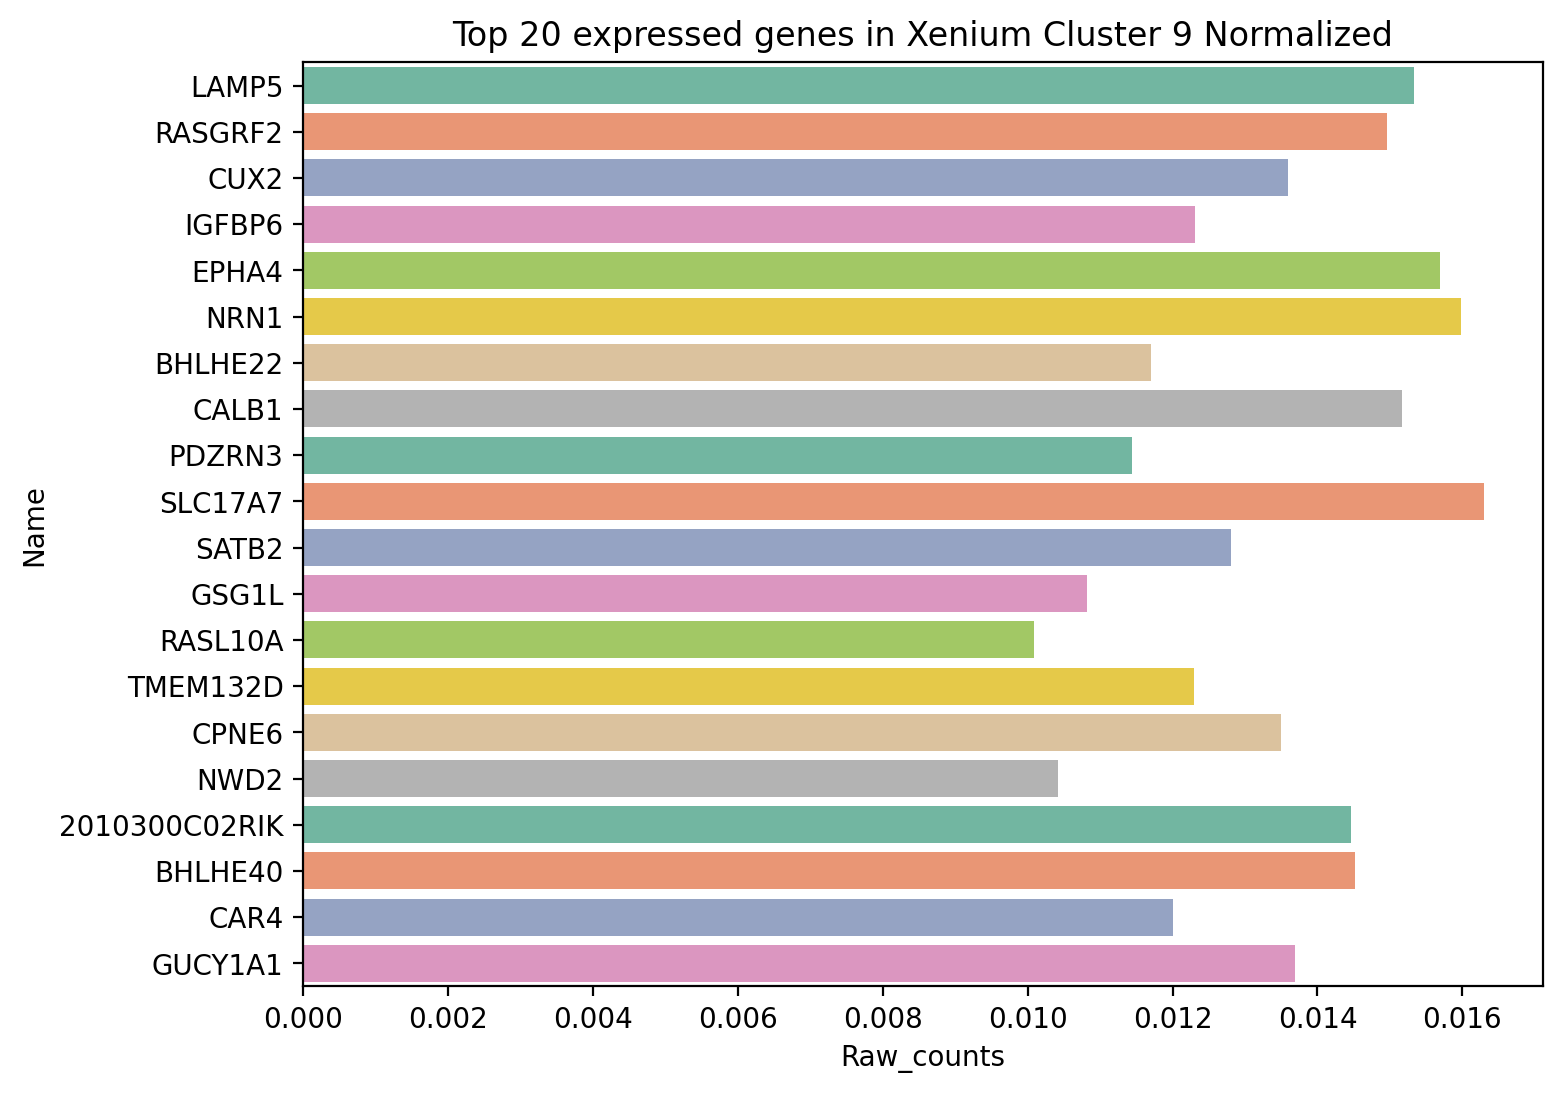

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


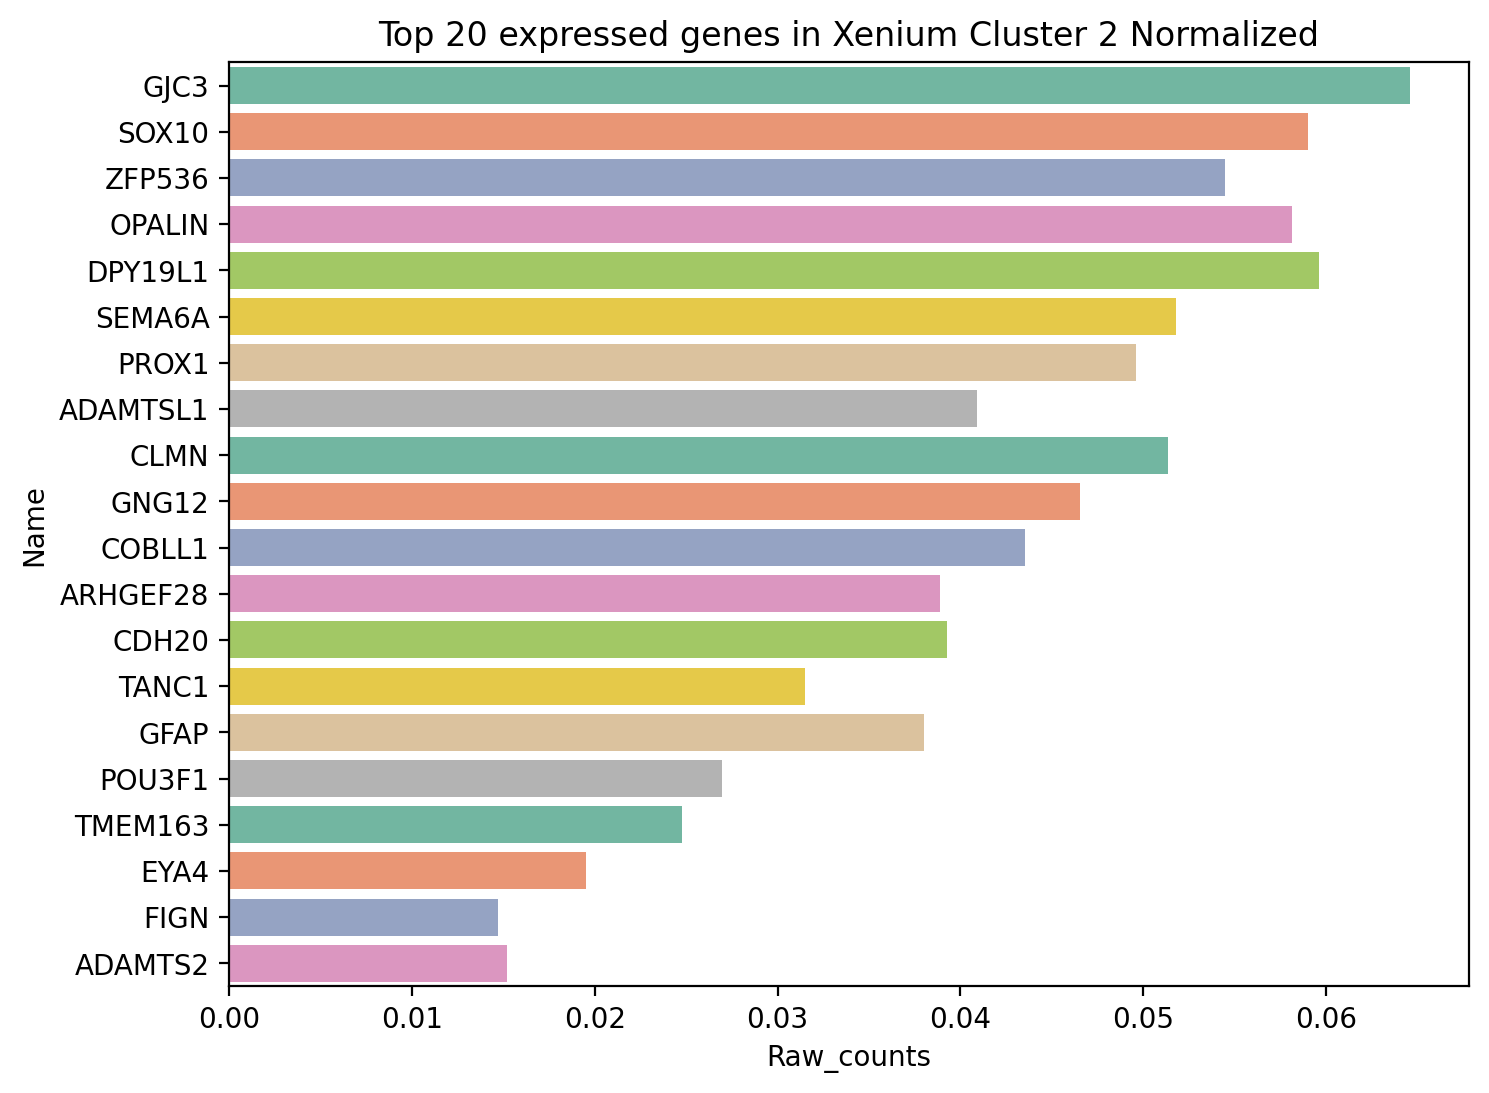

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


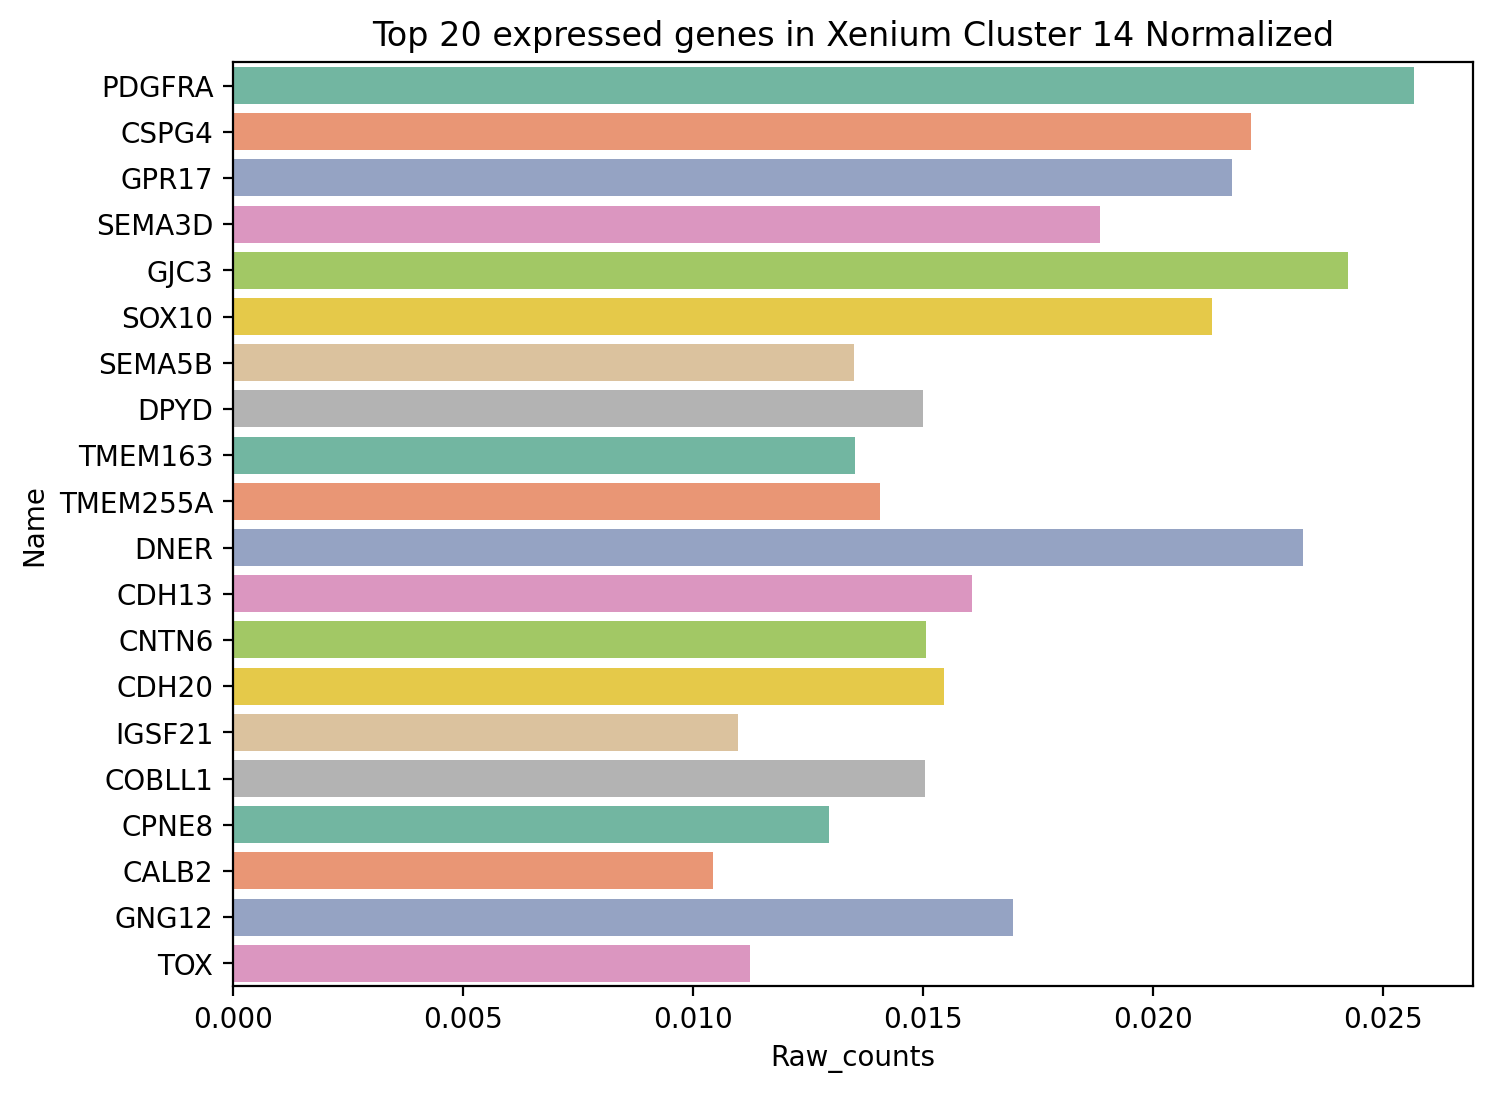

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


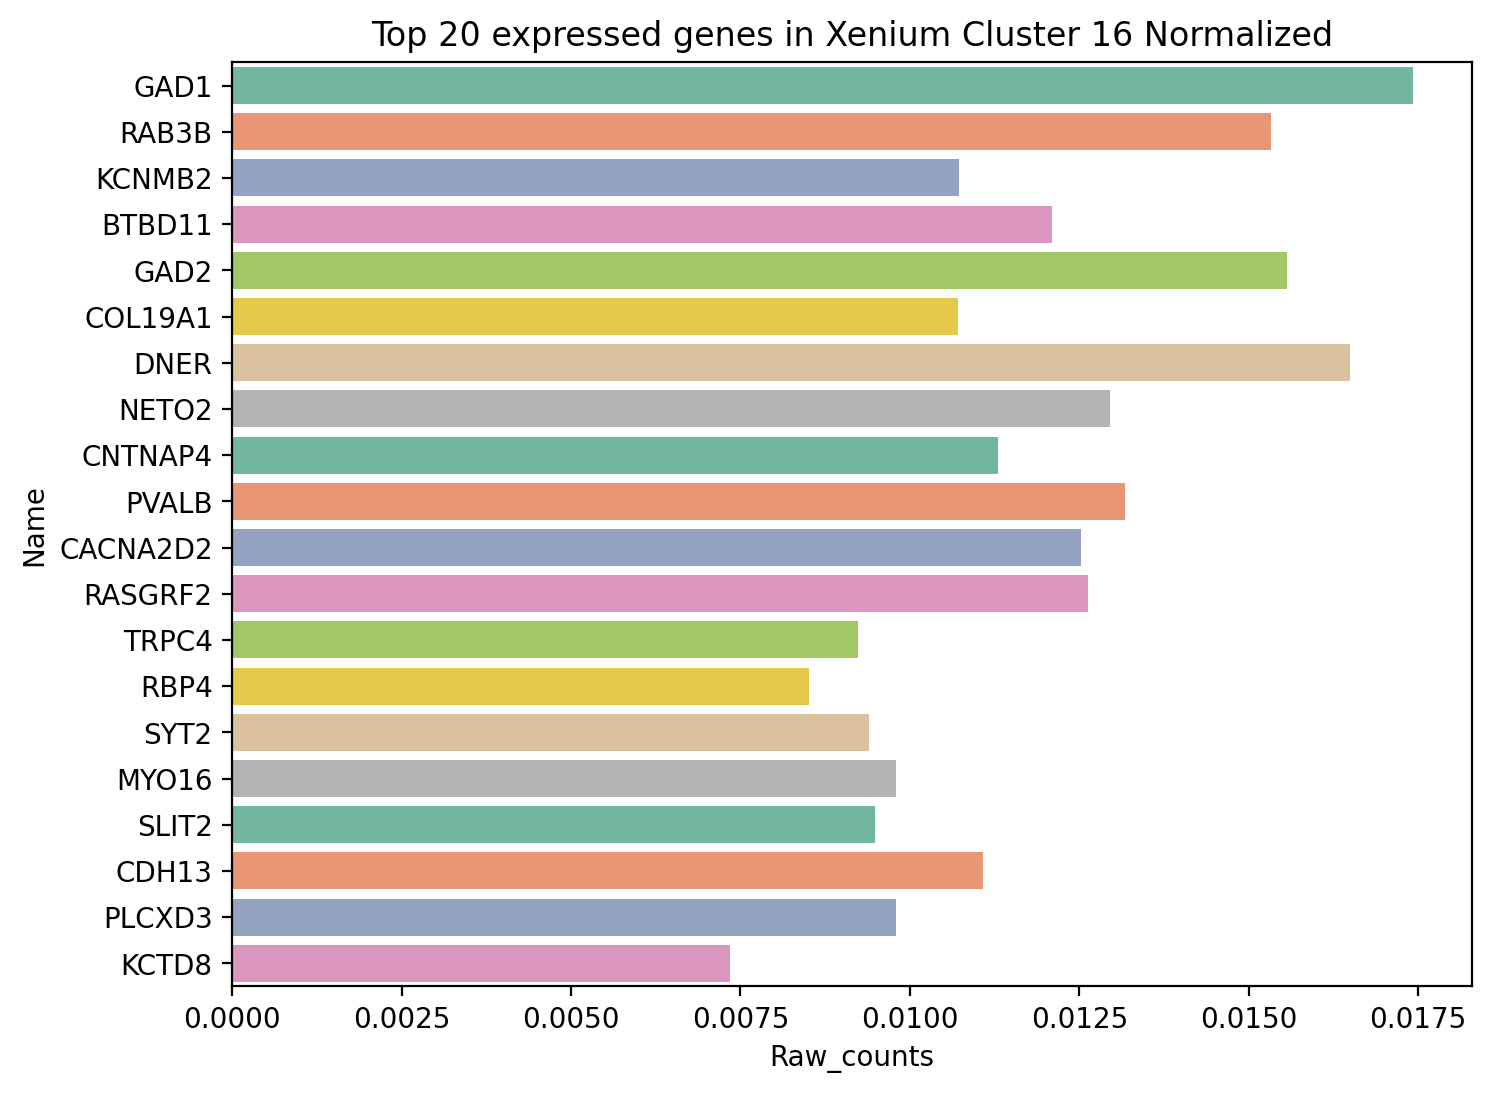

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


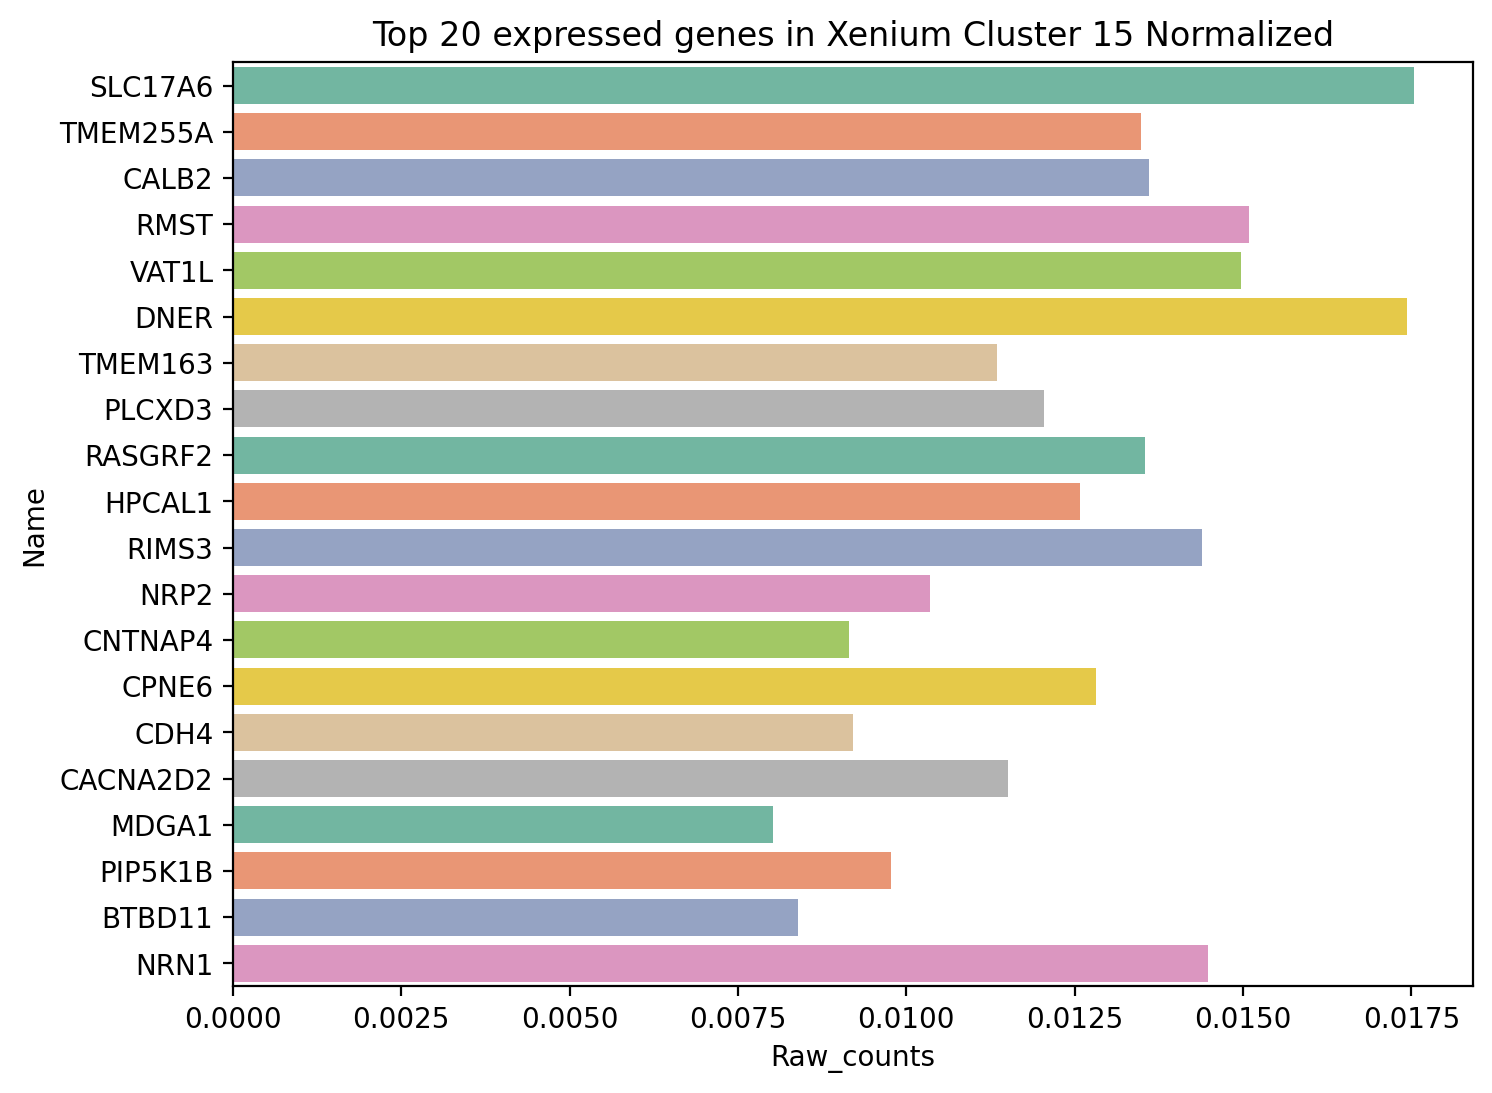

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


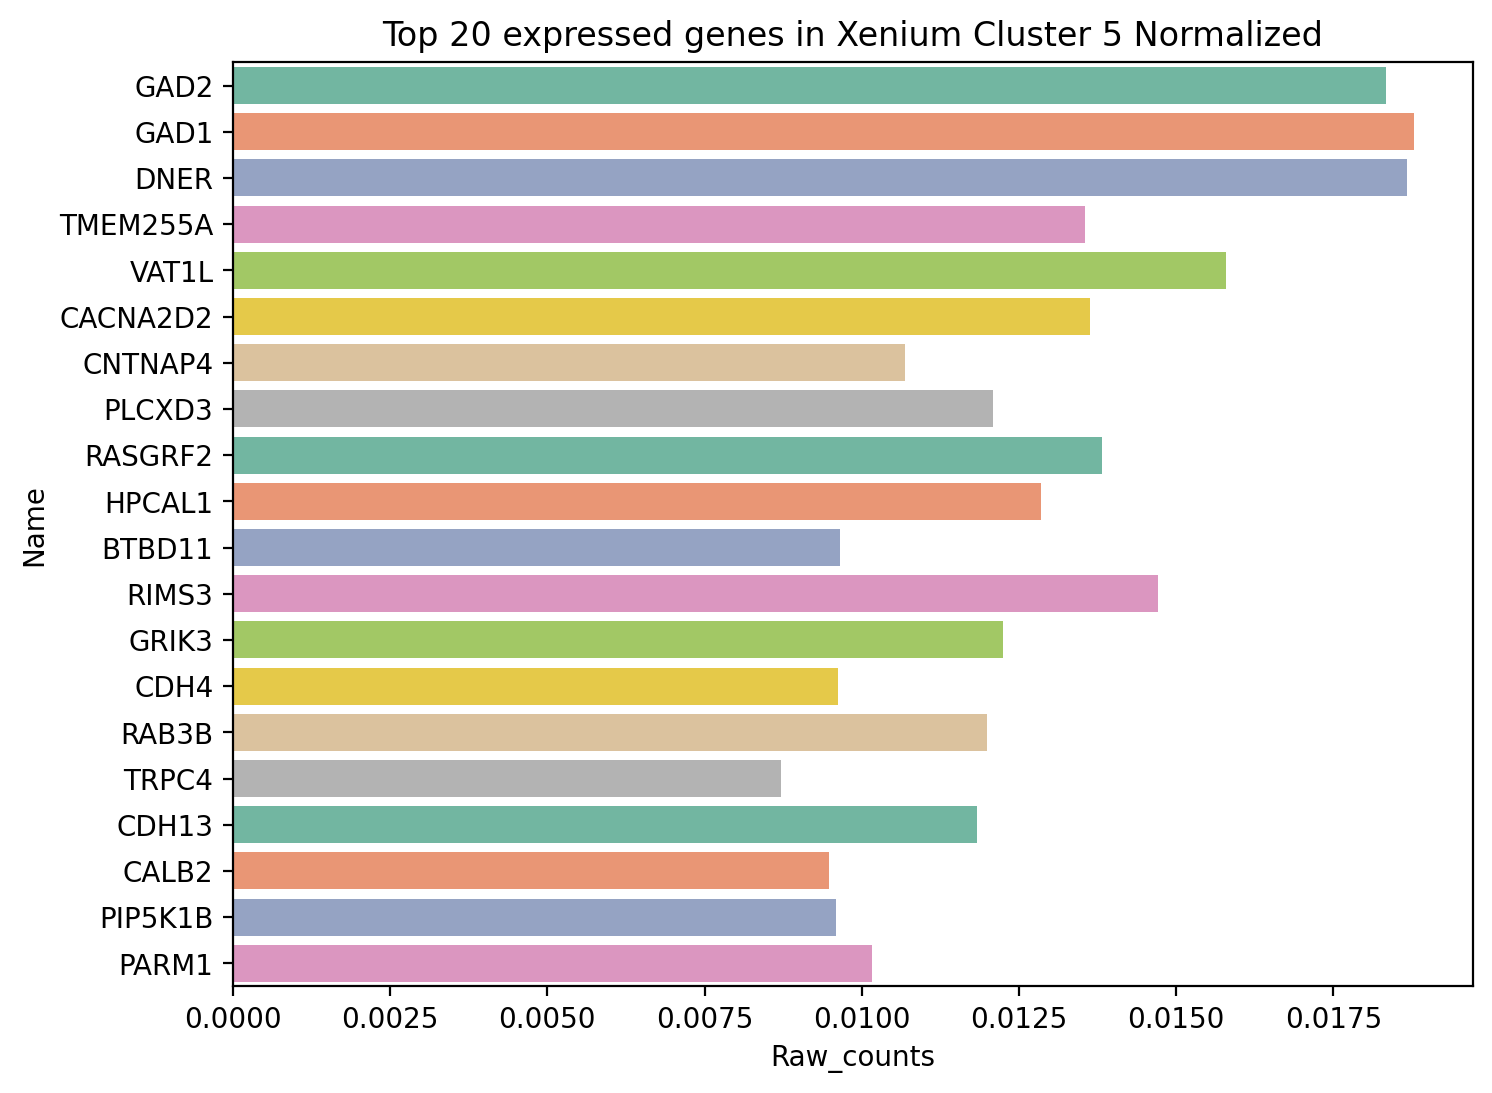

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


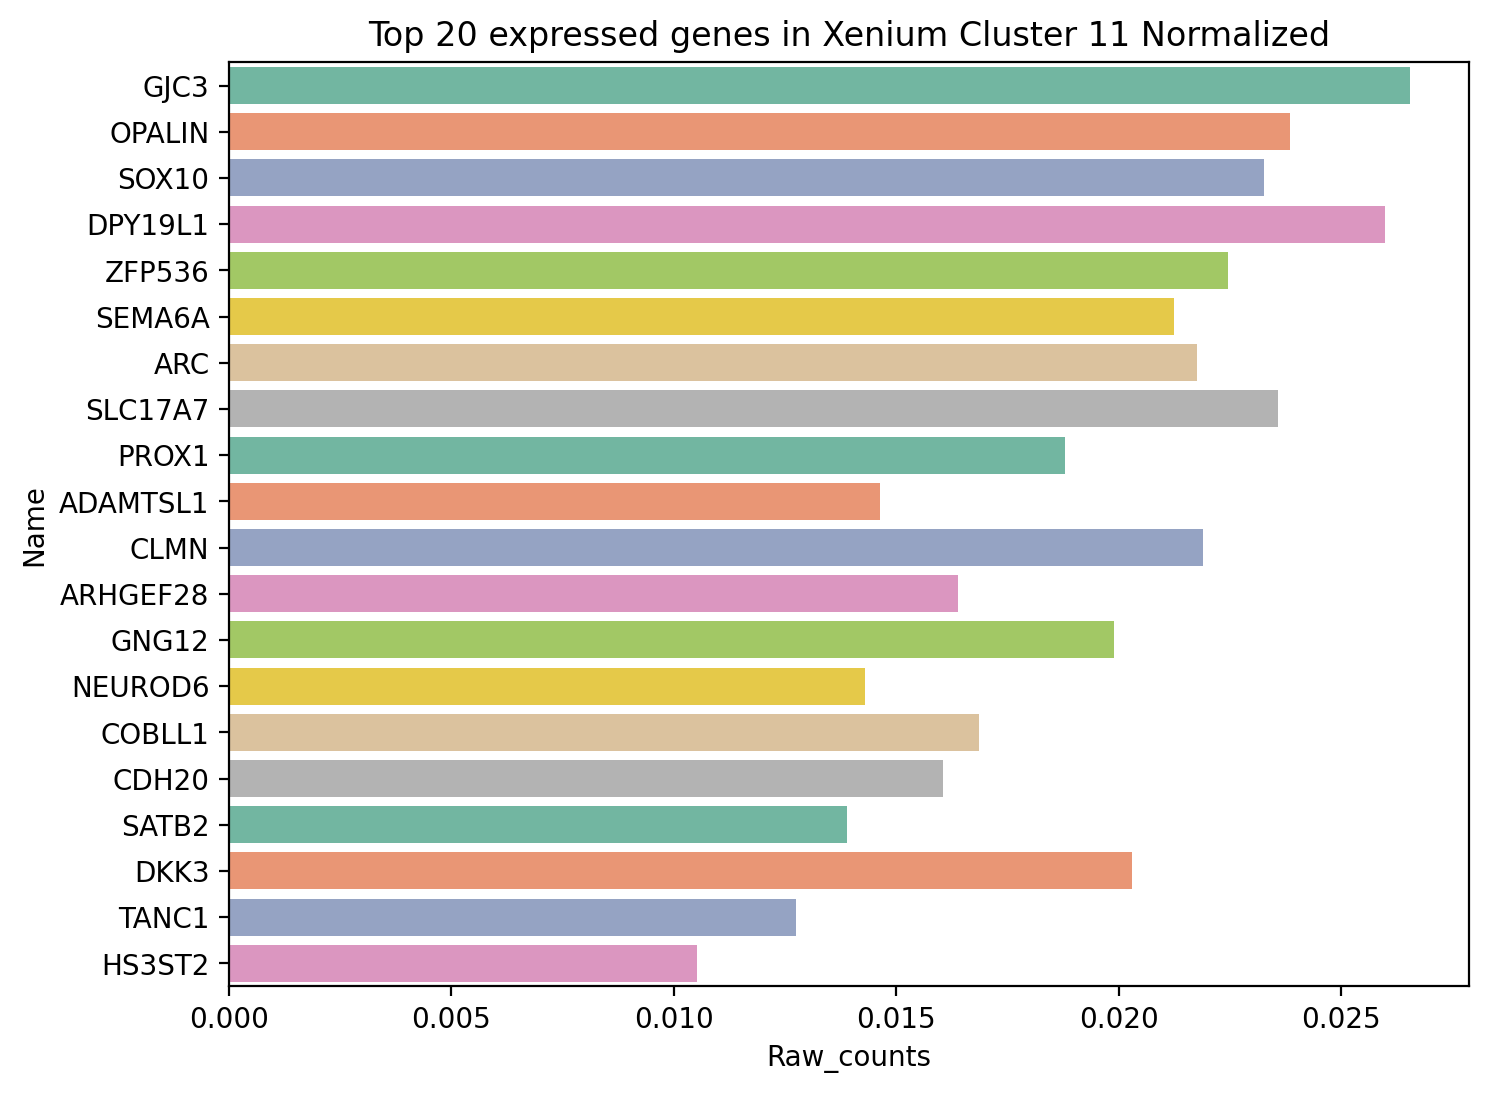

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


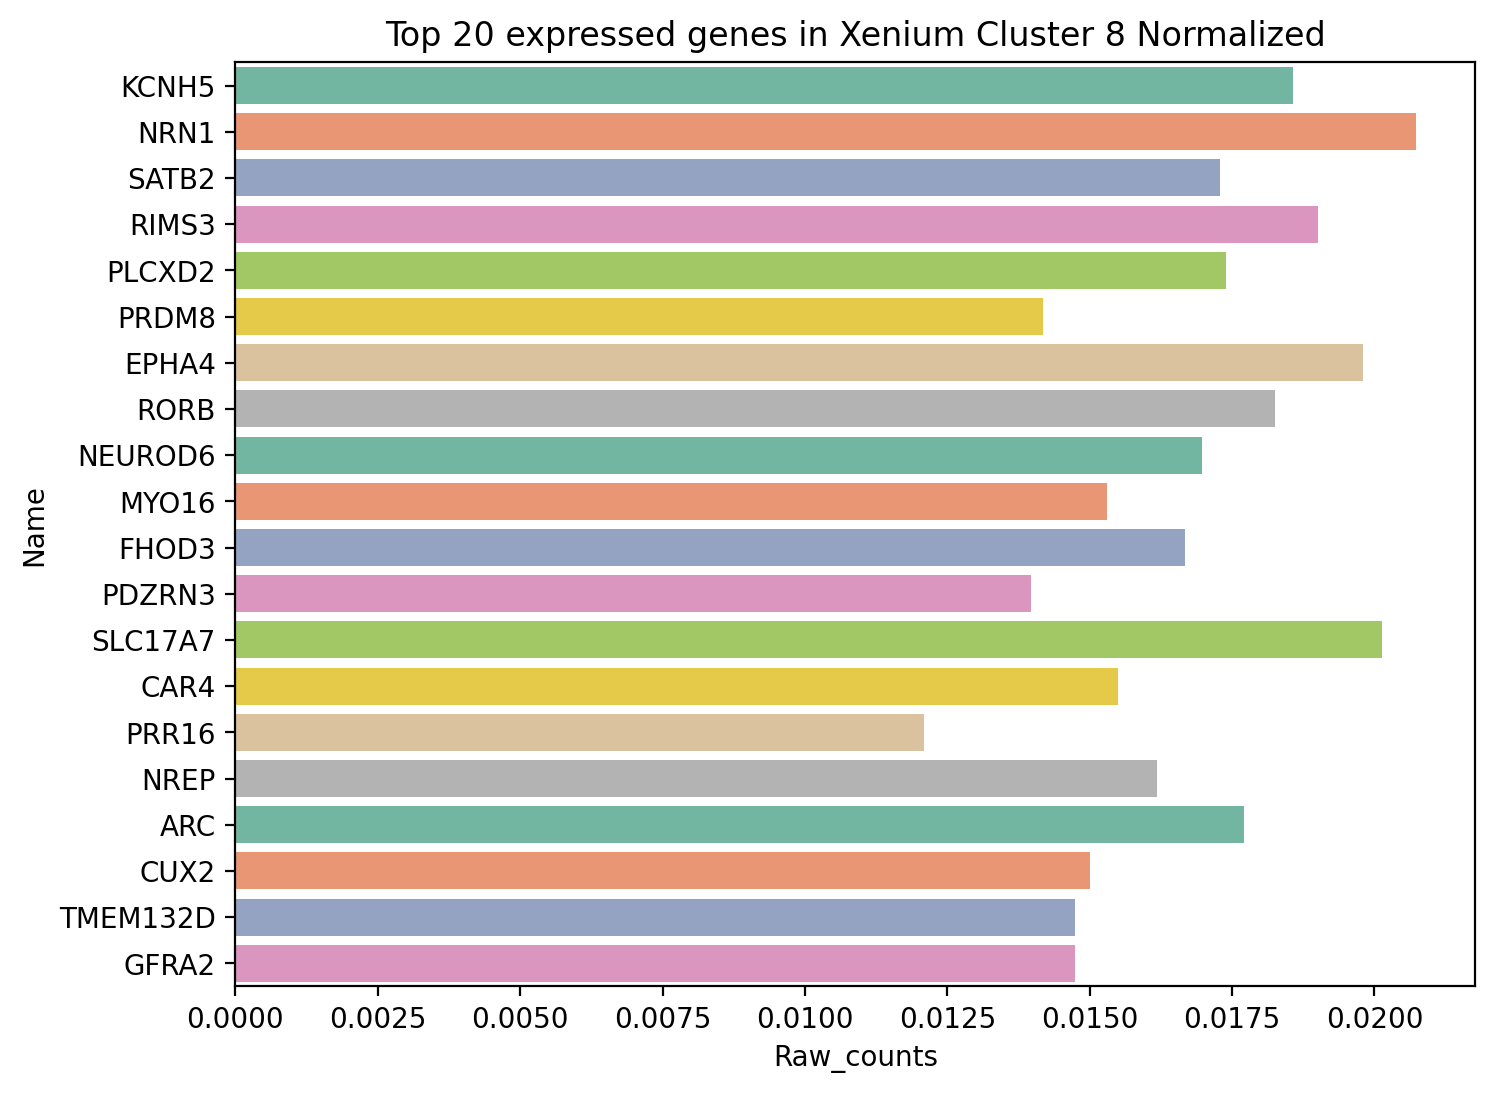

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


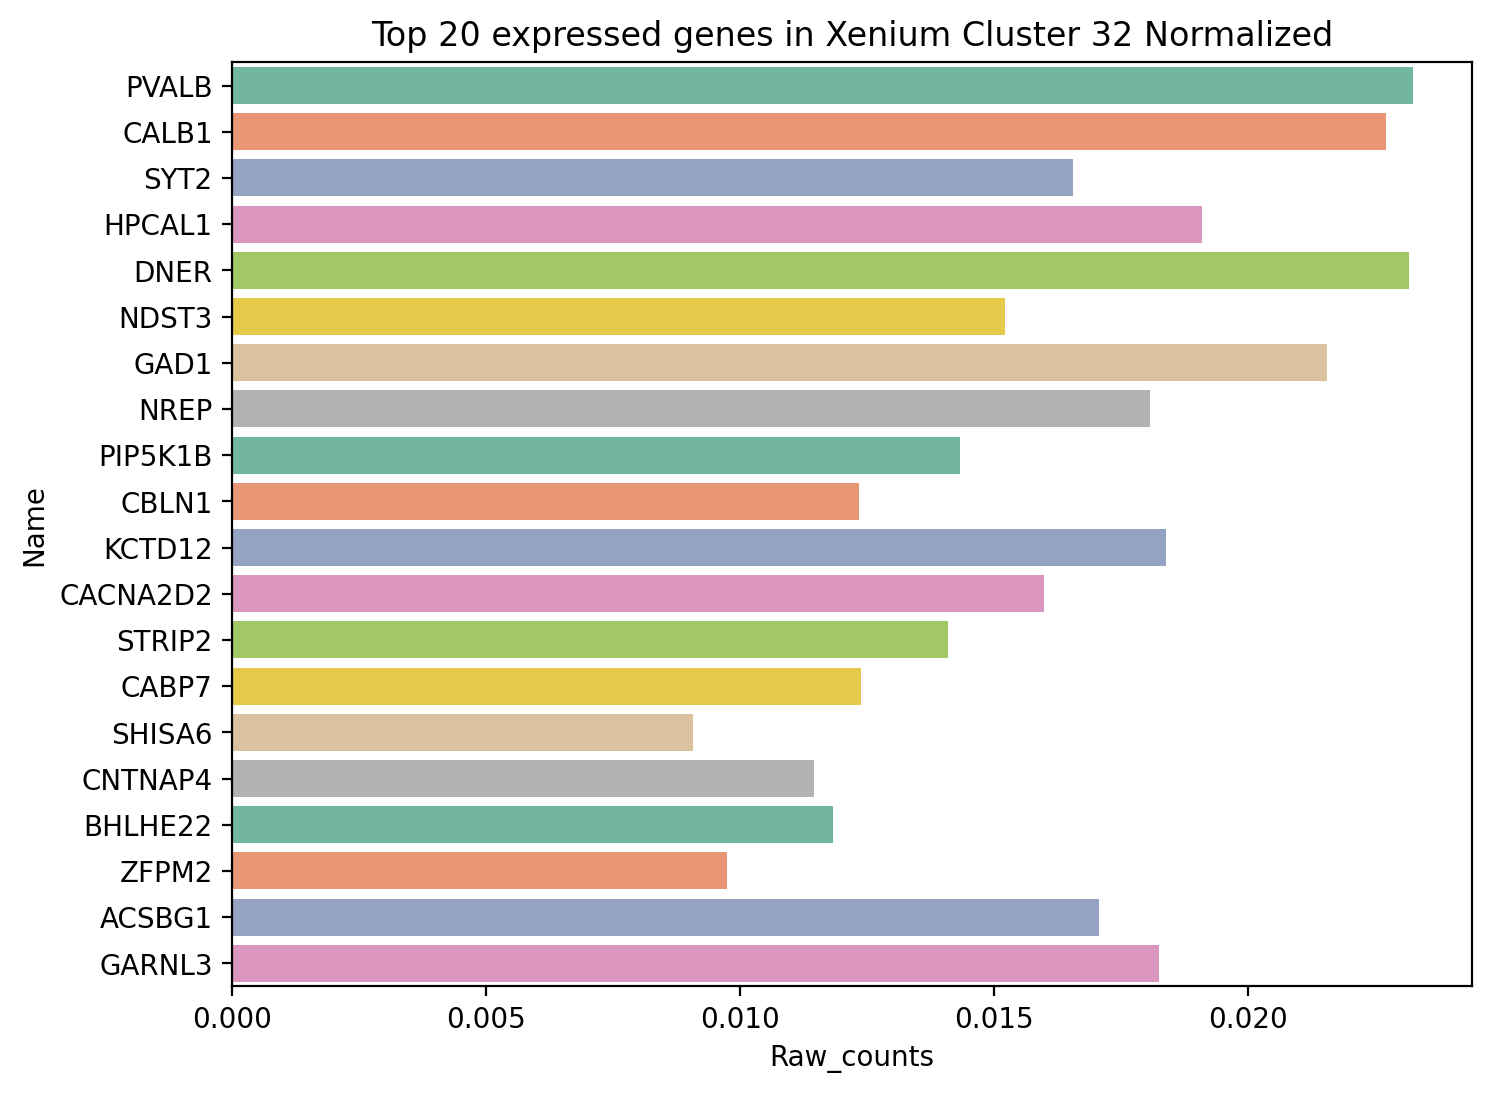

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


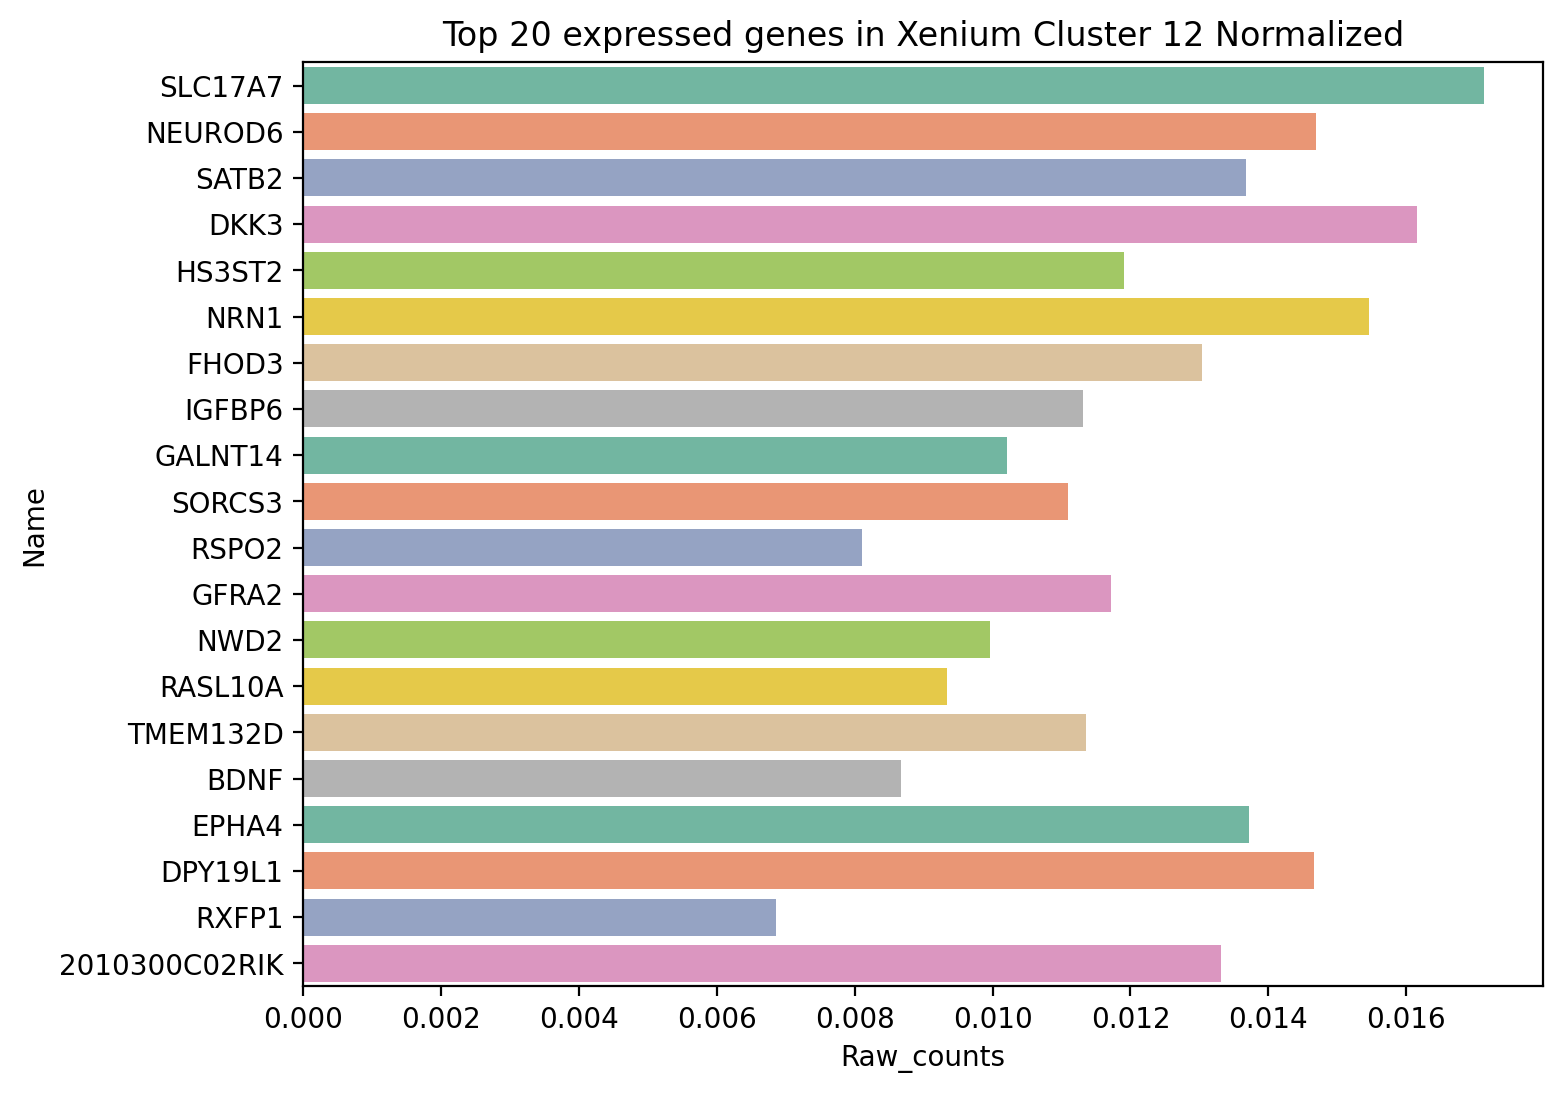

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


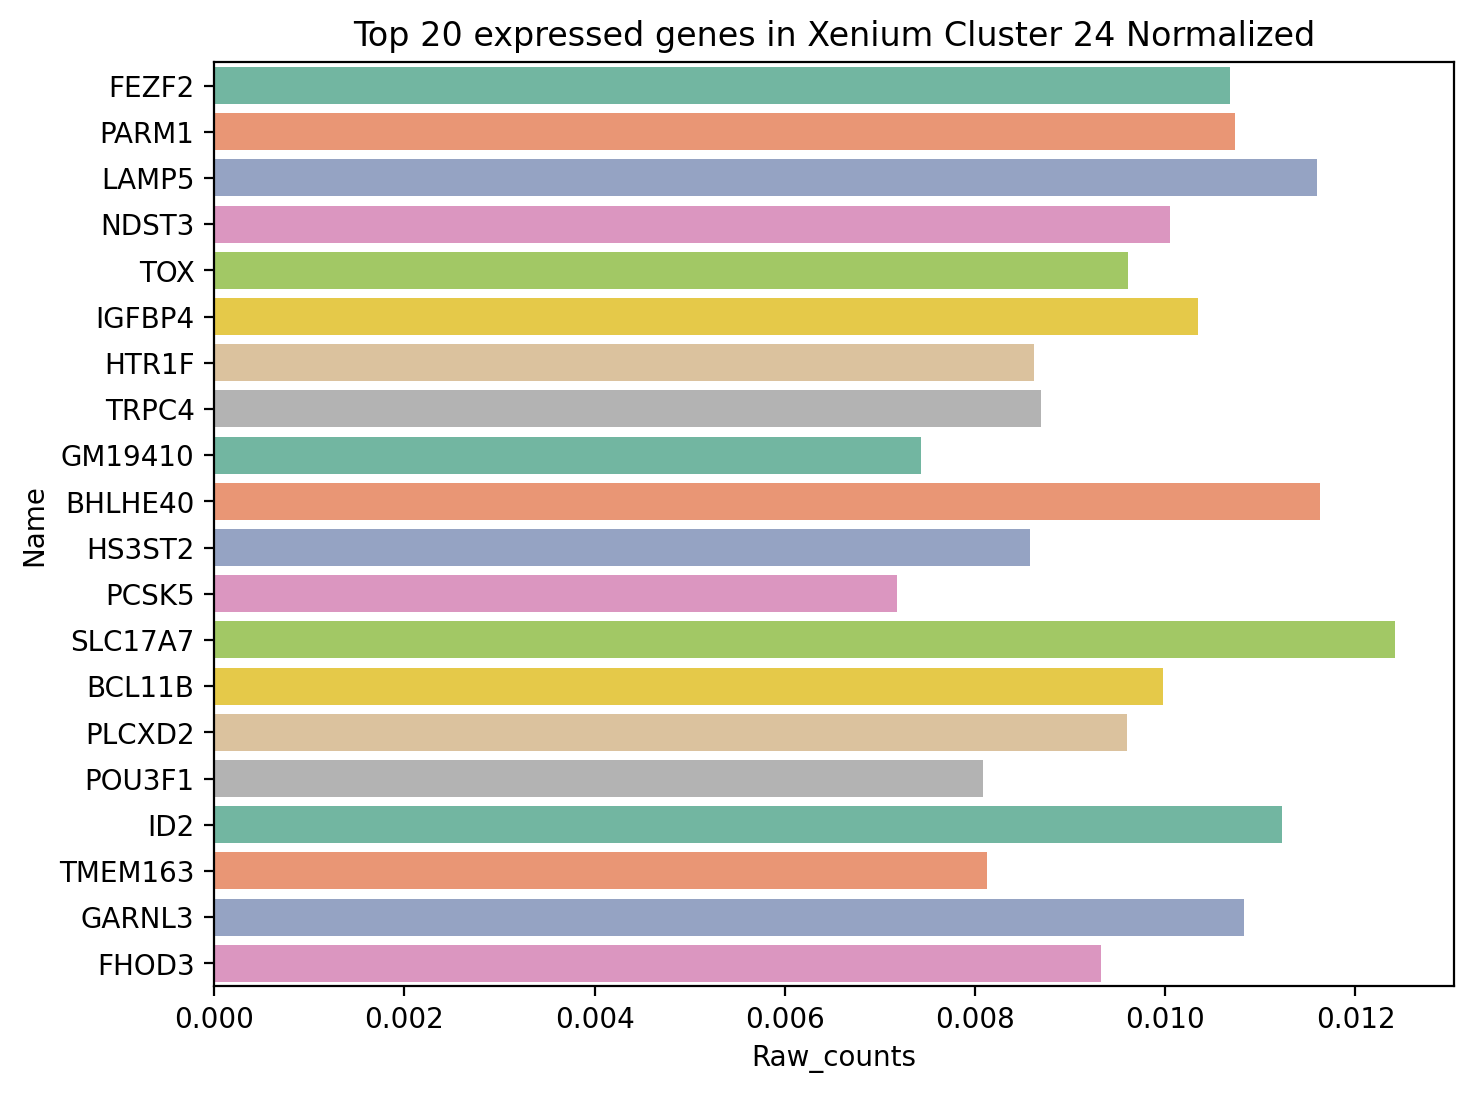

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


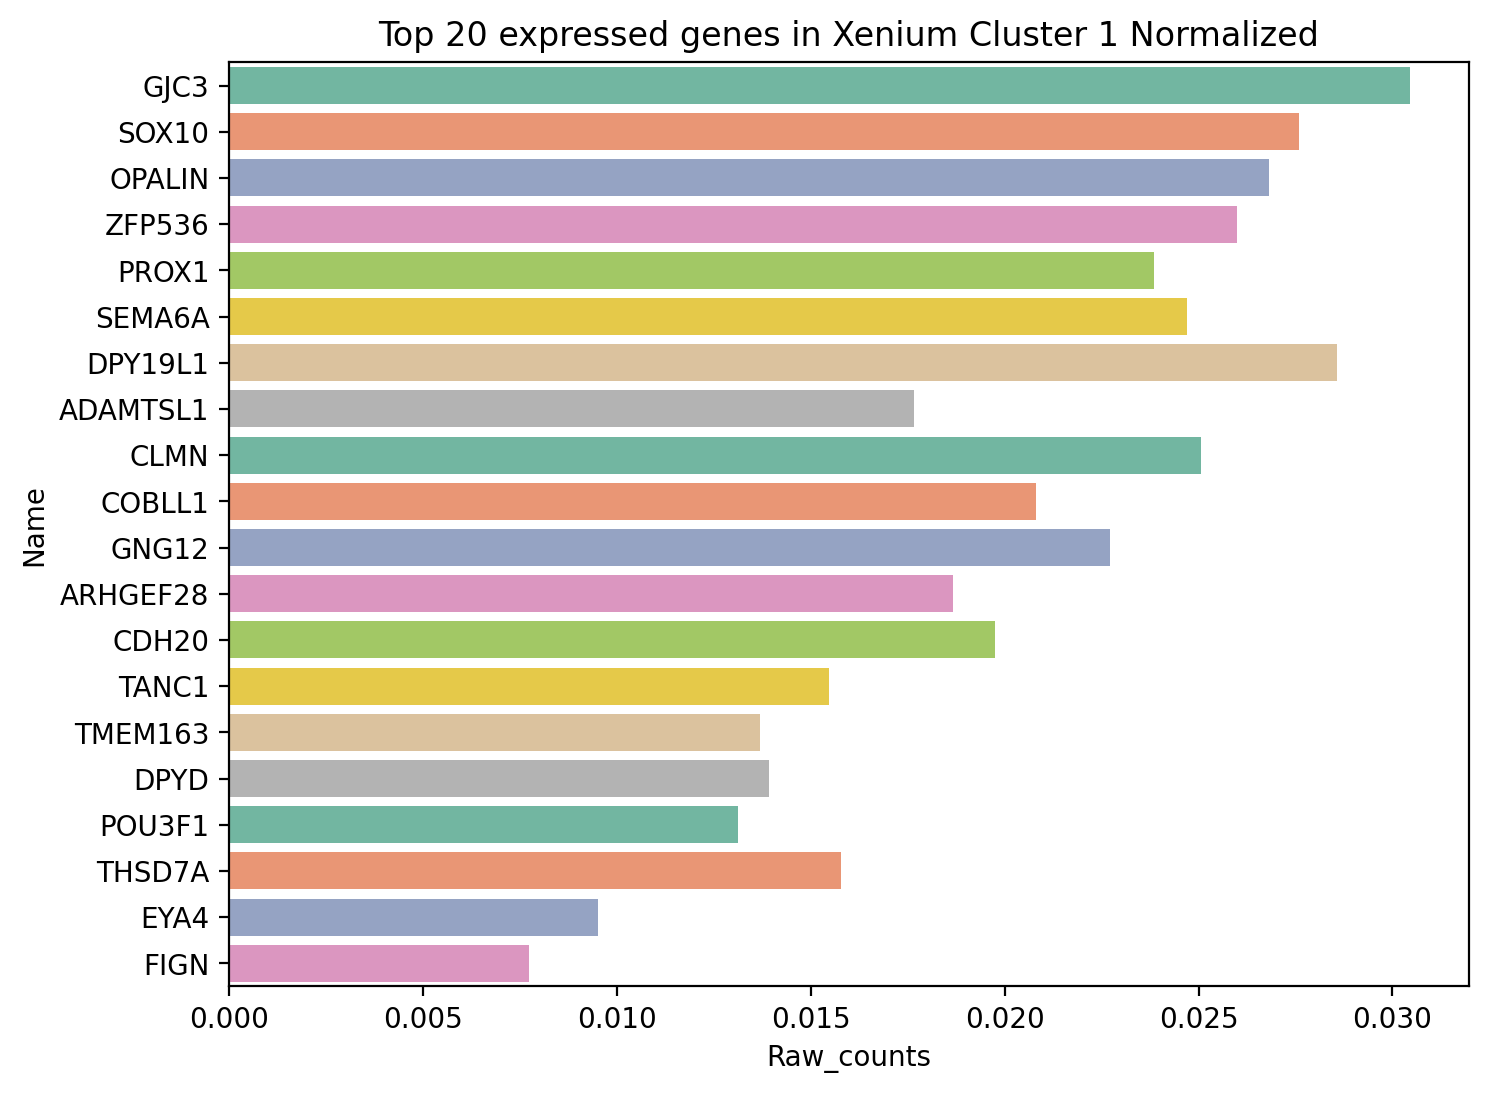

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


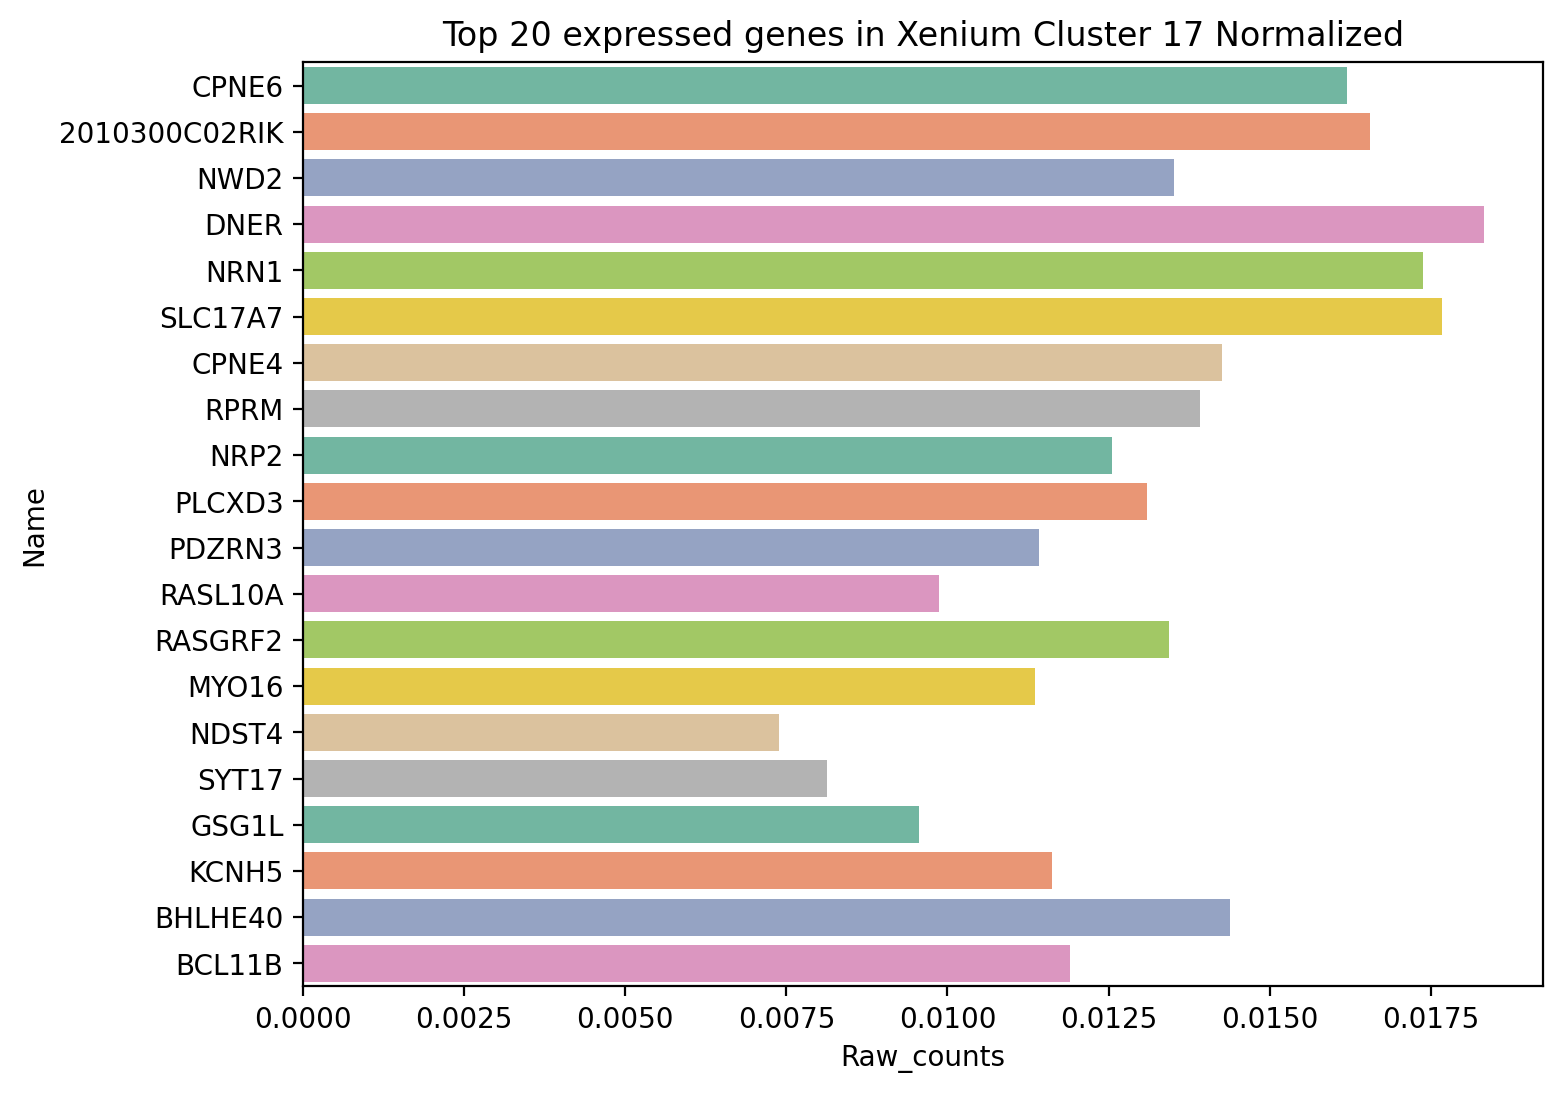

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


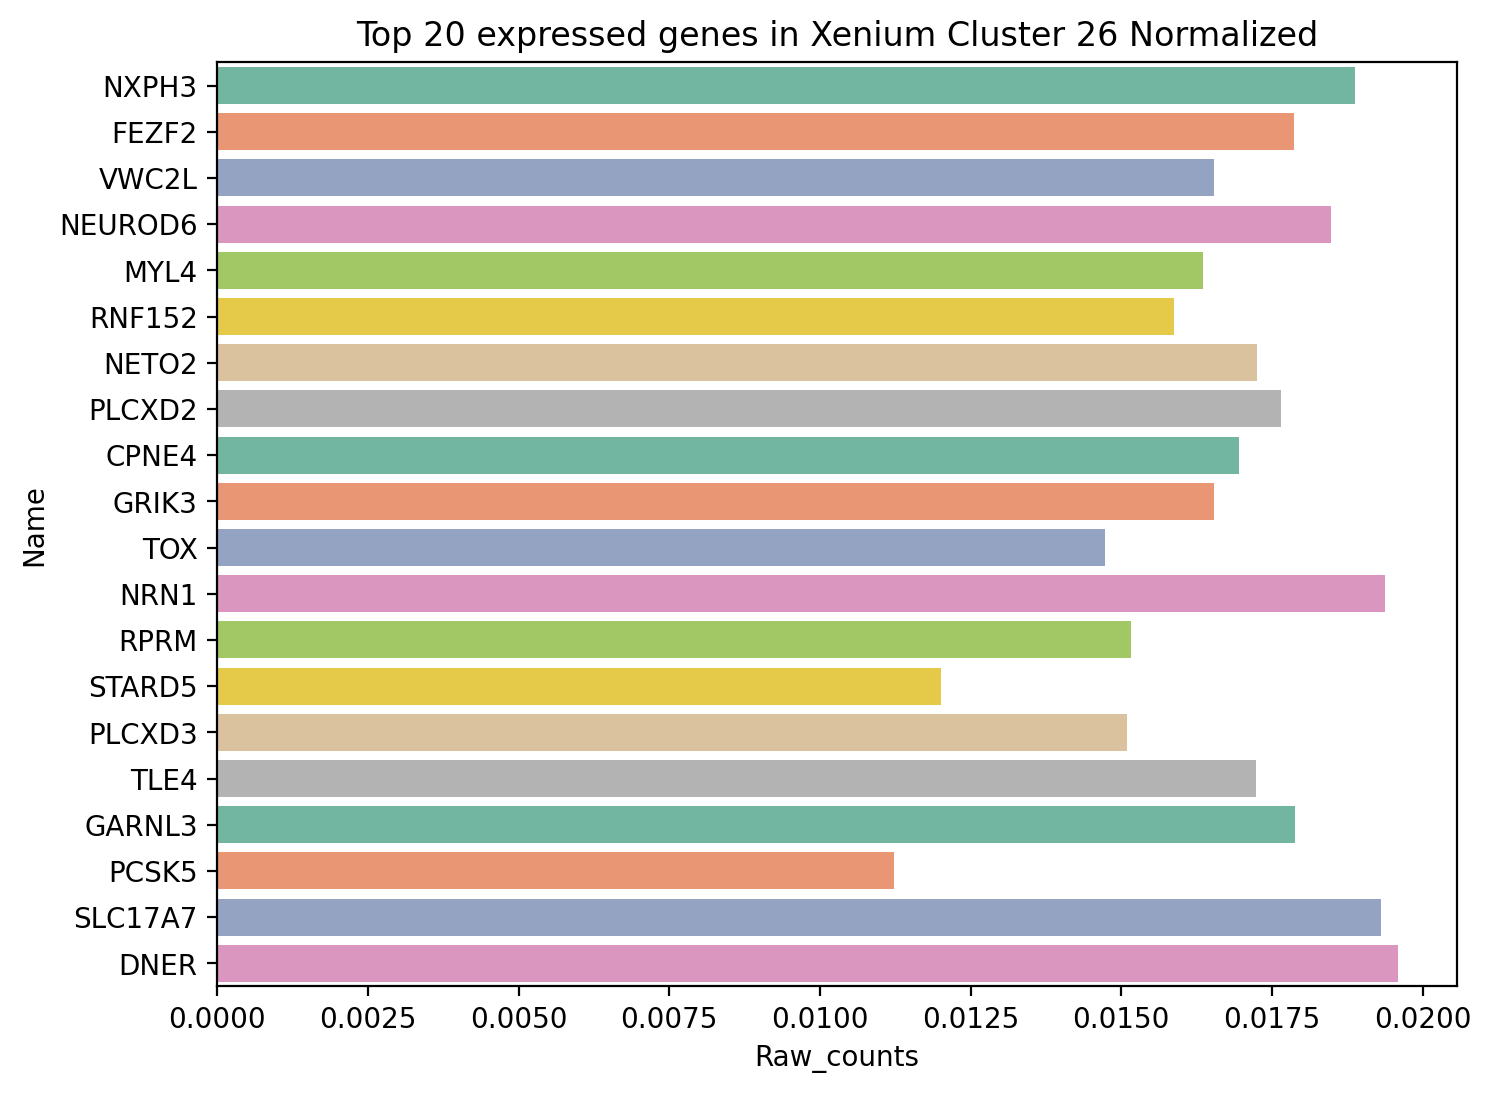

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


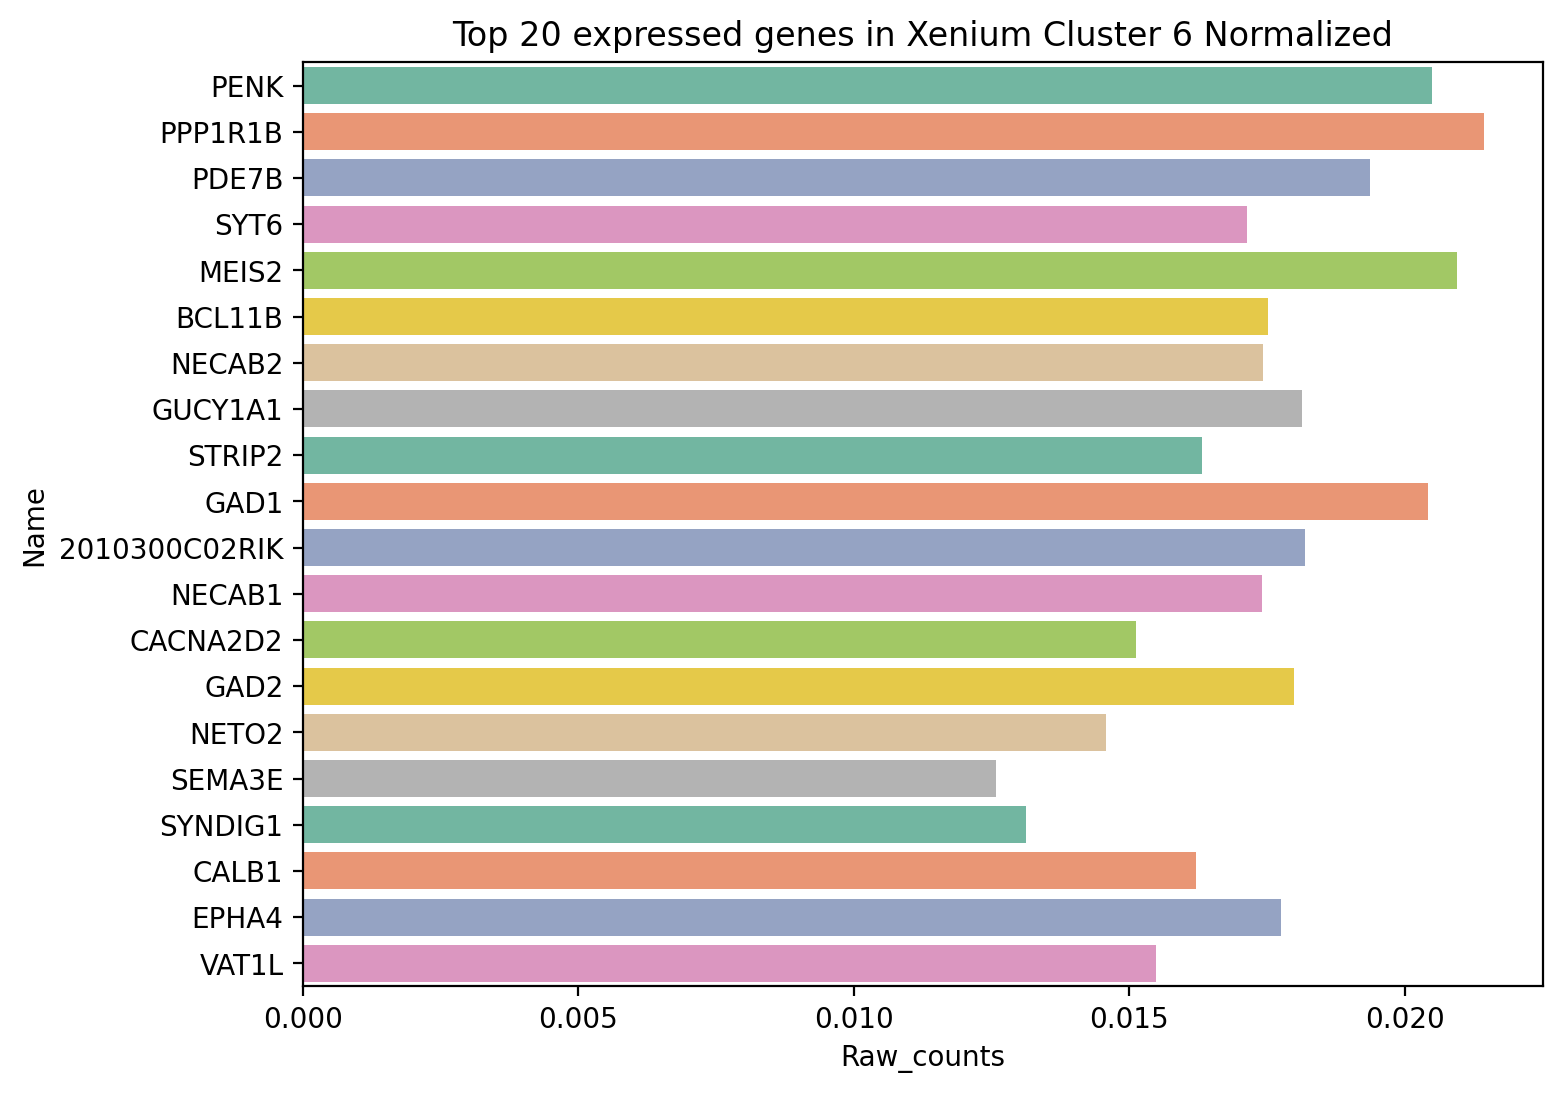

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


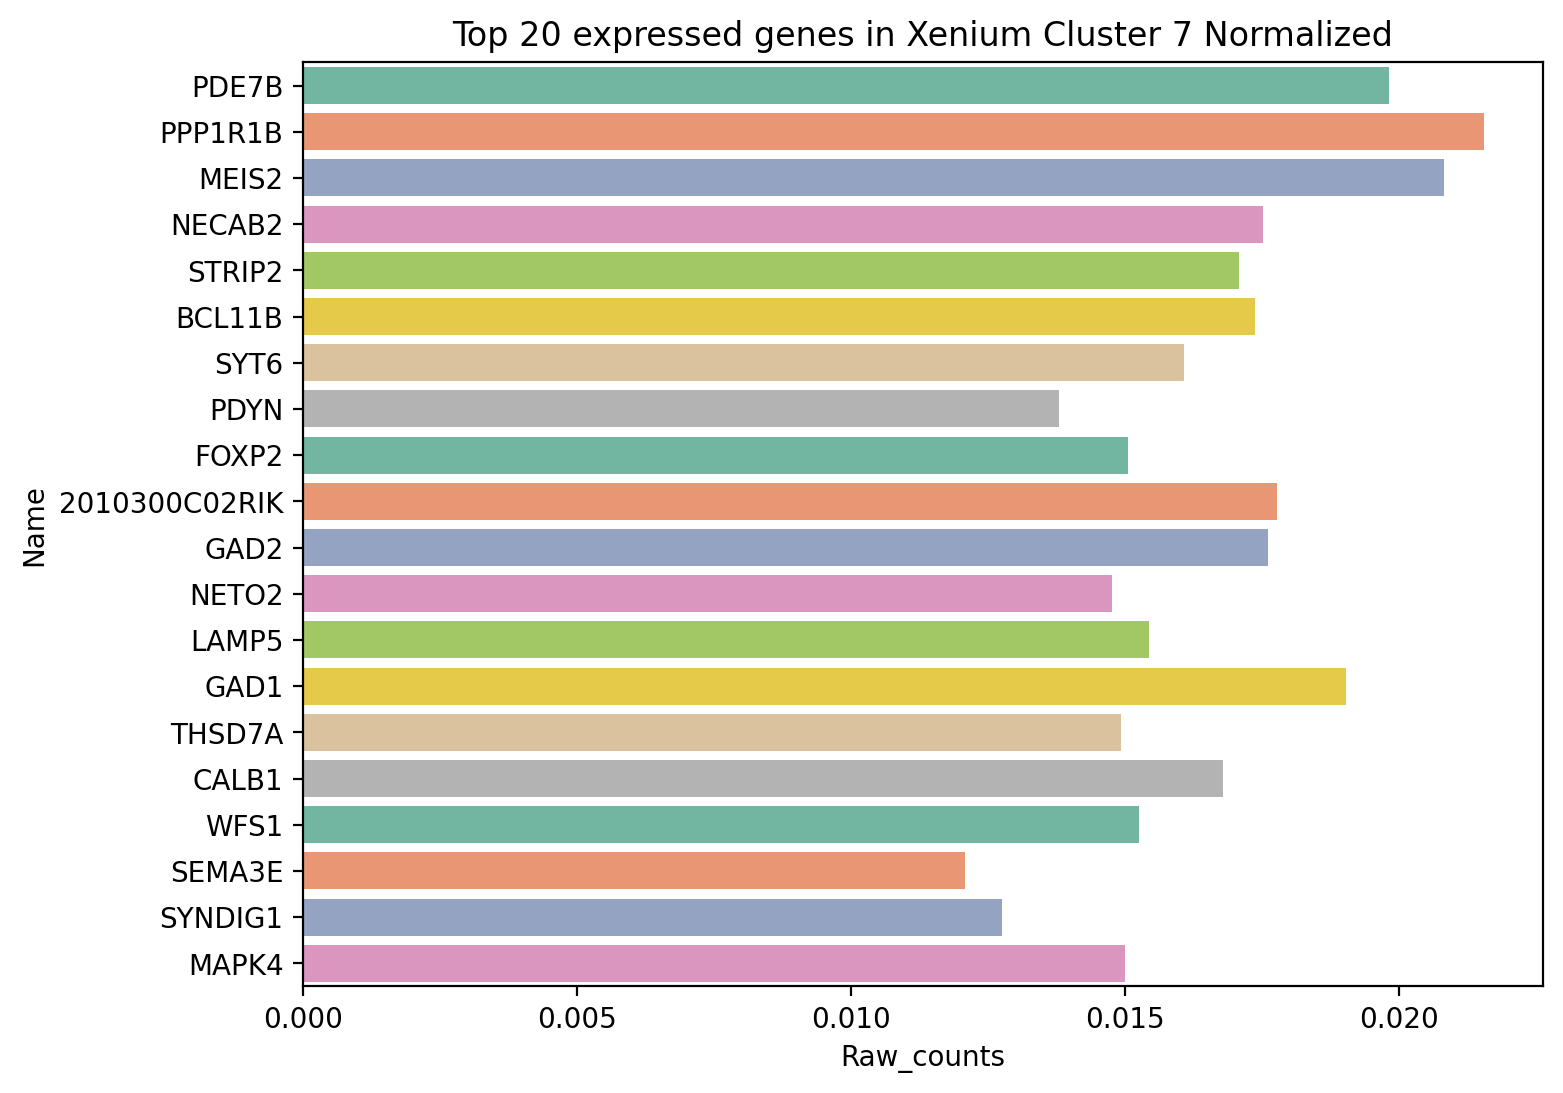

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


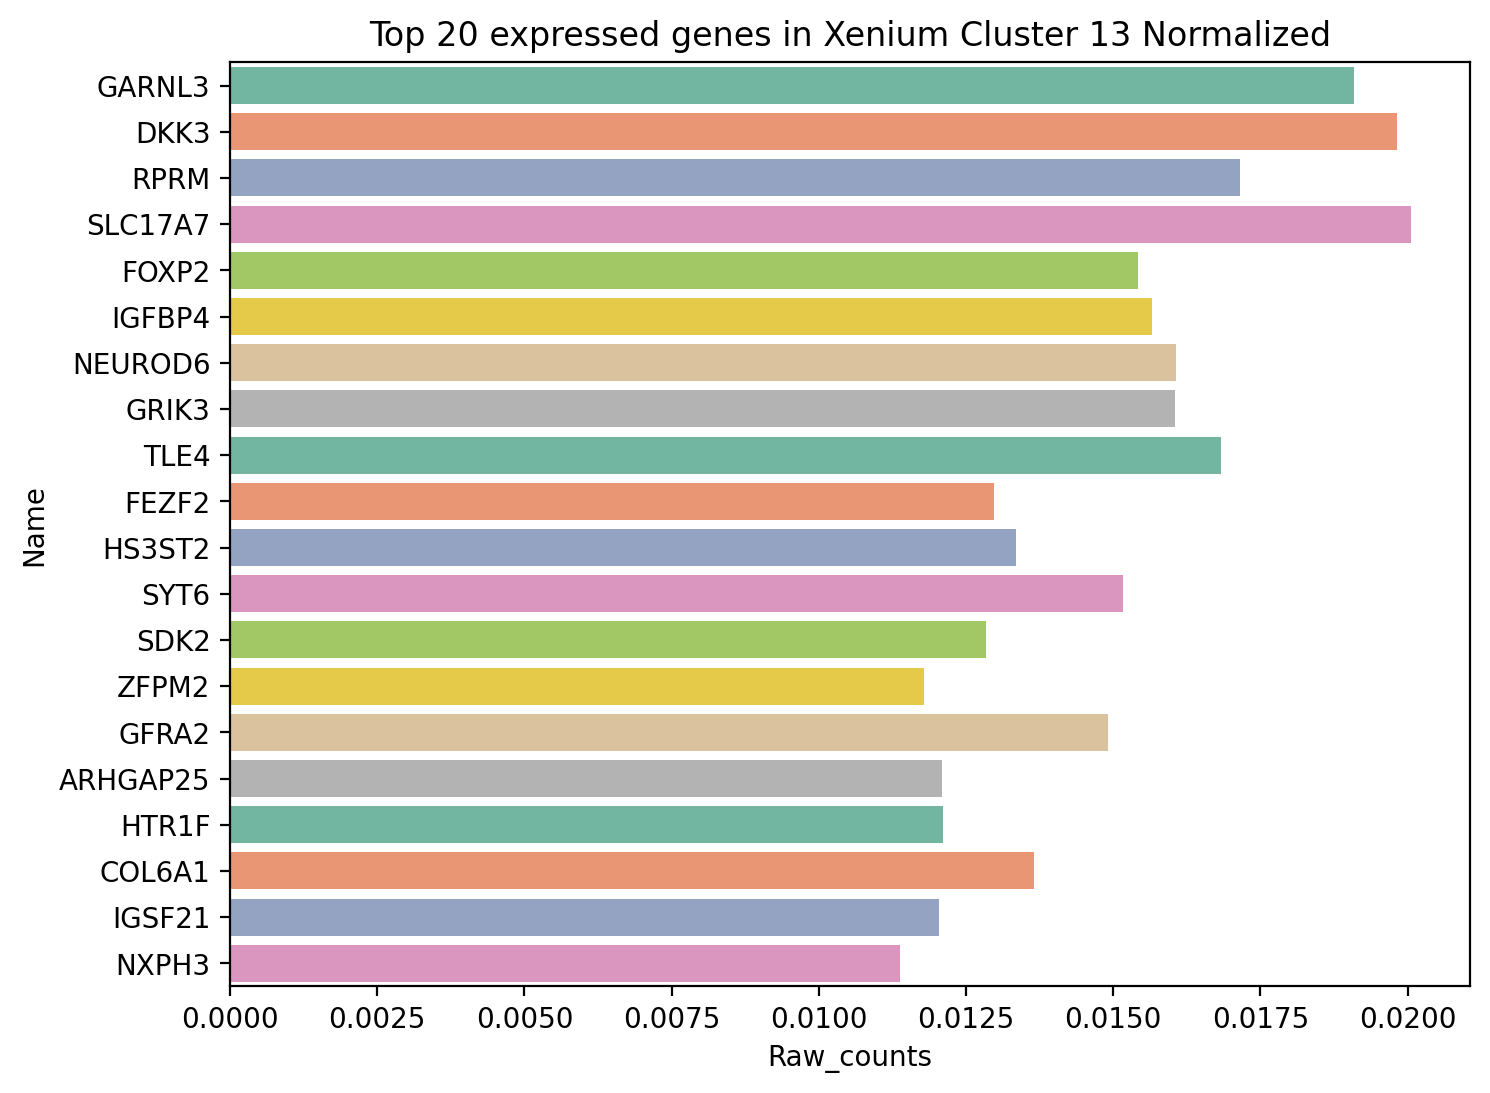

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


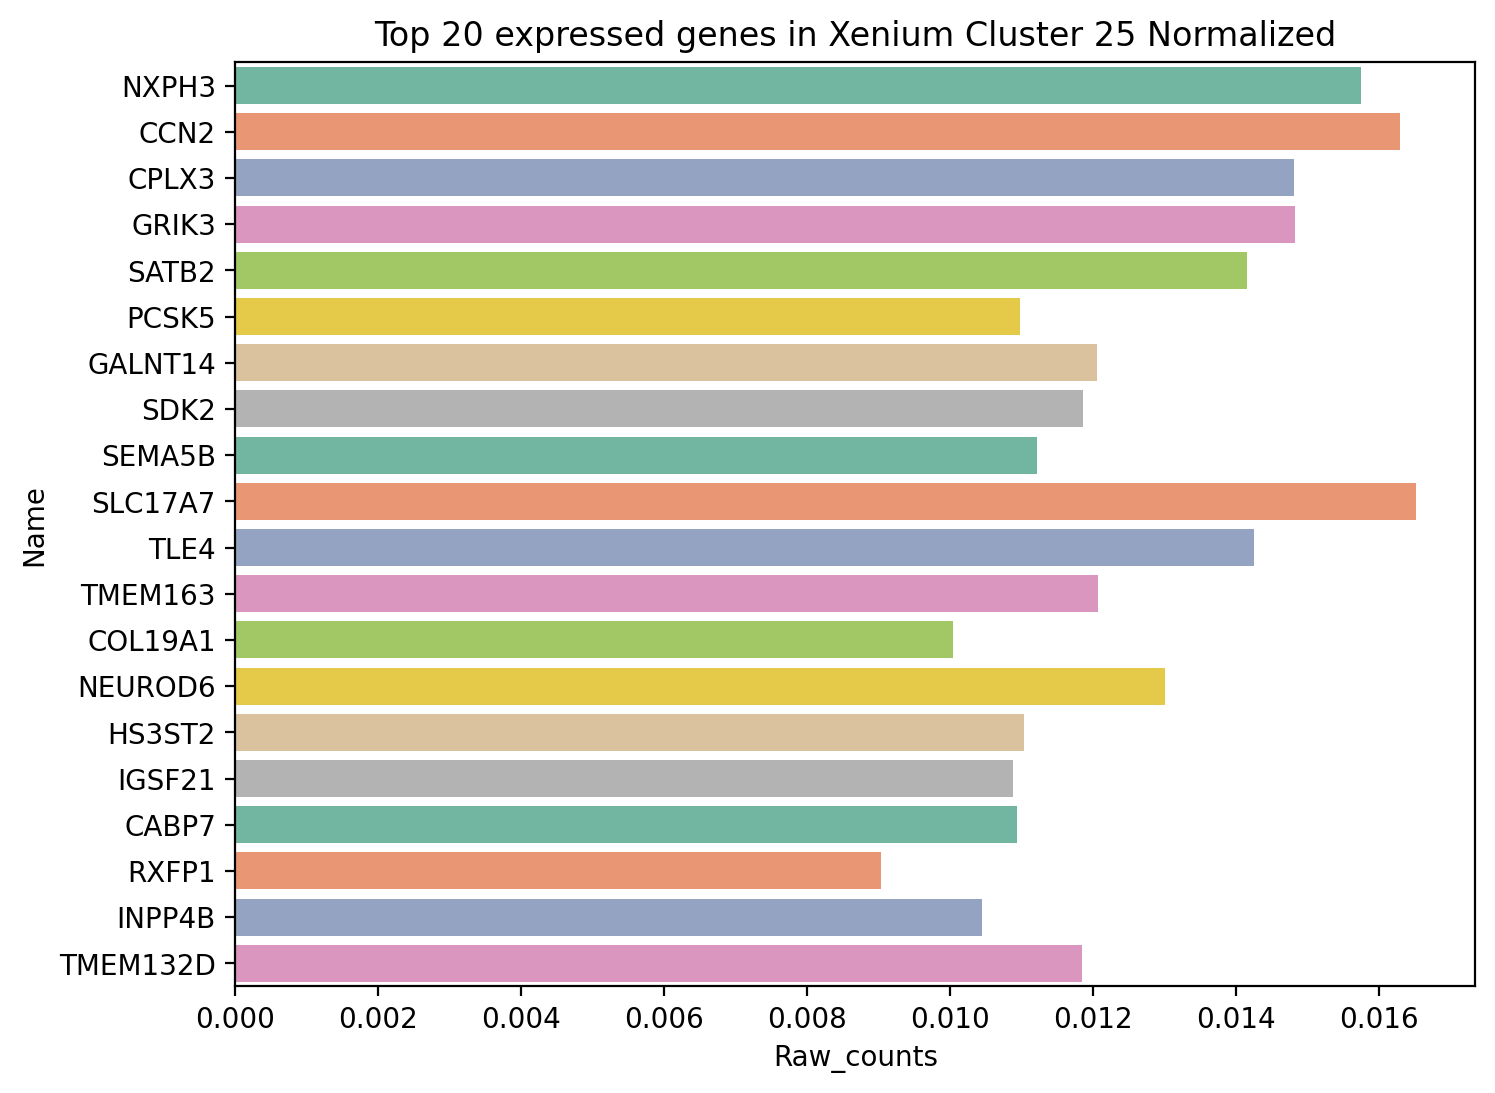

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


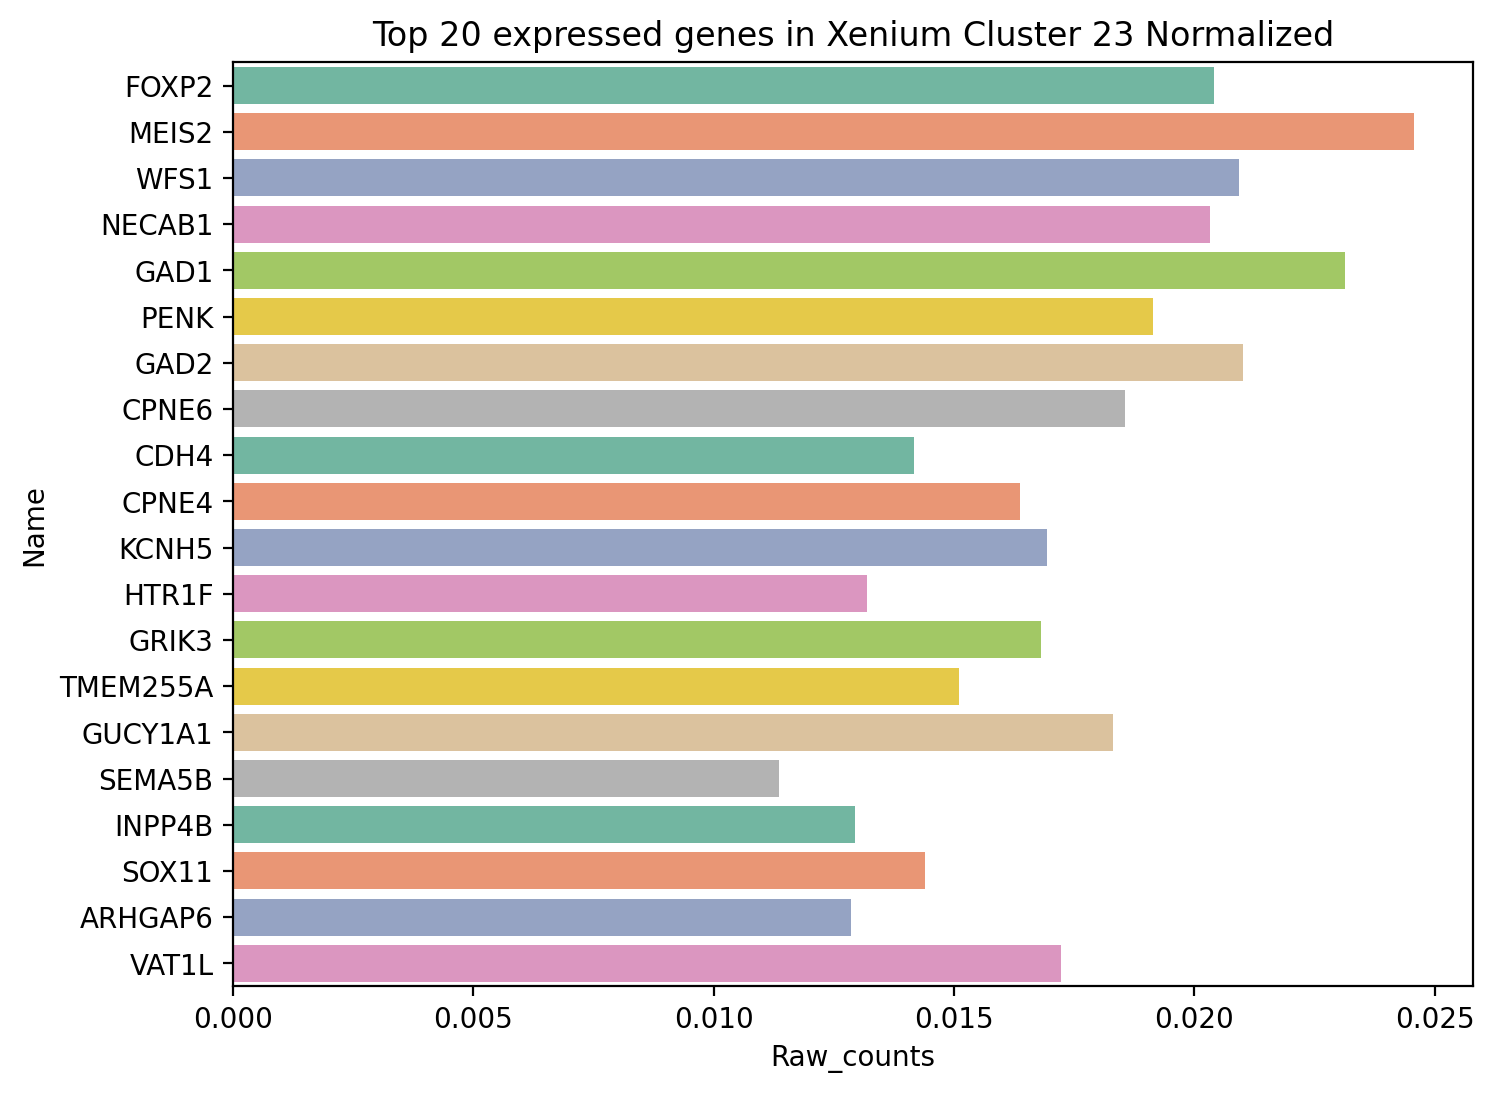

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


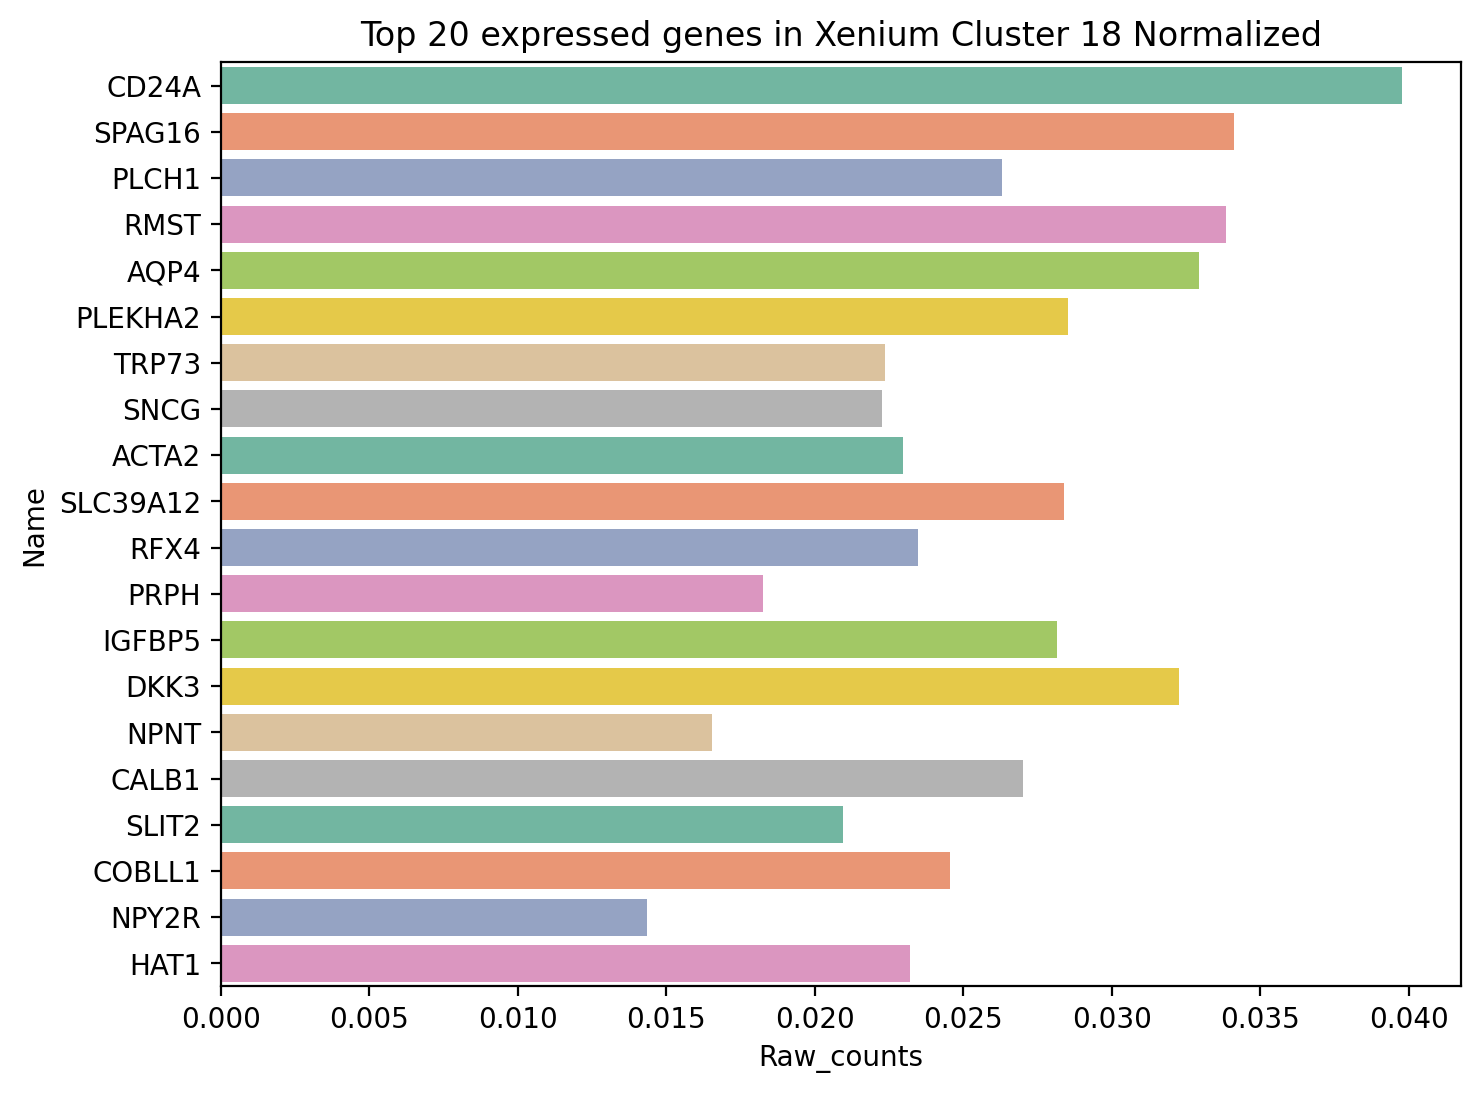

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


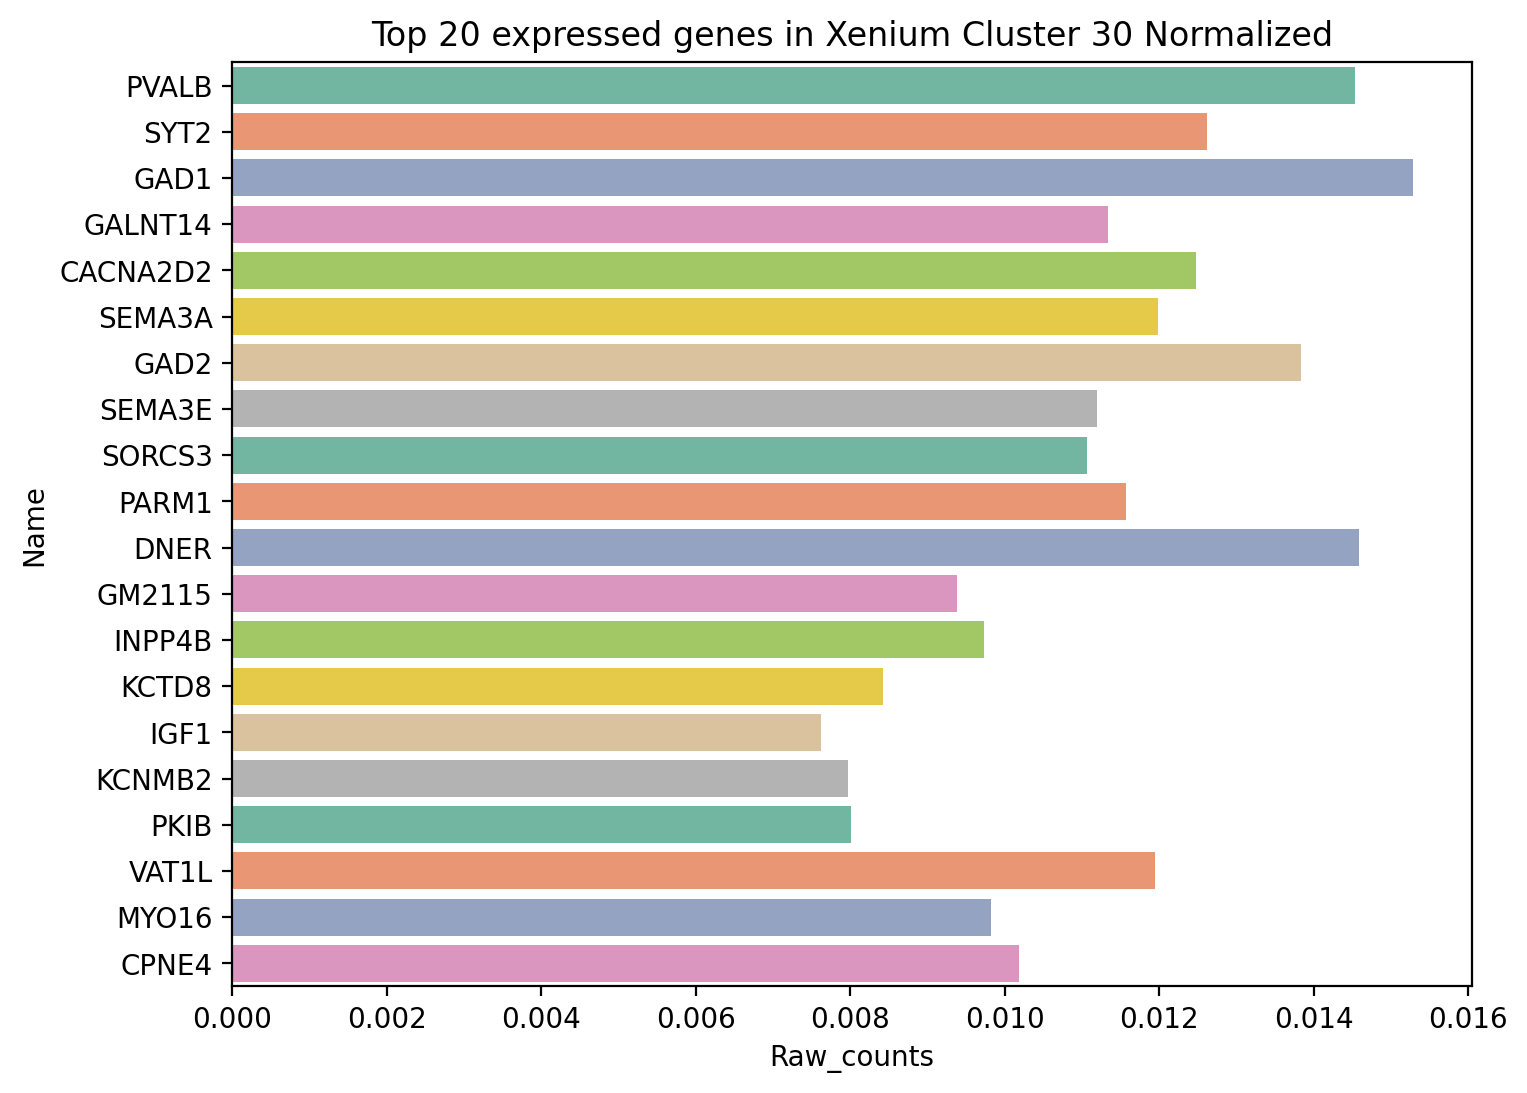

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


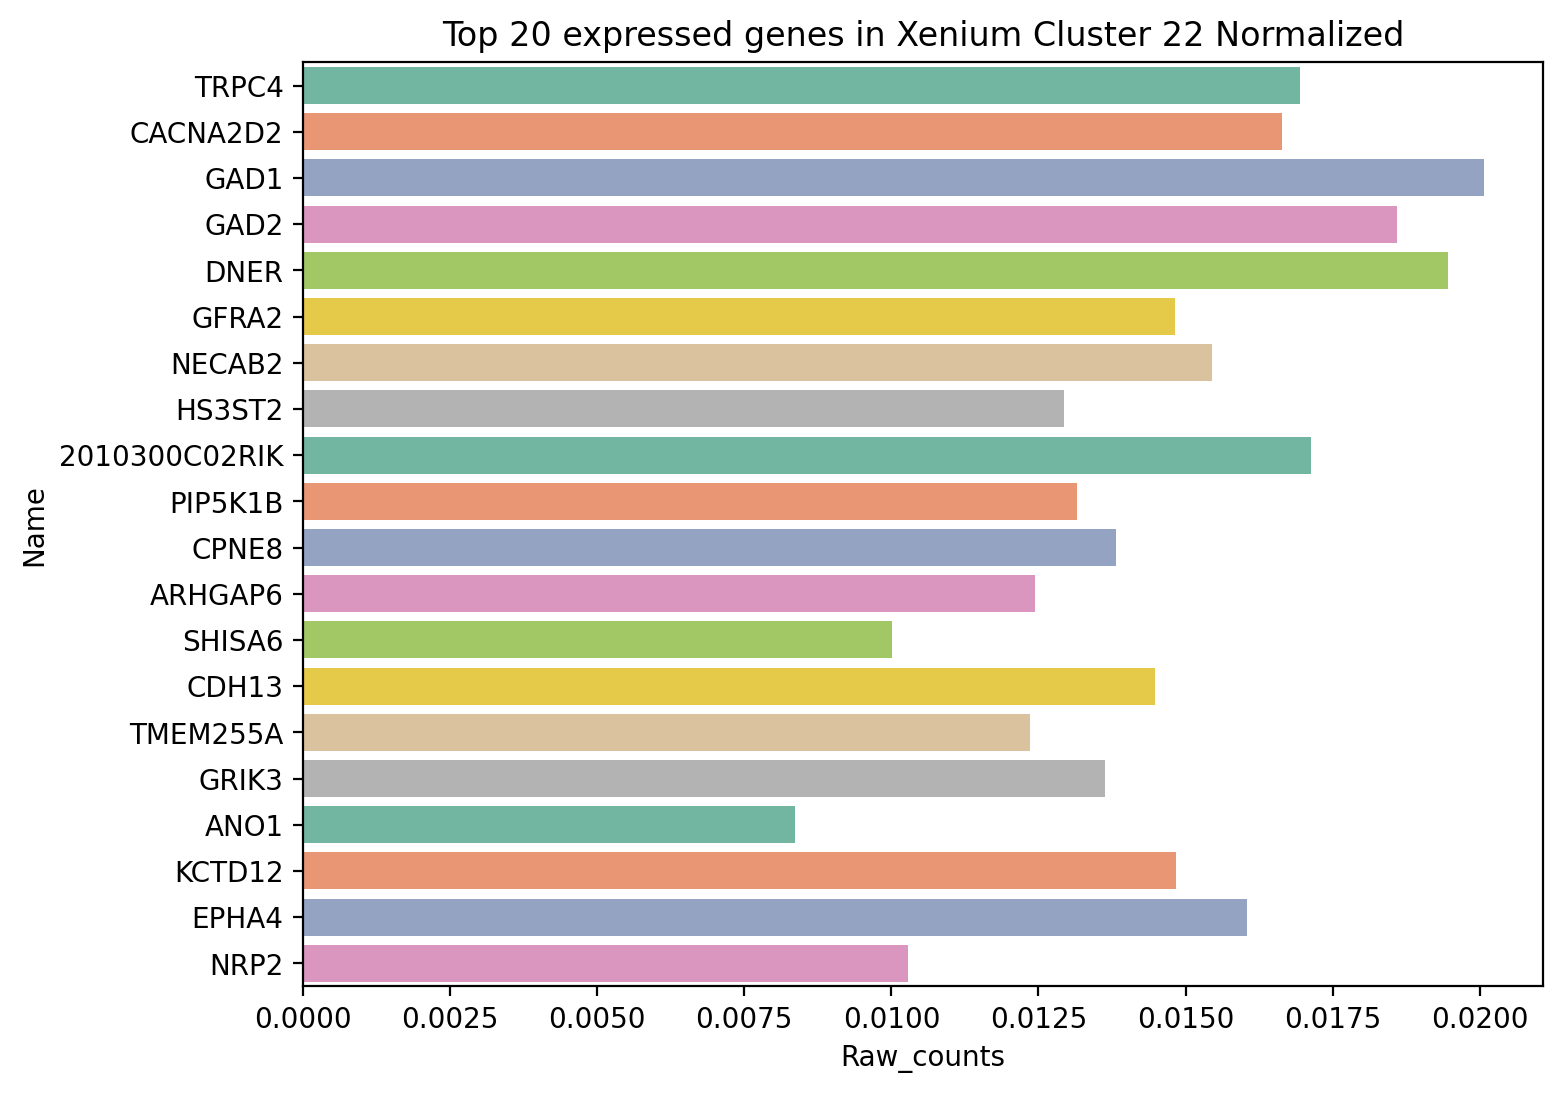

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


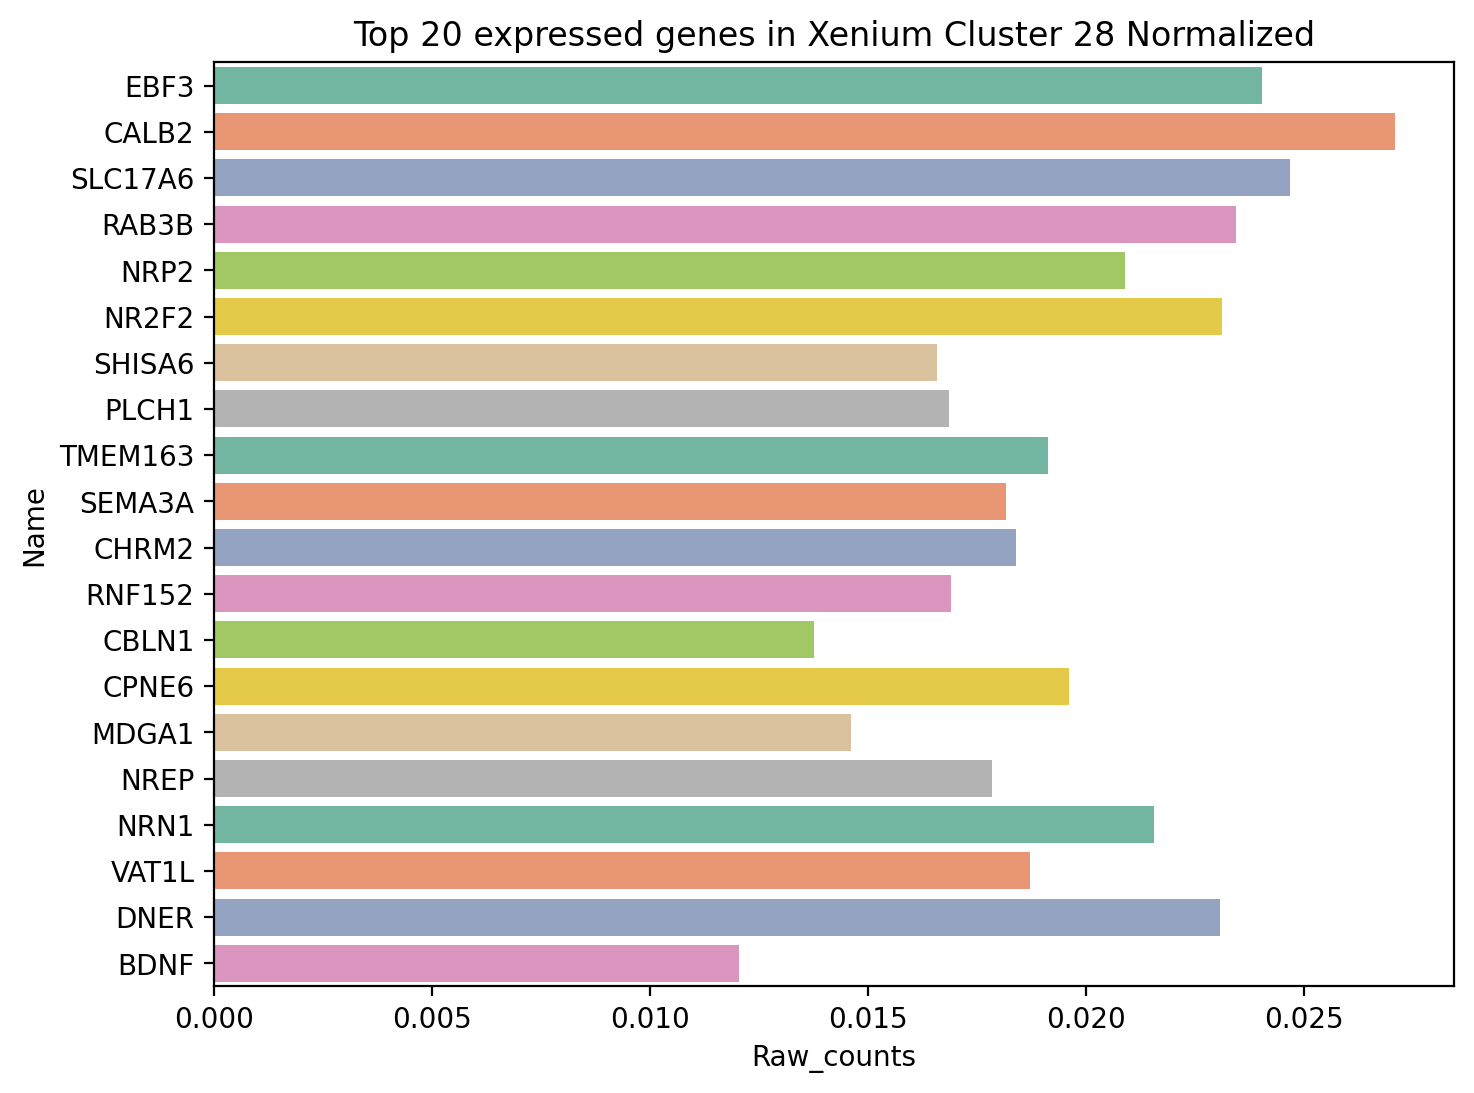

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


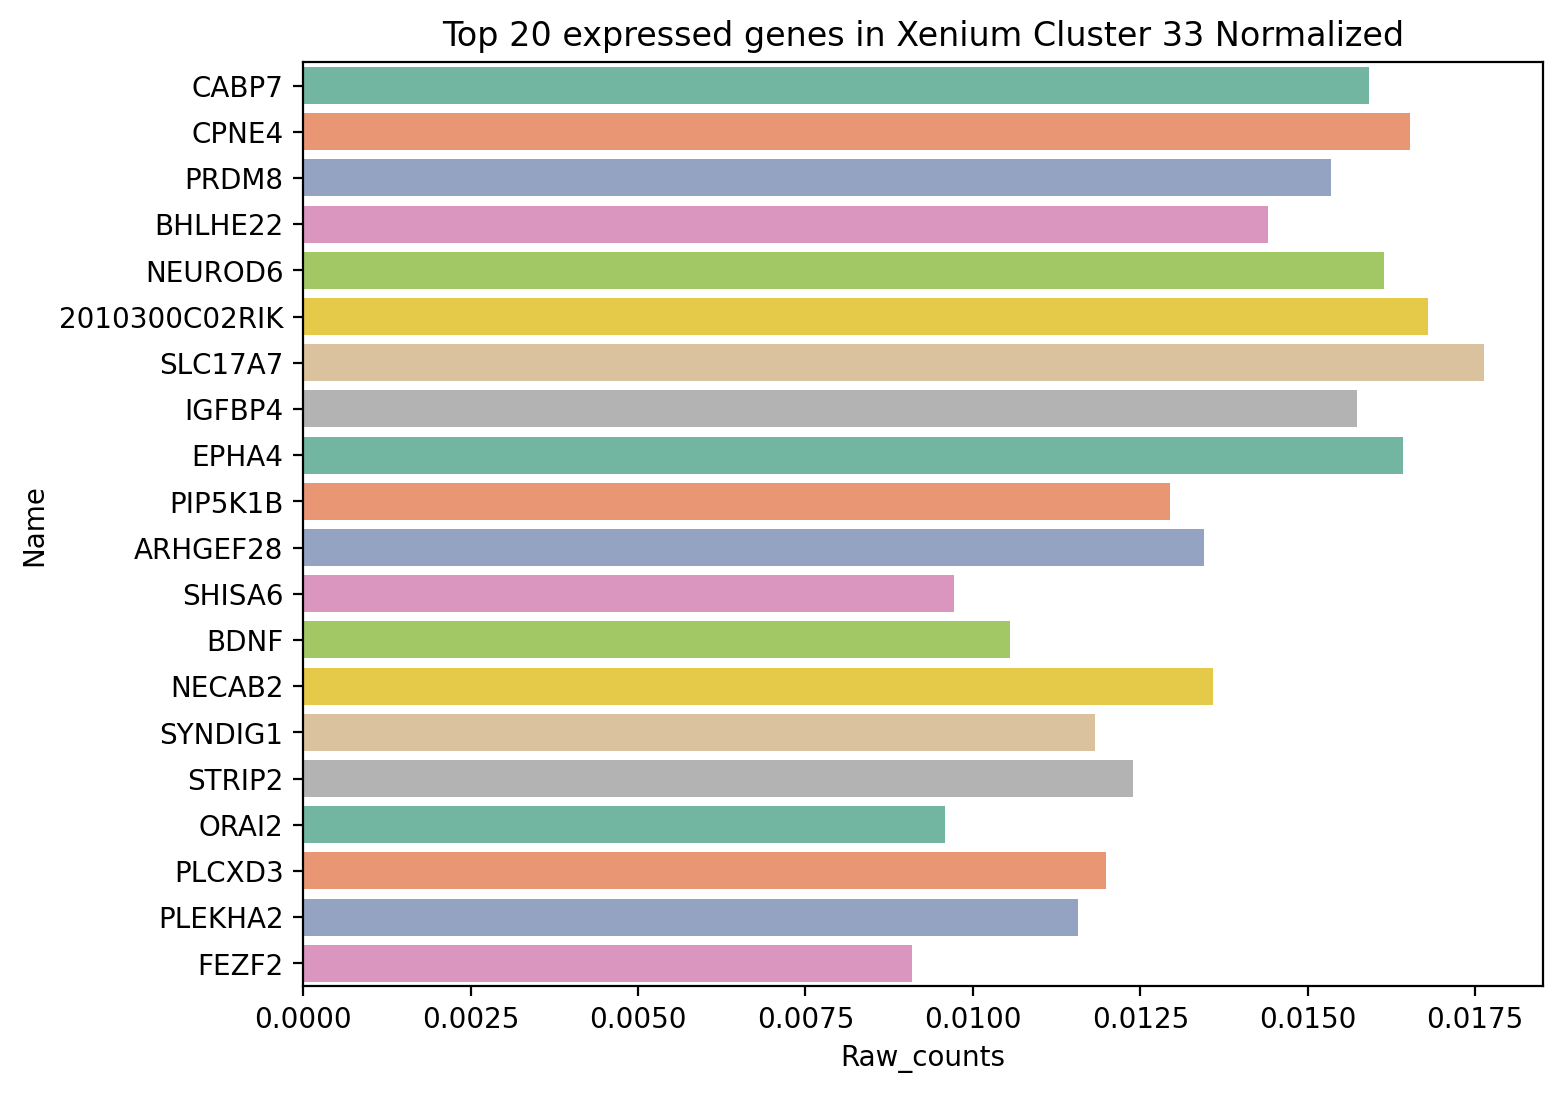

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


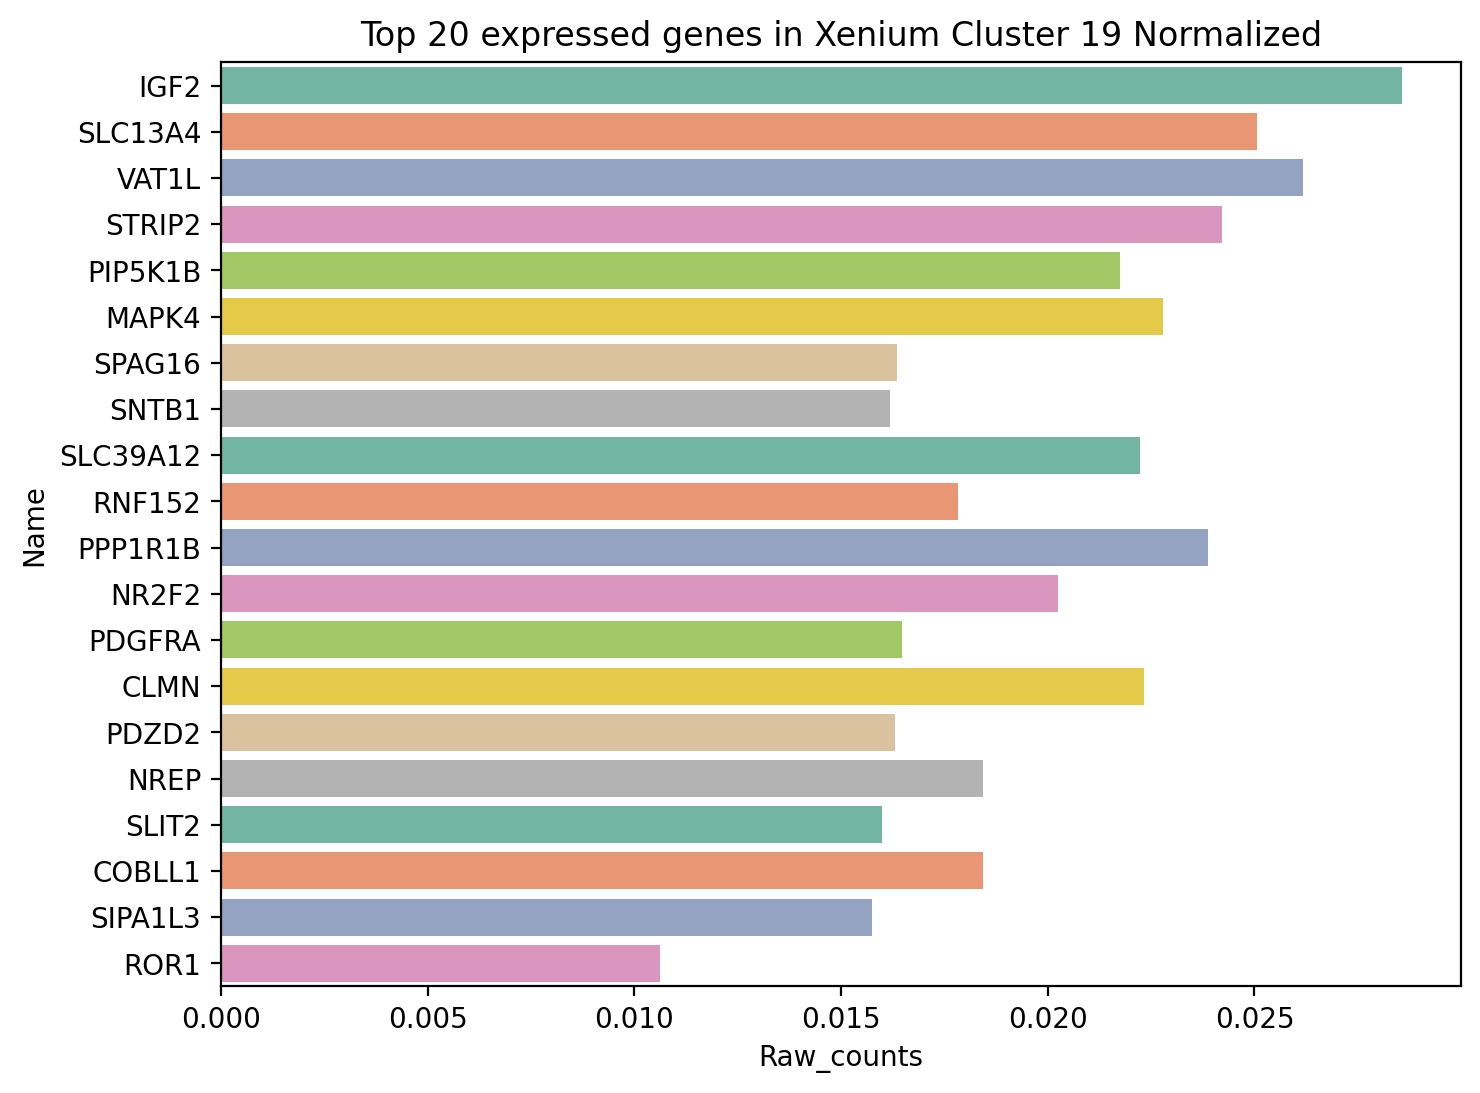

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


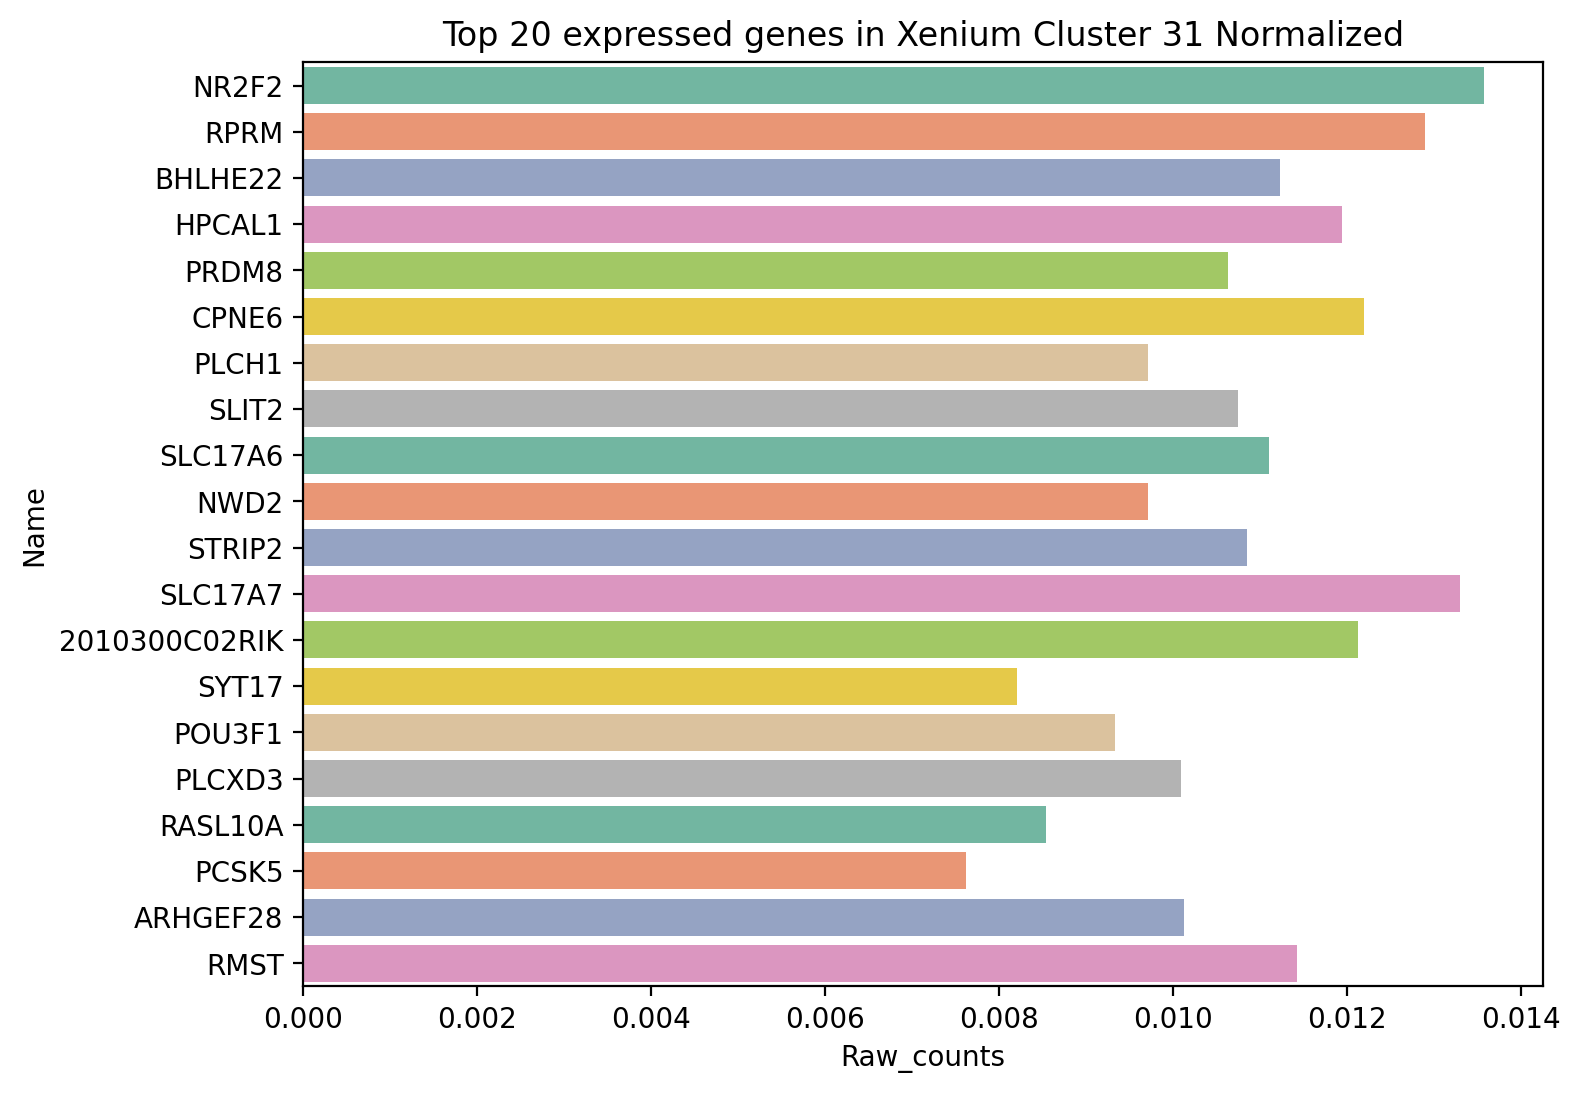

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


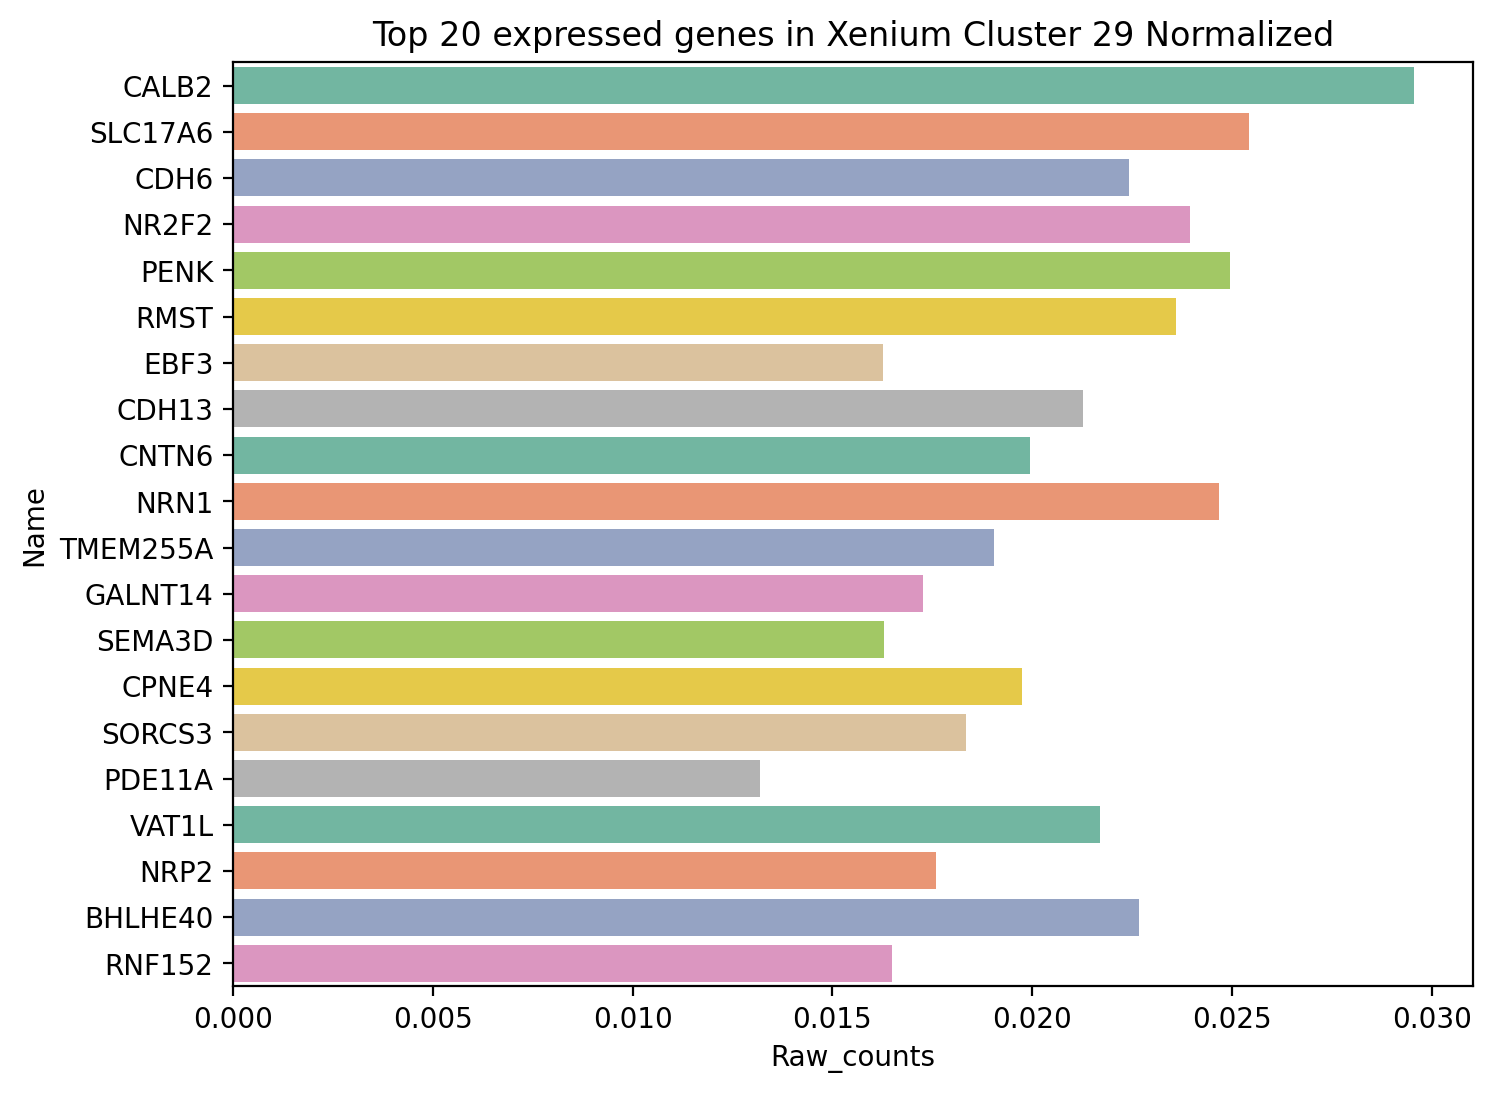

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


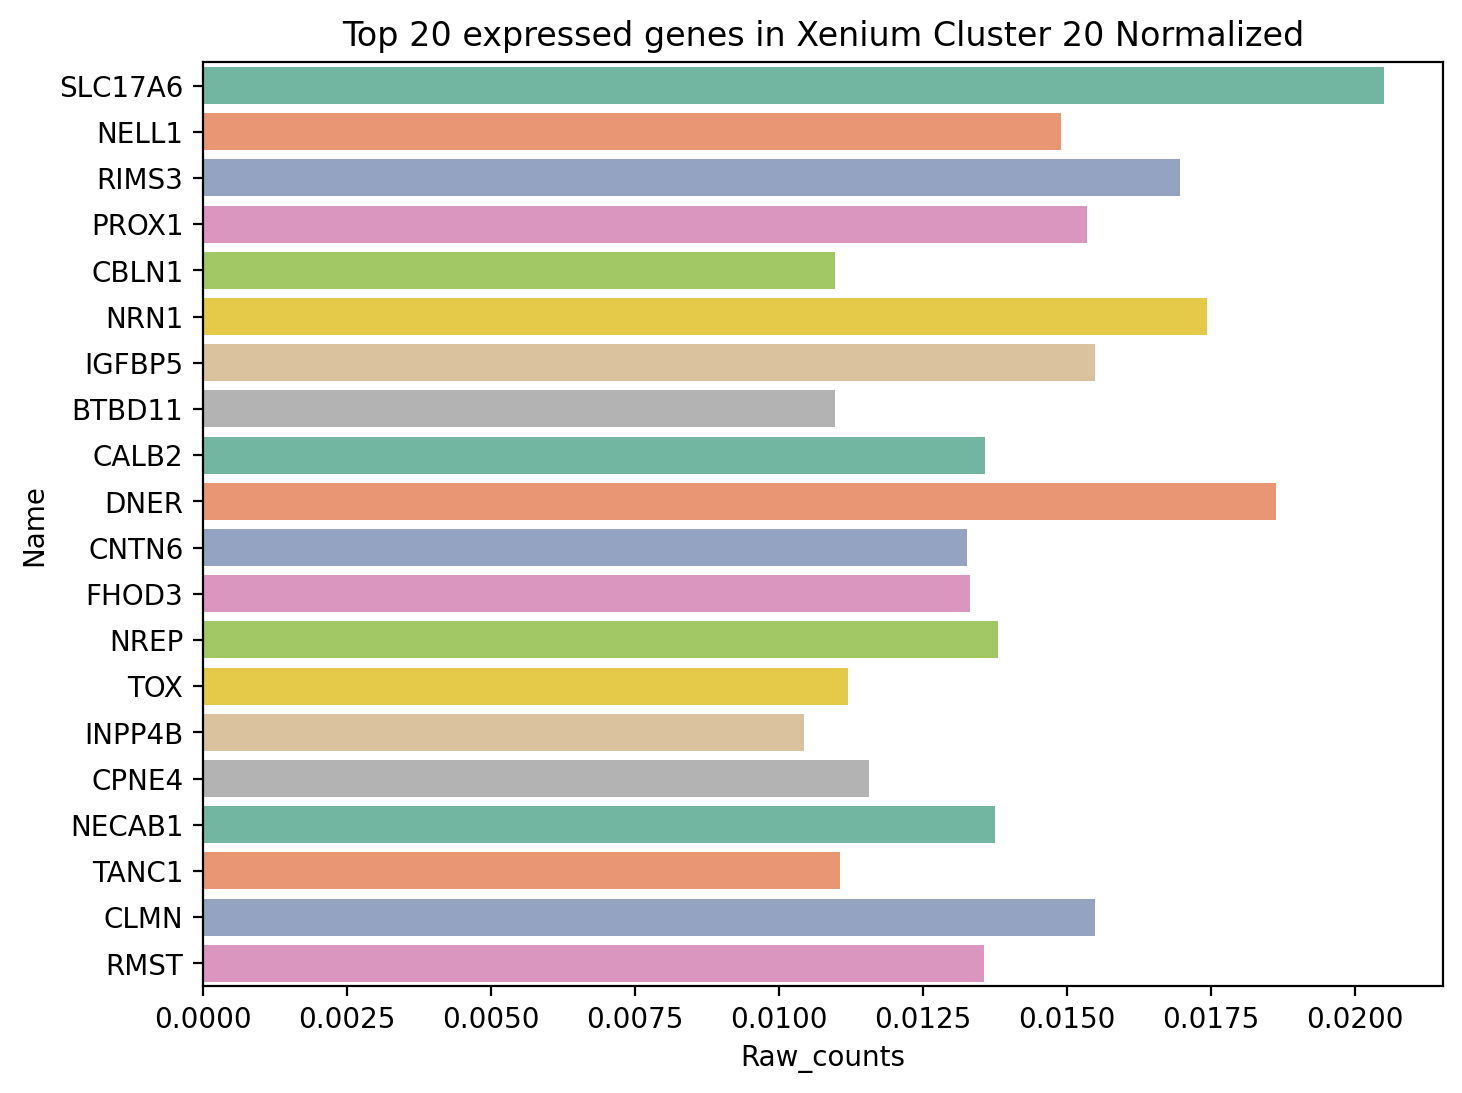

C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
C:\Users\krist\AppData\Local\Temp\ipykernel_34932\2326294315.py:8: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)


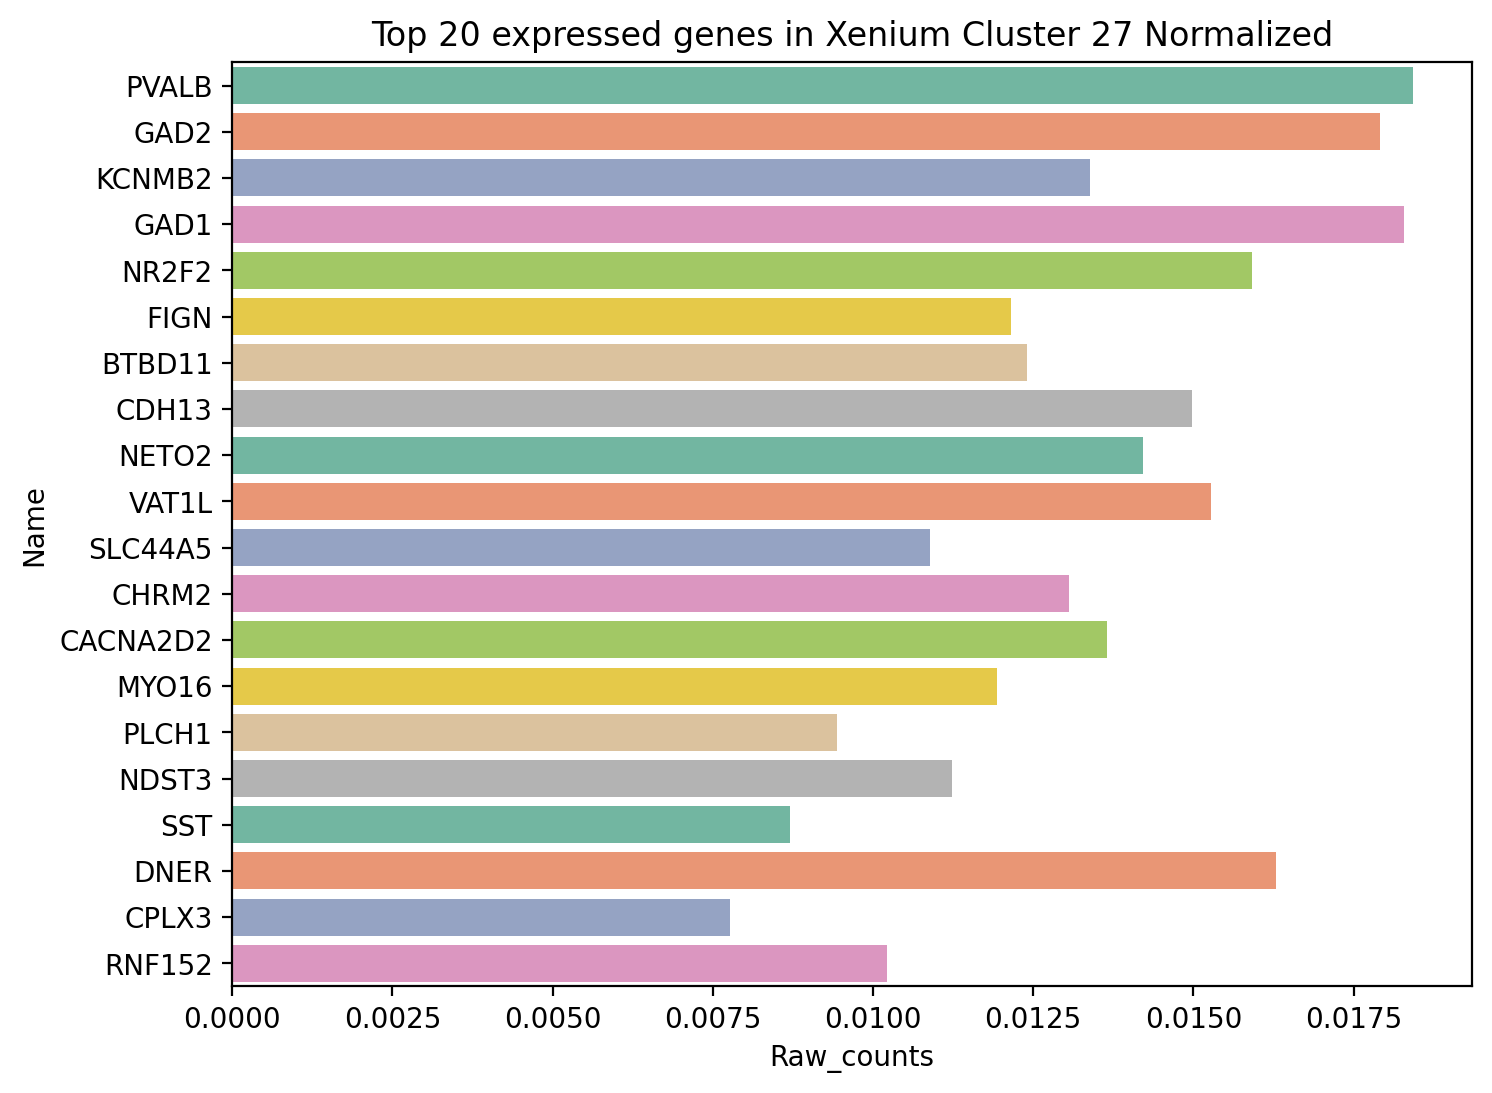

In [19]:
for cluster, i in zip(xenium_leiden_array, range(len(raw_gene_array_normalized))):
    x_label = raw_gene_array_normalized[i]
    y_label = xenium_scdata.uns['rank_genes_groups']['names'][cluster][:20]
    graph_df = pd.DataFrame().assign(Name = y_label).assign(Raw_counts = x_label)
    graph_df
    plt.style.use('default')
    plt.figure(figsize = (8, 6))
    sns.barplot(graph_df, x = 'Raw_counts', y = 'Name', orient = 'y', palette = color_palette)
    plt.title(f'Top 20 expressed genes in Xenium Cluster {cluster} Normalized')
    #plt.savefig(f'Xenium Cluster {cluster} top 20 gene expression bar chart normalized')
    plt.show()